<a href="https://colab.research.google.com/github/KJohnmar/ChebyshevExpasion/blob/main/ChebyshevPolynomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$\def\bra#1{\mathinner{\langle{#1}|}}
\def\ket#1{\mathinner{|{#1}\rangle}}
\def\braket#1#2{\mathinner{\langle{#1}|{#2}\rangle}}$

## __Environment Setup For Computational Physics and Data Visualization__



rfvare

In [ ]:
%%capture --no-display
!apt-get update

In [ ]:
%%capture --no-display
!pip install -i https://test.pypi.org/simple/ pybinding

In [ ]:
%%capture --no-display
!apt-get install texlive texlive-latex-extra texlive-fonts-recommended dvipng cm-super

In [ ]:
# ==============================================================================
# 1. Environment Control & Warning Management
import warnings
warnings.filterwarnings("ignore")
# ==============================================================================
# 2. System & OS Utilities
import os
import os.path
import logging
import re
import itertools
# ==============================================================================
# 3. Numerical Computing & Data Manipulation (The "SciPy Stack")
import numpy as np
import pandas as pd
import math
# ==============================================================================
# 4. Computational Physics & Scientific Calculations
import pybinding as pb
from scipy.interpolate import griddata
import scipy.integrate as itg
from scipy.sparse import eye
from scipy.sparse.linalg import eigsh
# ==============================================================================
# 5. Data Visualization & Styling
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.gridspec as gridspec
import matplotlib.colors as colors
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from matplotlib import rc
import matplotlib.patheffects as path_effects
from matplotlib.collections import LineCollection
# ==============================================================================
# 6. Advanced Plotting Components
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.offsetbox import (
    AnchoredOffsetbox, AuxTransformBox, DrawingArea, TextArea, VPacker)
from matplotlib import transforms
# ==============================================================================
import IPython

In [ ]:
# Configure LaTeX to use Times New Roman.
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Times New Roman"],
    "mathtext.fontset": "custom",
    "mathtext.rm": "Times New Roman",
    "mathtext.it": "Times New Roman:italic",
    "mathtext.bf": "Times New Roman:bold",
    "text.latex.preamble": r"""
        \usepackage{amsmath}
        \usepackage{xfrac}
    """
})

## **Project Goals: _Real-Space Study of Operator Spectral Density_**

<font color="blue"><b>PART I</b></font>

<font color="red"><b>

1. [_] From Lattice Geometry to Electronic Properties
</b></font>

    - <font color="orange"><b>[x] Real-Space and Reciprocal-Space</font>
    - <font color="orange">[x] Band Structure ($E$ vs $k$)</font>
    - <font color="orange">[x] Density of States</font>
    - <font color="orange">[_] Orbital Magnetization</font>
    - <font color="orange">[_] Dimensionality Effects</font></b>

<font color="red"><b>

2. [_] Chebyshev polynomial method
</b></font>

    - <font color="orange"><b>[x] Cores Principles</font>
    - <font color="orange">[x] Calculating Moments in Quantum Systems</font>
    - <font color="orange">[x] Kernel Regularization</font>
    - <font color="orange">[x] Spectral Operator Calculation Setup</font>
    - <font color="orange">[_] Quantum Toolbox: Chebyshev Expansion for Hamiltonian Systems</font></b>

<font color="blue"><b>PART II</b></font>

<font color="red"><b>

1. [_] Chain of atoms
</b></font>
    - <font color="orange"><b>[x] Analytical Approach</b></font>
    - <font color="orange"><b>[x] Exact Diagonalization</b></font>
    - <font color="orange"><b>[_] Chebyshev Expansion</b></font>

<font color="red"><b>

2. [_] Square lattice
</b></font>
    - <font color="orange"><b>[x] Analytical Approach</b></font>
    - <font color="orange"><b>[x] Exact Diagonalization</b></font>
    - <font color="orange"><b>[_] Chebyshev Expansion</b></font>

<font color="red"><b>

3. [_] Graphene (honeycomb lattice)
</b></font>
    - <font color="orange"><b>[x] Analytical Approach</b></font>
    - <font color="orange"><b>[x] Exact Diagonalization</b></font>
    - <font color="orange"><b>[_] Chebyshev Expansion</b></font>

<font color="red"><b>

4. [_] SSH model
</b></font>
    - <font color="orange"><b>[x] Analytical Approach</b></font>
    - <font color="orange"><b>[x] Exact Diagonalization</b></font>
    - <font color="orange"><b>[_] Chebyshev Expansion</b></font>

<font color="red"><b>

5. [_] Triangulene crystals of graphene
</b></font>
    - <font color="orange"><b>[_] Analytical Approach</b></font>
    - <font color="orange"><b>[_] Exact Diagonalization</b></font>
    - <font color="orange"><b>[_] Chebyshev Expansion</b></font>


<h1 align="center"></h1>

___
# <center>**Real-space study via Chebyshev polynomial method**</center>
___

<h1 align="center"></h1>

___
## <center><font color="blue">**PART I**</font></center>
___


<h1 align="center"></h1>


### <center><font color="red">**1. From Lattice Geometry to Electronic Properties**</font></center>
___



This section explores the fundamental geometric and mathematical properties of crystal lattices across different dimensions. By leveraging the Chebyshev Polynomial Method, we transition from the structural definition of a material in Real-Space to the calculation of complex electronic and magnetic phenomena.

The study is organized around five pillars:
- Real-Space and Reciprocal-Space
- Band Structure ($E$ vs $k$)
- Density of States (DOS)
- Orbital Magnetization
- Dimensionality Effects

<h1 align="center"></h1>


#### <center><font color="orange">**Real-Space and Reciprocal-Space**</center>
___


**REAL-SPACE**

Real-space describes the physical positions of atoms in a crystal.

-  <u>**Interatomic Distance:**</u>

    The distance between atoms is determined by the equilibrium between Attraction (electrostatic forces/bonding) and Repulsion (Coulomb repulsion and Pauli exclusion).

    __*Calculation:*__ For two sites at ${\rm r}_1$ and ${\rm r}_2$:
    $$d = \|{\rm r}_2 - {\rm r}_1\| = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2 + (z_2 - z_1)^2}$$

    __*Dimensional Behavior:*__

      - **3D (High):** Reference bond lengths, slightly longer due to multi-directional repulsion.
      - **2D (Moderate):** Removal of out-of-plane neighbors redistributes electrons, shortening in-plane bonds (e.g., Graphene).
      - **1D (Low):** Atoms form strong multiple bonds to achieve stability, resulting in minimum distance.
      - **0D (Finite):** Edge effects dominate; structural relaxation causes geometric distortions.


- <u>**Atomic Sites and Primitive Vectors:**</u>

  An atomic site is the coordinate $\rm R$ where an atom sits. These are generated by Primitive Vectors ($a_i$), which act as the "building blocks" of the lattice.
  $${\rm R} = n_1{\rm a}_1 + n_2{\rm a}_2 + n_3{\rm a}_3$$

    - **0D (Clusters):** No infinite repetition. Positions are discrete (${\rm r}_1, {\rm r}_2, \dots$). Edge atoms differ physically from interior atoms.
    - **1D (Chains):** One vector (${\rm a}_1 = a\hat{x}$). Each site has two neighbors. Highly susceptible to Peierls instability (pairing up).
    - **2D (Layers):** Two vectors (${\rm a}_1, {\rm a}_2$). Graphene is unique for its two-atom basis (Sublattices A and B).
    - **3D (Bulk):** Three independent vectors (${\rm a}_1, {\rm a}_2, {\rm a}_3$). The symmetry ensures macroscopic properties are uniform throughout the volume.

- <u>**Primitive Unit Cells:**</u>

  The smallest volume (or area/length) that contains exactly one lattice point.
  - Wigner-Seitz Cell: A specific type of primitive cell constructed by drawing perpendicular bisectors to nearest neighbors.
  - Volume/Area Calculation:
    - 2D Area: $A = |{\rm a}_1 \times {\rm a}_2|$
    - 3D Volume: $V_p = {\rm a}_1 \cdot ({\rm a}_2 \times {\rm a}_3)$

- <u>**Translational Symmetry:**</u>

  A system has translational symmetry if the Hamiltonian $\hat{H}$ is invariant under displacement by a lattice vector ${\rm R}$: $[\hat{H}, \hat{T}_R] = 0$.
  - **Consequence:** In 1D, 2D, and 3D, this leads to Bloch’s Theorem, allowing us to solve the physics of a single cell rather than an infinite crystal.
  - **In 0D:** Symmetry is broken, creating edge states and discrete energy levels.


**RECIPROCAL-SPACE**

Reciprocal space is not a physical place, but a mathematical landscape representing the periodicity of the crystal. While Real-Space tells us where the atoms are, Reciprocal-Space tells us how the waves move through them.

Reciprocal space is the Fourier Transform of real space. It represents spatial frequencies ($Å^{-1}$) rather than positions ($Å$).

- <u>**The Fundamental Link:**</u>

  The connection between the two spaces is governed by the orthogonality condition:
  $${\rm a}_i \cdot {\rm b}_j = 2\pi\delta_{ij}$$
  This creates an inverse relationship: if you stretch the crystal in Real Space (increasing $a$), the corresponding Reciprocal Space (the Brillouin Zone) shrinks.
- <u>**Dimensional Evolution:**</u>

  The complexity of the reciprocal lattice scales with the dimensions of the system:

  - __*0D (Zero-Dimensional)*__
    - *Structure:* Isolated clusters (e.g., molecules or triangulenes).
    - *Reciprocal Nature:* Since there is no infinite repetition, there is no reciprocal lattice.
    - *Physics:* We observe discrete energy levels rather than continuous bands.
  - __*1D (One-Dimensional)*__
    - *Real Vector:* ${\rm a}_1 = a\hat{x}$
    - *Reciprocal Vector:* ${\rm b}_1 = \frac{2\pi}{a}\hat{x}$
    - *Shape:* A series of points along a line. The region between $-\pi/a$ and $+\pi/a$ defines the 1D Brillouin Zone.
  - __*2D (Two-Dimensional)*__
    - *Real Vectors:* ${\rm a}_1, {\rm a}_2$ (defining a plane).
    - *Reciprocal Vectors:*
    $${\rm b}_1 = 2\pi\frac{{\rm a}_2 \times \hat{z}}{|{\rm a}_1 \times {\rm a}_2|}, \quad {\rm b}_2 = 2\pi\frac{\hat{z} \times {\rm a}_1}{|{\rm a}_1 \times {\rm a}_2|}$$
    - *Example:* For a Graphene hexagonal lattice, the reciprocal lattice is also hexagonal but rotated by $30^∘$.
  - __*3D (Three-Dimensional)*__
    - *Real Vectors:* ${\rm a}_1, {\rm a}_2, {\rm a}_3$ (defining a volume).
    - *Reciprocal Vectors:* Constructed using the triple product to ensure each ${\rm b}_i$ is perpendicular to the plane of the other two ${\rm a}$ vectors.
    $$
    {\rm b}_1 = 2\pi\frac{{\rm a}_2\times {\rm a}_3}{{\rm a}_1 \cdot ({\rm a}_2\times {\rm a}_3)}, \quad
    {\rm b}_2 = 2\pi\frac{{\rm a}_3\times {\rm a}_1}{{\rm a}_1 \cdot ({\rm a}_2\times {\rm a}_3)} \quad {\rm and} \quad
    {\rm b}_3 = 2\pi\frac{{\rm a}_1\times {\rm a}_2}{{\rm a}_1 \cdot ({\rm a}_2\times {\rm a}_3)}
    $$
    - *The First Brillouin Zone:* This is the Wigner-Seitz cell of the reciprocal lattice. It contains all the unique information about the material's electronic properties.


<h1 align="center"></h1>


#### <center><font color="orange">**Band Structure ($E$ vs $k$)**</center>
___



**BAND STRUCTURE**

Band structure describes the range of energies on electron is "allowed" to have whithin a crystal and how that energy relates to its momentum.

-  <u>The Dispersion Relation:</u>
  
  The relationship between Energy $(E)$ and the wavevector ($k$) is determined by the interaction of electron waves with the periodic potential of the lattice.

  ***Calculation:*** Near the bottom of a band, the energy is often approximated using a parabolic fit:

  $$E(k) = E_0 + \frac{ℏ^{2}k{2}}{2m^*}$$

  Where $m^*$ is the **Effective Mass**, determined by the curvature of the band:

  $$\frac{1}{m^*} = \frac{1}{ℏ^2}\frac{d^2E}{dk^2}$$

- ***Dimensional Behavior:***
    
    - **3D (Bulk):** Energy varies in all directions of the Brillouin Zone; bands are continuous surfaces.
    - **2D (Quantum Well):** Confinement in one direction creates discrete "sub-bands." In Graphene, the relation is linear: $E(k) = \pm \hbar v_f |k|$.
    - **1D (Quantum Wire):** Electrons move along one axis. Dispersion is parabolic, but the density of states shows "Van Hove" singularities at band edges.
    - **0D (Quantum Dot):** Translational symmetry is lost; $k$ is no longer a valid quantum number. Bands collapse into discrete atomic-like energy levels.

-  <u>**Electronic Classification:**</u>    
  
  The relative positions of the energy bands and the Fermi level ($E_f$) determine the material's electrical nature.

  -  **Metals:** The Fermi level crosses a band, or the Valence and Conduction bands overlap ($E_g = 0$). Electrons move with a minimal energy cost.
  -  **Semiconductors:** A small energy gap ($E_g < 3 eV$). Electrons are strongly bound to the Valence band, and the material does not conduct under normal conditions.

-  <u>**Direct vs. Indirect Gaps:**</u>

  The alignment of the band extrema in $k$-space dictates how the material interacts with light.

  -  **Direct Gap:** The maximum of the Valence band and the minimum of the Conduction band occur at the same $k$ (usually $𝚪 = 0$). Efficient for photon emission (e.g. GaAs).
  -  **Indirect Gap:** Extrema occur at different $k$ values. Transitions require a phonon (lattice vibration) to conserve momentum, making them inefficient for light emission (e.g. Silicon).

-  <u>**Bloch's Theorem:**</u>

  In a periodic potencial, the electronic wavefunction $\psi$ is not a simple plane wave, bit a **Bloch Wave:**

$$\psi_{nk}(r) = e^{ikr}𝑢_{nk}(r)$$

  -  **The Periodic Part:** $𝑢_{nk}(r)$ has the same periodicity as the lattice: $𝑢(r) = 𝑢(r + R)$.
  -  **Consequence:** This allows us to reduce the infinite crystal problem to a single unit cell. All unique energy values are contained whithin the **First Brillouin Zone.**



<h1 align="center"></h1>


#### <center><font color="orange">**Density of States (DOS)**</center>
___




The Density of Stated $(g(E))$ describes the number of quantum states available to be occupied by electrons at each energy level. While the Band Structure tells us **where** the states are in terms of momentum $(k)$, the DOS tells us **how many** states exist at a specific energy $(E)$.

-  <u>**Mathematical Definition:**</u>

  The DOS is defined as the number of states $(dN)$ in an energy intervsl $(dE)$ per unit of volume (or area/length):

  $$g(E) = \frac{1}{V}\frac{dN}{dE}$$

  **General Calculation:** For a system with a dispersion relation $E(k)$, the DOS is claculated by integrating over the constant-energy surface in reciprocal space.

  $$g(E) = \sum_{n}\int \frac{dk}{4\pi^3}δ(E - E_n(k))$$

- <u>**Dimensional Behavior:**</u>

  The shape of the DOS graph changes drastically with the system's dimensionality, which defines how the material respondes to heat and electricity.

  - **3D (Bulk):** The DOS grows parabolically with energy.
  $g(E)$ is proportional to the square root of $(E - E0)$.
  - **2D (Quantum Well):** The DOS is constant for each sub-band, creating a staircase-shaped graph.
  $g(E)$ = $C$ (constant).
  - **1D (Quantum Wire):** The DOS is inversely proportional to the square root of energy, showing infinite peaks at the band edges.
  $g(E)$ is proportional to $\frac{1}{\sqrt{E - E_0}}$.
  - **0D (Quantum Dot):** The DOS is a series of $\delta$ functions (isolated peaks) because the energy levels are discrete.
  $g(E)$ is proportional to $\delta(E - Ei)$.

- <u>**Van Hoven Singularities:**</u>

  These occur in 1D, 2D and 3D systems at paints where the energy band is "flat" in $k$-space (meaning the grup velocity is zero)

  - **Impact.** At these point, DOS diverges or shows abrupt breaks, drastically increasing the probability of light-matter interactions and transport phenomena.

- <u>**Occupation and Fermi Level:**</u>

  Having an available state (DOS) does not mean it is occupied. The actual occupancy is determined by the **Fermi-Dirac Distribution** $(f(E))$:

  $$n(E) = g(E) f(E)$$

  - **In Metals:** The DOS is high at the Fermi Level (Ef), allowing for high conductivity.

  - **In Semiconductors:** The DOS is zero within the bandgap, meaning there are no states available for electrons between the valence and conduction bands.

- <u>**Experimental Importance:**</u>

  The DOS can be measured directly through techniques such as **Scanning Tunneling Spectroscopy (STS)** or **Photoemission Spectroscopy (PES)**, allowing us to "see" the electronic structure of the materials in practice.

<h1 align="center"></h1>


#### <center><font color="orange">**Orbital Magnetization**</center>
___


**Orbital Magnetization**

**Orbilat magnetization** describes the magnetic moment arising from the orbital motion of electrons in a solid. Unlike spin magnetization, which is intrinsic to the electron, orbital magnetization emerges from the **collective quantum motion of electrons in energy bands**.

In crystalline solids, electrons do not follow classical closed orbits. Therefore, orbital magnetization must be formulated using Bloch states and is fundamentally a **bulk property of the electronic band structure**.

**Physical Origin**

Classically, the orbital magnetic moment associated with a current distribution is:

$$m = \frac{1}{2}\int r \times j(r) d^3 r$$

where $j(r)$ is the electronic current density.

In an infinite crystal, the position operator $r$ is ill-defined. As a result, orbital magnetization cannot be computed directly in real space and requires a **reciprocal-space formulation**.

**Modern Theory of Orbital Magnetization**

The orbital magnetization per unit volume is given by:

$$M = \frac{e}{2\hslash}\sum_{n} \int_{BZ} \frac{d^3k}{(2\pi)^3} f_{nk} Im \langle ∇_ku_{nk}| \times (H_k + E_{nk} - 2\mu)|∇_ku_{nk} \rangle $$

where:

-  $u_{nk}$ is the periodic part of the Bloch wavefunction
-  $f_{nk}$ is the Fermi–Dirac distribution
-  $\mu$ is the chemical potential
-  The integral is over the **first Brillouin zone**

This expression shows that orbital magnetization is a **geometric property of the electronic bands**.

**Fundamental Contributions**

Orbital magnetization can be decomposed into two main contributions:

**1. Local Orbial Magnetic Moment**

Each Bloch wavepacket carries an intrinsic orbital magnetic moment:

$$m_n(k) = -\frac{e}{2\hslash}Im \langle ∇_ku_{nk}| \times (H_k - E_{nk})|∇_ku_{nk} \rangle $$

This term describes **microscopic circulating currents** within the unit cell.

**2. Berry-Phase (Geometric) Contribution**

The **Berry curvature** in reciprocal space acts as an effective magnetic field:

$$\Omega_n(k) = i\langle ∇_ku_{nk}| \times|∇_ku_{nk} \rangle $$

This contribution directly links orbital magnetization to topological properties of the band structure, such as:

-  Anomalous Hall effect
-  Chern insulators
-  Topological materials

**Relation to Reciprocal Space**

Orbital magnetization:

-  Is **not determined by atomic positions in real space**
-  Depends on:
    - Band dispersion
    - Berry curvature
    - Electronic occupation

In analogy:

-  **Band structure** $\rightarrow$ where the states are in momentum space
-  **Density of states** $\rightarrow$ how many states exist at a given energy
-  **Orbital magnetization** $\rightarrow$ how electronic states circulate in reciprocal space

**Dimensional Dependence**

The magnitude and nature of orbital magnetization strongly depend on dimensionality:

**3D (Bulk)**

-  Usually small due to symmetry-induced cancellations
-  Relevant in ferromagnets and topological semimetals

**2D (Layered Systems)**

-  Strongly enhanced orbital effects
-  Large Berry curvature contributions
-  Examples: gapped graphene, transition metal dichalcogenides

**1D (Chains)**

-  Orbital magnetization is largely suppressed
-  Limited circulating currents

**0D (Clusters / Quantum Dots)**

-  Well-defined orbital magnetic moments
-  Strong dependence on geometry and edge states

**Symmetry Requirements**

-  Time-reversal symmetry $(\mathcal{T})$ must be broken for a non-zero orbital magnetization
-  Inversion symmetry $(\mathcal{P})$ breaking enhances geometric effects

If both $\mathcal{T}$ and $\mathcal{P}$ are preserved:

$$M_{orb} = 0$$

**Response to External Magnetic Fields**

Orbital magnetization can be defined thermodynamically as:

$$M = -\frac{∂\Omega}{∂B}$$

where $\Omega$ is the grand potential.

This connects orbital magnetization to:

-  Orbital magnetic susceptibility
-  Landeu quantization
-  Persistent currents

**Experimental Relevance**

Orbital magnetization manifests in:

-  Anomalous Hall effect
-  Magnetic circular dichroism
-  Torque magnetometry
-  Scanning tunneling spectroscopy under magnetic fields

It plays a crucial role in understanding:

-  Topological matter
-  Spin-independent magnetism
-  Dissipationless electronic transport

<h1 align="center"></h1>


#### <center><font color="orange">**Dimensionality Effects**</center>
___



<h1 align="center"></h1>


### <center><font color="red">**2. Chebyshev polynomial method**</font></center>
___

The Chebyshev polynomial method is a powerful numerical technique used to study the spectral properties of large-scale quantum systems without the need for full diagonalization. By expanding the Density of States (DOS) or other operators into a series of Chebyshev polynomials, Chebyshev polynomial method allows us to calculate physical observables with a computational cost that scales linearly with the system size.

This section explores the mathematical foundations of the method, the iterative calculation of moments, and the use of kernel regularization to produce smooth, physically accurate results.

The study of this section is organized as follows:
- Core Principles
- Calculating Moments in Quantum Systems
- Kernel Regularization
- Spectral Operator Calculation Setup
- Quantum Toolbox: Chebyshev Expansion for Hamiltonian Systems


<h1 align="center"></h1>


#### <center><font color="orange">**Core Principles**</center>
___


The Chebyshev Polynomial Method is an efficient technique to approximate functions and spectral quantities (like the Density of States) on a finite interval using orthogonal polynomials **[1, 2]**.

- <u>__Orthogonal Expansion:__</u>

  For a function $f(x)$ on the interval $[-1, 1]$, we use Chebyshev polynomials of the first kind **[3, 7]**, $T_n(x)$, defined as:
  $$T_n(x) = \cos(n \arccos{x})$$
  These polynomials follow a highly efficient recursion relation:
  - $T_0(x) = 1$
  - $T_1(x) = x$
  - $T_{n+1}(x) = 2x T_n(x) - T_{n-1}(x)$
  
- <u>__Function Reconstruction:__</u>

  In spectral problems, we often expand a function (such as the spectral density) using modified moments $\mu_n$ **[1]**:
  $$f(x) = \frac{1}{\pi \sqrt{1-x^2}} \left[ \mu_0 + 2 \sum_{n=1}^{\infty} \mu_n T_n(x) \right]$$
  Where the moments are defined as
  $$\mu_n = \int_{-1}^{1} f(x) T_n(x) dx$$
  This form is ideal for numerical implementations because it avoids explicit integration over the Chebyshev weight.

##### __Approximating Functions with Chebyshev Polynomials: Practical Examples__

We compare an analytical function $f(x)$ with its Chebyshev approximations truncated at certain number of moments.

In [ ]:
# Lorentzian function
def lorentzian(x): return (1/np.pi) * (0.05 / ((x - 0.0)**2 + 0.05**2))
# Gaussian function
def gaussian(x): return (1/(0.1 * np.sqrt(2*np.pi))) * np.exp(-0.5 * ((x + 0.0)/0.1)**2)
# Step function
def step_function(x): return np.where(x > 0.0, 1.0, 0.0)
# Randomly generated analytic function
def random_mix(x):
    part1 = 0.4 * np.exp(-(x + 0.55)**2 / 0.005) * np.cos(40 * x)
    part2 = 0.3 * np.exp(-(x - 0.45)**2 / 0.01) * np.sin(35 * x)
    return part1 + part2

Calculate the Chebyshev moments

In [ ]:
# Use the specific import to fix your error
from scipy.integrate import quad, trapezoid, simpson
# --- 2. Chebyshev Logic ---
def T_n(x, n): return np.cos(n * np.arccos(x))

def get_moments(func, num_moments, method_int = "quad", points_int = 100):
    mu = []
    for n in range(num_moments):
        in_integrand = lambda x: func(x) *  T_n(x, n)

        if method_int is "quad": integrate, _ = quad(in_integrand, -1, 1, limit=points_int)

        x_pontos = np.linspace(-1, 1, points_int) # 100 pontos entre -1 e 1
        y_pontos = [in_integrand(val) for val in x_pontos] # Calcula a função em cada ponto

        if method_int is "trapezoid": integrate = trapezoid(y_pontos, x_pontos)
        if method_int is "simpson": integrate = simpson(y_pontos, x_pontos)

        mu.append(integrate)

    return np.array(mu)

Function reconstruction

In [ ]:
def reconstruct(x, mu):
    res = mu[0] * np.ones_like(x)
    for n in range(1, len(mu)):
        res += 2 * mu[n] * T_n(x, n)
    return res / (np.pi * np.sqrt(1 - x**2))

In [ ]:
def plot_function(ax, nome_func, moments_list, method_int, points_int):
    x = np.linspace(-0.99, 0.99, 1000)

    if nome_func == "lorentzian":
        func = lorentzian
        ax.set_title('Lorentzian function', fontsize=16)
    elif nome_func == "gaussian":
        func = gaussian
        ax.set_title('Guassian function', fontsize=16)
    elif nome_func == "step_function":
        func = step_function
        ax.set_title('Step function', fontsize=16)
    elif nome_func == "random_mix":
        func = random_mix
        ax.set_title('Randomly generated function', fontsize=16)
    else:
        raise ValueError("Função não reconhecida")

    list_cor= ["tab:green", "tab:blue", "tab:red"]

    for num_moments, cor in zip(moments_list, list_cor):
        mu = get_moments(func, num_moments, method_int, points_int)
        function_chebyshev = reconstruct(x, mu)
        ax.plot(x, function_chebyshev, lw=2, label=f'$M={num_moments}$', color=cor)

    ax.plot(x, func(x), color='black', lw=2, label='Real', linestyle = "--")

    ax.legend(fontsize=16, loc='best', frameon=False, handlelength=1.0)

    ax.tick_params(axis='both', labelsize=15)
    ax.set_xlabel(r"$x$", fontsize=18)
    ax.set_ylabel(r"$f(x)$", fontsize=18)

    return ax

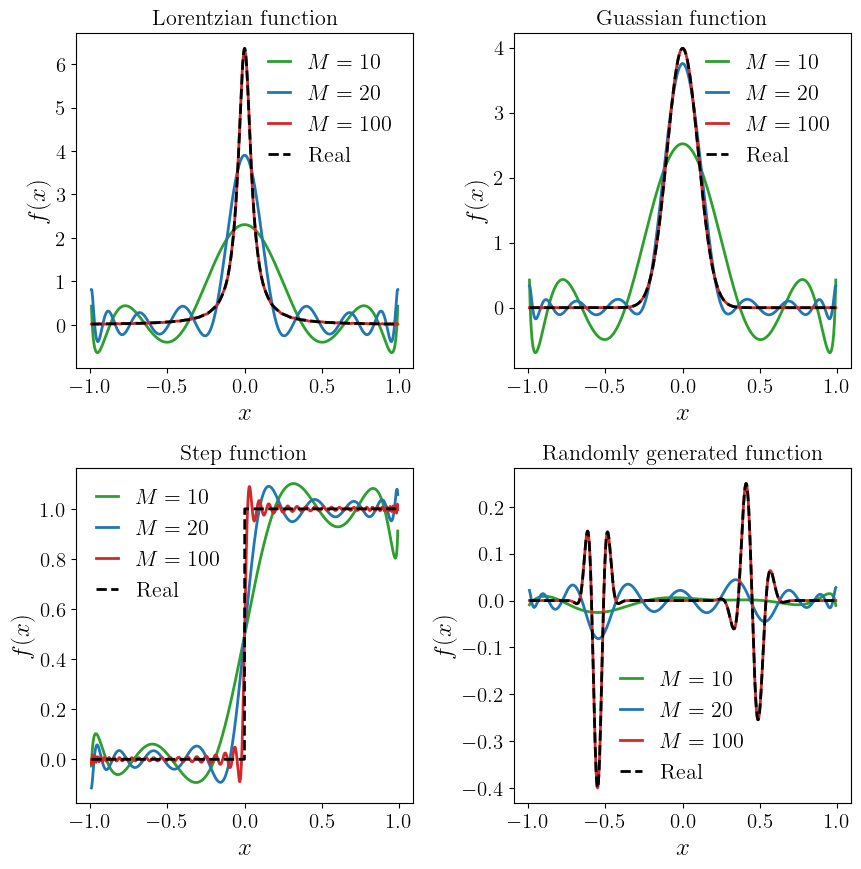

In [ ]:
def main_plot_function_vs_mu():
    # 1. Adjust the figure size to fit both plots side-by-side
    fig = plt.figure(figsize=(10, 10))

    # 2. Create the gridspec
    gs_main = gridspec.GridSpec(2, 2, figure=fig, wspace=0.3, hspace=0.3)

    # 3. Create the subplots
    ax1 = fig.add_subplot(gs_main[0, 0])
    ax2 = fig.add_subplot(gs_main[0, 1])
    ax3 = fig.add_subplot(gs_main[1, 0])
    ax4 = fig.add_subplot(gs_main[1, 1])

    # 4. Call your functions (ensure BrillouinZone ends with ':' as corrected)
    moments_list = [10, 20, 100]
    plot_function(ax1, nome_func = "lorentzian", moments_list=moments_list, method_int = "quad", points_int = 100)
    plot_function(ax2, nome_func = "gaussian", moments_list=moments_list, method_int = "quad", points_int = 100)
    plot_function(ax3, nome_func = "step_function", moments_list=moments_list, method_int = "quad", points_int = 100)
    plot_function(ax4, nome_func = "random_mix", moments_list=moments_list, method_int = "quad", points_int = 100)

    # 5. Finalization
    # tight_layout usually works better than subplots_adjust to prevent label clipping
    plt.tight_layout()
    #plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95,
    #                      hspace=0.4, wspace=0.4)

    plt.show()
    plt.close()

if __name__ == "__main__":
    main_plot_function_vs_mu()

##### __The Versatility of Chebyshev Polynomials in Modern Engineerings__

While the **Kernel Polynomial Method** is a powerful tool for spectral analysis **[1, 2]**, the underlying Chebyshev polynomials are widely used across various engineering fields due to their unique **minimax property**—minimizing the maximum error in an approximation **[3]**.

##### __1. Signal Processing and Filter Design__
Chebyshev filters are engineered to have a **steeper roll-off** than common filters like Butterworth filters **[4]**. This allows for superior separation of frequency bands in:
* **Telecommunications:** Isolating signal channels.
* **Audio Engineering:** Precise equalization and noise removal.

#####  __2. Computational Fluid Dynamics (CFD)__
In aerodynamics and weather prediction, Chebyshev polynomials form the foundation of **spectral methods** used to solve partial differential equations **[5]**.
* **Exponential Convergence:** Using grids based on Chebyshev nodes allows engineers to obtain highly accurate solutions.
* **Efficiency:** Achieves high precision using far less memory than traditional grid-based methods.

#####  __3. Machine Learning and Graph Theory__
In geometric deep learning, **ChebNet** architectures use the recurrence relation to perform convolution-like operations on graphs  **[6]** (social networks, chemical structures):

$$T_n(x) = \cos(n \arccos x)$$

> **Key Benefit:** This allows neural networks to extract local features without the massive computational cost of explicitly computing the graph’s full spectrum **[6]**.



#####  __4. Numerical Precision in Embedded Systems__
In low-power hardware like sensors and microcontrollers, computing complex functions is "expensive." Engineers often replace them with **truncated Chebyshev series** **[7]**:

* **Functions:** $\sin(x), \exp(x), \ln(x)$
* **Optimization:** Because error is distributed evenly across the interval, they ensure numerical accuracy without requiring high-end processing power.

##### **Bibliography**

**[1]** Weiße, A. et al. "The kernel polynomial method." Rev. Mod. Phys., v. 78, n. 1, p. 275–306, 2006.

**[2]** Silver, R. N. et al. "Kernel Polynomial Approximations for Densities of States and Spectral Functions." J. Comput. Phys., v. 124, n. 1, p. 115–130, 1996.

**[3]** Chebyshev, P. L. "Théorie des mécanismes connus sous le nom de parallélogrammes." Mém. Acad. Sci. Pétersb., v. 7, p. 539–568, 1854.

**[4]** Oppenheim, A. V., & Schafer, R. W. Discrete-Time Signal Processing.

**[5]** Trefethen, L. N. (2000). Spectral Methods in MATLAB. SIAM.

**[6]** Defferrard, M., et al. (2016). "Convolutional Neural Networks on Graphs with Fast Localized Spectral Filtering".

**[7]** Gil, A.; Segura, J.; Temme, N. M. Numerical Methods for Special Functions. SIAM, 2007.


<h1 align="center"></h1>


#### <center><font color="orange">**Calculating Moments in Quantum Systems**</center>
___


To apply Chebyshev polynomial method to a Hamiltonian $H$, we must first rescale its spectrum to the interval $[-1, 1]$.

- <u>__Hamiltonian Rescaling:__</u>

  Given the energy bounds $E_{\rm min}$ and $E_{\rm max}$, the rescaled Hamiltonian $\tilde{H}$ is:
  $$\tilde{H} = \frac{H - b}{a}$$
  Where:
  - Scaling factor: $a = (E_{\rm max} - E_{\rm min}) / (2 - \epsilon)$
  - Shift: $b = (E_{\rm max} + E_{\rm min}) / 2$
  - $\epsilon$: A small safety margin to ensure eigenvalues stay within $(-1, 1)$.
  
- <u>__Iterative Computation:__</u>
  
  The moments $\mu_n$ are computed without diagonalizing the matrix. For a state $|\alpha\rangle$, we generate a sequence of vectors $|\alpha_n\rangle = T_n(\tilde{H})|\alpha\rangle$:
  1. $|\alpha_0\rangle = |\alpha\rangle$
  2. $|\alpha_1\rangle = \tilde{H}|\alpha_0\rangle$
  3. $|\alpha_{n+1}\rangle = 2\tilde{H}|\alpha_n\rangle - |\alpha_{n-1}\rangle$

- <u>__For Traces:__</u>

  There are two types of moments that normally appear, the first corresponds to matrix elements  of Chebyshev polynomials (local spectral),
  $$\color{red}{\mu_n = \langle \beta | T_n(\tilde{H}) | \alpha \rangle }$$
  While the second involves traces over the Hilbert space,
  $$\color{red}{\mu_n = \operatorname{Tr}[A T_n(\tilde{H})] }$$
  Where $A$ is a given operator.

  The computational cost of this procedure scales linearly with both the system size $D$ and the expansion order $N$, making it suitable for large sparse Hamiltonians.

  When the moments involve traces, a direct evaluation over all basis would be computationally prohibitive. Instead, the trace can be estimated efficiently using stochastic trace evaluation. In this approach, the trace is approximated by averaging over a small number $R \ll D$ of random vectores $| r \rangle$

  $$\color{red}{{\rm Tr}[A T_n(\tilde{H})] \approx \dfrac{1}{R} \sum_{r=0}^{R-1} \langle r | A T_n(\tilde{H}) | r \rangle }$$

  where $|r\rangle$ are random vectors. The error scales as $1/\sqrt{RD}$, making it extremely efficient for large systems.


<h1 align="center"></h1>


#### <center><font color="orange">**Kernel Regularization**</center>
___


Truncating the expansion at a finite order $N$ causes Gibbs oscillations (wiggles near sharp peaks). To fix this, we multiply the moments by damping factors $g_n$:
$$\mu_n \to g_n \mu_n$$

- __Fejér kernel:__

  - __*Characteristic:*__ Linear damping.
  - __*Best Use Case:*__ Simple smoothing; does not guarantee positivity.
  - __*Formula for $g_n$:*__
     $$g_n^{\rm F} = 1 - \frac{n}{N}$$

- __Jackson kernel:__

  - __*Characteristic:*__ Optimized trigonometric damping.
  - __*Best Use Case:*__ Standard choice. Guarantees positivity and optimal resolution.
  - __*Formula for $g_n$:*__
    $$g_n^{\rm J} = \frac{ (N - n + 1)\cos\!\left(\frac{\pi n}{N+1}\right) + \sin\!\left(\frac{\pi n}{N+1}\right) \cot\!\left(\frac{\pi}{N+1}\right) }{N+1}$$

- __Lorentz kernel:__

  - __*Characteristic:*__ Exponential damping
  - __*Best Use Case:*__ Ideal for calculating Green's functions.
  - __*Formula for $g_n$:*__
    $$ g_n^{\mathrm{L}} = \frac{ \sinh\left[\lambda\left(1 - \frac{n}{N}\right)\right] }{ \sinh(\lambda) }$$

The Jackson Kernel is the most reliable choice for static spectral densities as it ensures the reconstructed function remains positive and free of artificial oscillations.


##### __Approximating Functions with Chebyshev Polynomials using Kernel: Practical Examples__

We compare an analytical function  f(x)  with its Chebyshev approximations truncated at certain number of moments using Kernel.

In [ ]:
def get_kernel(mu, name_kernel):

    size = len(mu)
    mu_g = np.zeros(size)

    if name_kernel.lower() == "jackson":
        # Kernel de Jackson
        for ll in range(size):
            theta = np.pi * ll / (size + 1)
            k = (size - ll + 1) * np.cos(theta) + np.sin(theta) * (1.0 / np.tan(np.pi / (size + 1)))
            k = k / (size + 1)
            mu_g[ll] = mu[ll] * k

    elif name_kernel.lower() == "fejer":
      # Kernel de Fejér
      for ll in range(size):
        k = 1.0 - (ll / size)
        mu_g[ll] = mu[ll] * k

    elif name_kernel.lower() == "lorentz":
        # Kernel de Lorentz
        lambd=3.0
        for ll in range(size):
            k = np.sinh(lambd * (1.0 - ll / size)) / np.sinh(lambd)
            mu_g[ll] = mu[ll] * k

    return mu_g

Plotting the Chebyshev moments...

In [ ]:
def plot_moments_WithOutKernel_WithKernel(ax, nome_func, name_kernel, num_moments, method_int, points_int):
    x = np.linspace(-0.99, 0.99, 1000)

    # Seleção da função alvo (Mantendo seu padrão)
    if nome_func == "lorentzian":
        func = lorentzian
    elif nome_func == "gaussian":
        func = gaussian
    elif nome_func == "step_function":
        func = step_function
    elif nome_func == "random_mix":
        func = random_mix
    else:
        raise ValueError("Função não reconhecida")

    mu = get_moments(func, num_moments, method_int, points_int)
    ax.plot(mu, lw=2, label=r'$\mu_m$', color="tab:red", marker='o')

    mu_g = get_kernel(mu, name_kernel)
    ax.plot(mu_g, lw=2, label=r'$g^{\rm J}_{m}\mu_m$', color="tab:blue", marker='o')

    # Estilização (Mantendo seu padrão de fontes e labels)
    ax.legend(fontsize=16, loc='best', frameon=False, handlelength=1.0)
    ax.tick_params(axis='both', labelsize=15)
    ax.set_xlabel(r"Number of moments, m", fontsize=18)
    ax.set_ylabel(r"Moment, $\mu_m$", fontsize=18)

    # Títulos
    titles = {
        "lorentzian": "Lorentzian function",
        "gaussian": "Gaussian function",
        "step_function": "Step Function",
        "random_mix": "Randomly generated function"
    }
    ax.set_title(titles.get(nome_func, ""), fontsize=16)

    return ax

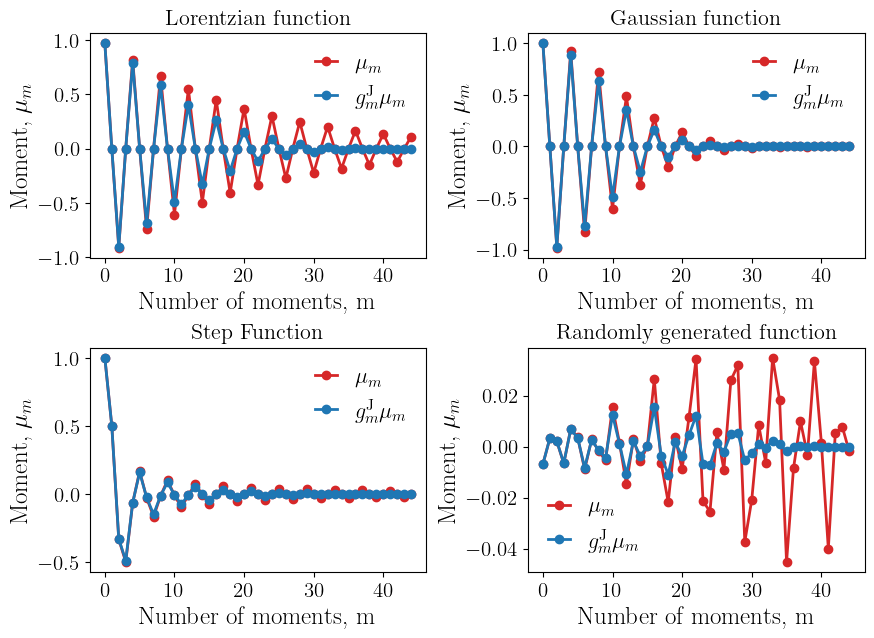

In [ ]:
def main_plot_kernels():
    fig = plt.figure(figsize=(10, 7))
    gs_main = gridspec.GridSpec(2, 2, figure=fig, wspace=0.3, hspace=0.4)

    ax1 = fig.add_subplot(gs_main[0, 0])
    ax2 = fig.add_subplot(gs_main[0, 1])
    ax3 = fig.add_subplot(gs_main[1, 0])
    ax4 = fig.add_subplot(gs_main[1, 1])

    M=45

    plot_moments_WithOutKernel_WithKernel(ax1, "lorentzian", name_kernel = "jackson", num_moments=M, method_int="quad", points_int=100)
    plot_moments_WithOutKernel_WithKernel(ax2, "gaussian", name_kernel = "jackson", num_moments=M, method_int="quad", points_int=100)
    plot_moments_WithOutKernel_WithKernel(ax3, "step_function", name_kernel = "jackson", num_moments=M, method_int="quad", points_int=100)
    plot_moments_WithOutKernel_WithKernel(ax4, "random_mix", name_kernel = "jackson", num_moments=M, method_int="quad", points_int=100)

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main_plot_kernels()

Plotting the moments

In [ ]:
def plot_function_WithOutKernel_WithKernel(ax, nome_func, name_kernel, num_moments, method_int, points_int):
    x = np.linspace(-0.99, 0.99, 1000)

    # Seleção da função alvo (Mantendo seu padrão)
    if nome_func == "lorentzian":
        func = lorentzian
    elif nome_func == "gaussian":
        func = gaussian
    elif nome_func == "step_function":
        func = step_function
    elif nome_func == "random_mix":
        func = random_mix
    else:
        raise ValueError("Função não reconhecida")

    mu = get_moments(func, num_moments, method_int, points_int)
    function_reconstructed = reconstruct(x, mu)
    ax.plot(x, function_reconstructed, lw=2, label=r'$\mu_m$', color="tab:red")

    mu_g = get_kernel(mu, name_kernel)
    function_reconstructed = reconstruct(x, mu_g)
    ax.plot(x, function_reconstructed, lw=2, label=r'$g^{\rm J}_{m}\mu_m$', color="tab:blue")

    # Plot da função Real
    ax.plot(x, func(x), color='black', lw=2, label='Real', linestyle="--")

    # Estilização (Mantendo seu padrão de fontes e labels)
    ax.legend(fontsize=16, loc='best', frameon=False, handlelength=1.0)
    ax.tick_params(axis='both', labelsize=15)
    ax.set_xlabel(r"$x$", fontsize=18)
    ax.set_ylabel(r"$f(x)$", fontsize=18)

    # Títulos
    titles = {
        "lorentzian": "Lorentzian function",
        "gaussian": "Gaussian function",
        "step_function": "Step Function",
        "random_mix": "Randomly generated function"
    }
    ax.set_title(titles.get(nome_func, ""), fontsize=16)

    return ax

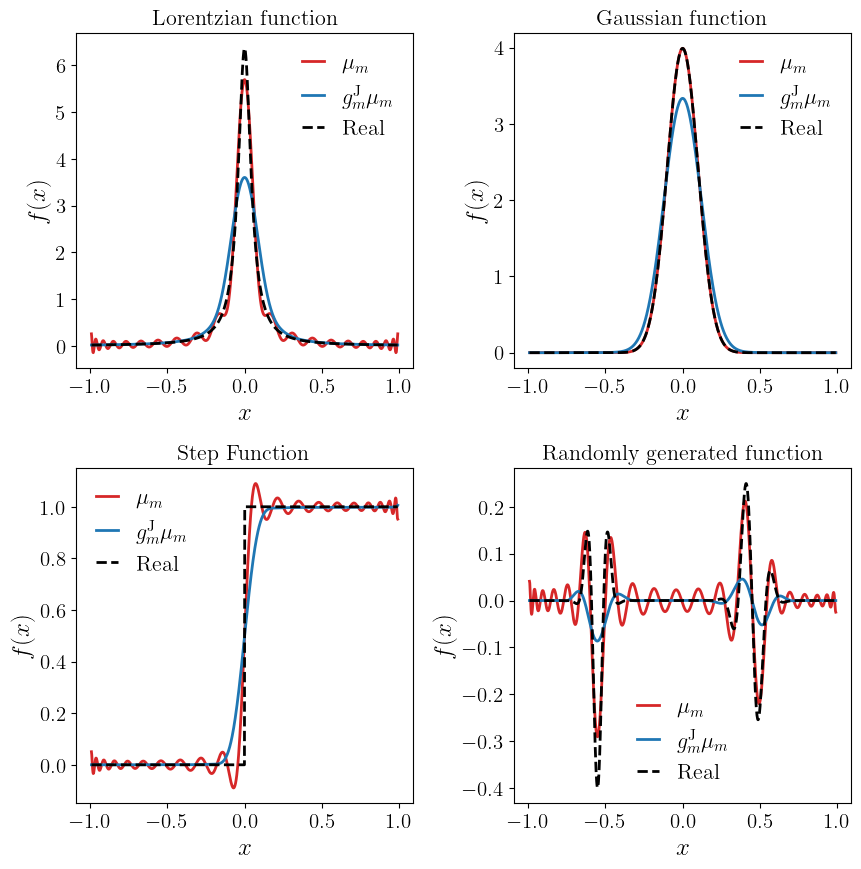

In [ ]:
def main_plot_kernels():
    fig = plt.figure(figsize=(10, 10))
    gs_main = gridspec.GridSpec(2, 2, figure=fig, wspace=0.3, hspace=0.3)

    ax1 = fig.add_subplot(gs_main[0, 0])
    ax2 = fig.add_subplot(gs_main[0, 1])
    ax3 = fig.add_subplot(gs_main[1, 0])
    ax4 = fig.add_subplot(gs_main[1, 1])

    M=45

    plot_function_WithOutKernel_WithKernel(ax1, "lorentzian", name_kernel = "jackson", num_moments=M, method_int="quad", points_int=100)
    plot_function_WithOutKernel_WithKernel(ax2, "gaussian", name_kernel = "jackson", num_moments=M, method_int="quad", points_int=100)
    plot_function_WithOutKernel_WithKernel(ax3, "step_function", name_kernel = "jackson", num_moments=M, method_int="quad", points_int=100)
    plot_function_WithOutKernel_WithKernel(ax4, "random_mix", name_kernel = "jackson", num_moments=M, method_int="quad", points_int=100)

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main_plot_kernels()

In [ ]:
def plot_function_kernels(ax, nome_func, kernels_list, M_fixed, method_int, points_int):
    x = np.linspace(-0.99, 0.99, 1000)

    # Seleção da função alvo (Mantendo seu padrão)
    if nome_func == "lorentzian":
        func = lorentzian
    elif nome_func == "gaussian":
        func = gaussian
    elif nome_func == "step_function":
        func = step_function
    elif nome_func == "random_mix":
        func = random_mix
    else:
        raise ValueError("Função não reconhecida")

    # Calcula os momentos originais (raw) apenas uma vez para esta função
    mu = get_moments(func, M_fixed, method_int, points_int)

    # Cores para os Kernels
    list_cor = [ "tab:red", "tab:blue", "tab:green"]

    for name_kernel, cor in zip(kernels_list, list_cor):
        # Usa a sua função get_kernel
        mu_g = get_kernel(mu, name_kernel)

        function_reconstructed = reconstruct(x, mu_g)

        if name_kernel == "Jackson":
            ax.plot(x, function_reconstructed, lw=2, label=r'$g^{\rm J}_{m}\mu_m$', color=cor)
        elif name_kernel == "Fejer":
            ax.plot(x, function_reconstructed, lw=2, label=r'$g^{\rm F}_{m}\mu_m$', color=cor)
        elif name_kernel == "Lorentz":
            ax.plot(x, function_reconstructed, lw=2, label=r'$g^{\rm L}_{m}\mu_m$', color=cor)

    # Plot da função Real
    ax.plot(x, func(x), color='black', lw=2, label='Real', linestyle="--")

    # Estilização (Mantendo seu padrão de fontes e labels)
    ax.legend(fontsize=16, loc='best', frameon=False, handlelength=1.0)
    ax.tick_params(axis='both', labelsize=15)
    ax.set_xlabel(r"$x$", fontsize=18)
    ax.set_ylabel(r"$f(x)$", fontsize=18)

    # Títulos
    titles = {
        "lorentzian": "Lorentzian function",
        "gaussian": "Gaussian function",
        "step_function": "Step Function",
        "random_mix": "Randomly generated function"
    }
    ax.set_title(titles.get(nome_func, ""), fontsize=16)

    return ax

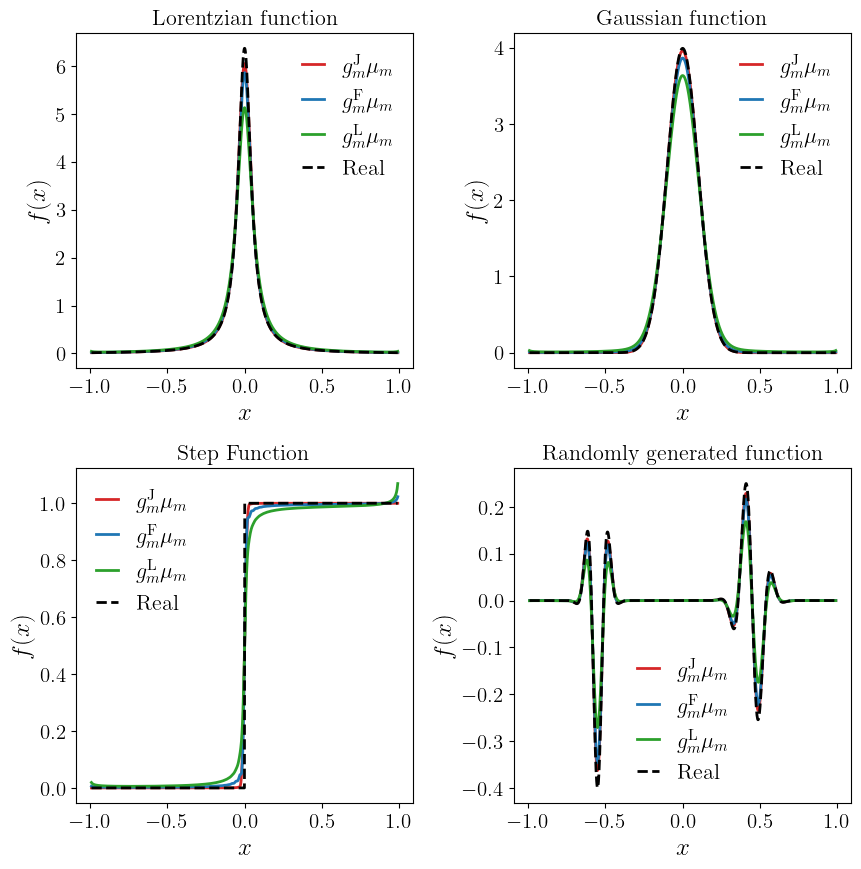

In [ ]:
def main_plot_kernels():
    fig = plt.figure(figsize=(10, 10))
    gs_main = gridspec.GridSpec(2, 2, figure=fig, wspace=0.3, hspace=0.3)

    ax1 = fig.add_subplot(gs_main[0, 0])
    ax2 = fig.add_subplot(gs_main[0, 1])
    ax3 = fig.add_subplot(gs_main[1, 0])
    ax4 = fig.add_subplot(gs_main[1, 1])

    kernels_to_compare = ["Jackson", "Fejer", "Lorentz"]
    M_val = 250

    plot_function_kernels(ax1, "lorentzian", kernels_to_compare, M_val, "quad", 100)
    plot_function_kernels(ax2, "gaussian", kernels_to_compare, M_val, "quad", 100)
    plot_function_kernels(ax3, "step_function", kernels_to_compare, M_val, "quad", 100)
    plot_function_kernels(ax4, "random_mix", kernels_to_compare, M_val, "quad", 100)

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main_plot_kernels()

<h1 align="center"></h1>


#### <center><font color="orange">**Spectral Operator Calculation Setup**</center>
___

[![](https://mermaid.ink/img/pako:eNptk9uO2jAQhl_F8lWQgCUQAkTVVst5T1K1RapUwoVJBmJtbEe2w5IipD5LH61PUsdZFio2F5bH_vz_48n4gCMRAw7wJhVvUUKkRotxyJH57pajBNaFSmCHvom04IJRkir0DDoR8SoIAqVLvtG4RUMnxGPYUA4oI5Iw0CBV8GUtb27__v6DvhdKA7vY-tg5W5w3Q1wz4pkUEShV5TK0LiNnmNM0RnPCaKoFp4RfkSNLjk0-L6AiklK-tWbOlGqkMoi0zBmiXAu0bLh15K5qn_iNrcrEeb-TyEASLeQVV40TS08PIf6REI1igQqRozfCtbU2ViaRKE-Jhq8hPhqRGCKqqOCXKlOjgp6EQa3czKnmMXBFdVFalyoX7ELod3buLCSJ4GaWijVJP0HvMpP23rL3zgvhsWBoZ2pRXekMV-PMgg_O6JQ1YoIB1-p_eF5hVXB_GVTjg116dIx5WqBXkBzSqwo-WujJWU52JM1Lr3NLwD4jvCzTqnbqNlzHW0ljHJjfCHXMQDJShvhQyoVYJ8AgxIGZxkS-hjjkR3PG6PwUgp2OSZFvExxsTDubKM9i4zumZGs68GNVAo9BjkTONQ7avte3Kjg44H0Z-81u2-8NOv2W63W9Oi7MYqvZHgx6ru91u67b9lqdYx3_sratZt8bdLoDv-13Oz2_V56AmJr6P1fPz77C4z8rrRoQ?type=png)](https://mermaid.live/edit#pako:eNptk9uO2jAQhl_F8lWQgCUQAkTVVst5T1K1RapUwoVJBmJtbEe2w5IipD5LH61PUsdZFio2F5bH_vz_48n4gCMRAw7wJhVvUUKkRotxyJH57pajBNaFSmCHvom04IJRkir0DDoR8SoIAqVLvtG4RUMnxGPYUA4oI5Iw0CBV8GUtb27__v6DvhdKA7vY-tg5W5w3Q1wz4pkUEShV5TK0LiNnmNM0RnPCaKoFp4RfkSNLjk0-L6AiklK-tWbOlGqkMoi0zBmiXAu0bLh15K5qn_iNrcrEeb-TyEASLeQVV40TS08PIf6REI1igQqRozfCtbU2ViaRKE-Jhq8hPhqRGCKqqOCXKlOjgp6EQa3czKnmMXBFdVFalyoX7ELod3buLCSJ4GaWijVJP0HvMpP23rL3zgvhsWBoZ2pRXekMV-PMgg_O6JQ1YoIB1-p_eF5hVXB_GVTjg116dIx5WqBXkBzSqwo-WujJWU52JM1Lr3NLwD4jvCzTqnbqNlzHW0ljHJjfCHXMQDJShvhQyoVYJ8AgxIGZxkS-hjjkR3PG6PwUgp2OSZFvExxsTDubKM9i4zumZGs68GNVAo9BjkTONQ7avte3Kjg44H0Z-81u2-8NOv2W63W9Oi7MYqvZHgx6ru91u67b9lqdYx3_sratZt8bdLoDv-13Oz2_V56AmJr6P1fPz77C4z8rrRoQ)

<h1 align="center"></h1>


#### <center><font color="orange">**Quantum Toolbox: Chebyshev Expansion for Hamiltonian Systems**</center>
___


##### __<u>Step 01:</u>__ __Define Parameters__

*Define the system parameters:*
- Lattice Constant
- Hopping Parameter
- On-site Energy
- Unit Cell
- Supercell / System Size

*Define the Chebyshev parameters:*
- Number of Moments ($M$)
- Number of Random Vectors ($R$)
- Energy Resolution
- Broadening / Smoothing (Kernel)

*Physical Observables:*
- Spectral Density
- Local Spectral Density

##### __<u>Step 02:</u>__ __Spectral Rescaling__

Maps the Hamiltonian's energy spectrum $[E_{min}, E_{max}]$ to the $[-1, 1]$ interval required for Chebyshev stability.

In [ ]:
def rescale_hamiltonian(H, eps=0.01):
    # Find the largest and smallest eigenvalues

    ev = np.linalg.eigvalsh(H)
    E_min, E_max = ev[0], ev[-1]

    shift = (E_max + E_min) / 2.0
    scale = (E_max - E_min) / (2.0 - eps)

    I = np.eye(H.shape[0])
    H_rescaled = (H - shift*I) / scale

    return H_rescaled, E_max, E_min, shift, scale

##### __<u>Step 03:</u>__ __Define Operator__

*Options:*
- Density of States
- Orbital Magnetization

##### __<u>Step 04:</u>__ __Moment Calculation__


*Options:*
- Stochastic Trace Estimation
- Exact Trace Calculation
- Local Spectral Density Moments

__Stochastic Trace Estimation:__

Uses random phase vectors (Stochastic Evaluation of the Trace) to estimate the global spectral density for large matrices efficiently

In [ ]:
def calculate_chebyshev_moments_RandomVector(H_rescaled, num_moments, num_randomvectors=1):
    # 1. Preparação de Memória
    size = H_rescaled.shape[0]
    moments = np.zeros(num_moments, dtype=complex)

    # 2. Loop sobre vetores aleatórios (Estimativa do Traço)
    for r in range(num_randomvectors):
        # 3. Estado Inicial
        random_vector = np.exp(1j * 2 * np.pi * np.random.rand(size))
        random_vector /= np.linalg.norm(random_vector)

        # 4. Inicialização da Recorrência

        v0 = random_vector

        v1 = np.dot(H_rescaled, v0)


        vdos = v0

        # 5. Primeiros dois momentos
        moments[0] += np.vdot(vdos, v0)
        moments[1] += np.vdot(vdos, v1)

        # 6. Ciclo de Recorrência de Chebyshev
        for n in range(2, num_moments):

            vn = (2 * np.dot(H_rescaled, v1) - v0)

            moments[n] += np.vdot(vdos, vn)

            # 7. Atualização dos Vetores
            v0 = v1
            v1 = vn

    # 8. Normalização
    return (moments / (num_randomvectors)).real

__Exact Trace Calculation:__

Iterates through the full canonical basis to compute exact Chebyshev moments. Best for smaller systems where accuracy is preferred over speed.

In [ ]:
def calculate_chebyshev_moments_Trace(H_rescaled, num_moments):
    # 1. Preparação de Memória
    size = H_rescaled.shape[0]
    moments = np.zeros(num_moments, dtype=complex)

    # Identidade para representar a base (ou processar coluna a coluna)
    # Para matrizes grandes, não fazemos np.eye, mas sim iteramos

    for i in range(size):
        # 2. Estado Inicial: Vetor da base canônica |i>
        v_init = np.zeros(size, dtype=complex)
        v_init[i] = 1.0

        # 3. Inicialização da Recorrência
        # T_0(H)|i> = I|i> = v0
        # T_1(H)|i> = H|i> = v1
        v0 = v_init
        v1 = H_rescaled @ v0

        moments[0] += np.vdot(v0, v0) # <i|v0>
        moments[1] += np.vdot(v0, v1) # <i|v1>

        # 4. Ciclo de Recorrência
        for n in range(2, num_moments):
            vn = 2 * (H_rescaled @ v1) - v0

            moments[n] += np.vdot(v_init, vn) # <i|vn>

            # Atualização
            v0 = v1
            v1 = vn

    # 5. Normalização pelo tamanho da matriz (D) e parte real
    # O traço médio por estado é mu_n / size
    return (moments / size).real

__Local Spectral Density Moments:__

Calculates moments relative to a specific orbital or site, allowing for the analysis of local electronic properties.

In [ ]:
def calculate_chebyshev_moments_Local(H_rescaled, num_moments, orbital_index):
    # 1. Preparação
    size = H_rescaled.shape[0]
    moments = np.zeros(num_moments, dtype=complex)

    # 2. Estado Inicial: Vetor unitário no orbital escolhido |i>
    # Representa uma função delta de Kronecker no espaço real
    v0 = np.zeros(size, dtype=complex)
    v0[orbital_index] = 1.0

    # 3. Inicialização da Recorrência
    # T_0(H)|i>
    # T_1(H)|i>
    v1 = H_rescaled @ v0

    # No caso local, mu_n = <i| T_n(H) |i>
    # v_dos aqui é o próprio v0 (bra fixo)
    bra = v0

    moments[0] = np.vdot(bra, v0) # <i|i> = 1
    moments[1] = np.vdot(bra, v1) # <i|H|i>

    # 4. Ciclo de Recorrência
    for n in range(2, num_moments):
        vn = 2 * (H_rescaled @ v1) - v0

        moments[n] = np.vdot(bra, vn)

        # Atualização dos vetores para a próxima ordem
        v0 = v1
        v1 = vn

    # 5. Retorno (Para LDOS local, mu_0 é sempre 1.0)
    return moments.real

##### __<u>Step 05:</u>__ __Kernel Processing__


Gibbs Phenomenon Mitigation (Kernels).
Applies damping factors (Jackson, Fejér, or Lorentz) to the moments to eliminate artificial oscillations caused by the truncation of the Chebyshev series.

In [ ]:
def get_kernel(mu, name):

    size = len(mu)
    mu_g = np.zeros(size)

    if name.lower() == "jackson":
        # Kernel de Jackson
        for ll in range(size):
            theta = np.pi * ll / (size + 1)
            k = (size - ll + 1) * np.cos(theta) + np.sin(theta) * (1.0 / np.tan(np.pi / (size + 1)))
            k = k / (size + 1)
            mu_g[ll] = mu[ll] * k

    elif name.lower() == "fejer":
      # Kernel de Fejér
      for ll in range(size):
        k = 1.0 - (ll / size)
        mu_g[ll] = mu[ll] * k


    elif name.lower() == "lorentz":
        # Kernel de Lorentz
        lambd=3.0
        for ll in range(size):
            k = np.sinh(lambd * (1.0 - ll / size)) / np.sinh(lambd)
            mu_g[ll] = mu[ll] * k

    return mu_g

##### __<u>Step 06:</u>__ __Spectral Function Reconstruction__


Performs the final Chebyshev expansion to reconstruct the Spectral Density from the dampened moments

In [ ]:
def get_DOS_Chebyshev(mu_g, energies, shift, scale):
    num_moments = len(mu_g)
    dos = np.zeros_like(energies)

    for i, E in enumerate(energies):

        # Energia normalizada
        x = (E - shift) / scale

        # Fora do intervalo de Chebyshev
        if abs(x) >= 1.0:
            dos[i] = 0.0
            continue

        # Prefator
        prefactor = 1.0 / (np.pi * np.sqrt(1.0 - x*x))

        # Soma de Chebyshev
        s = 0.0
        acos_x = np.arccos(x)

        # n = 0
        s += mu_g[0]

        # n >= 1
        for n in range(1, num_moments):
            Tn = np.cos(n * acos_x)
            s += 2.0 * mu_g[n] * Tn

        dos[i] = prefactor * s / scale  # divisão por scale → volta à energia física

    return dos

<h1 align="center"></h1>

___
## <center><font color="blue">**PART II**</font></center>
___


<h1 align="center"></h1>

### <center><font color="red">**1. Chain of atoms**</font></center>
___

<h1 align="center"></h1>


#### <center><font color="orange">**Analytical Approach**</center>
___


To calculate the band structure of a chain of atoms (one-dimensional lattice) using the **Tight-Binding Approximation**, we follow a mathematical roadmap that transforms a many-body problem into a simple dispersion equation.

**DEFINING THE HAMILTONIAN**

In the Tight-Binding model, we assume the electron is "mostly" bound to its atom but can "hop" to the immediate neighbor due to quantum tunneling.

The Hamiltonian is written as:

$$H = \sum_{n}\epsilon_0|n\rangle \langle n | - t\sum_{n}(|n\rangle \langle n+1| + | n + 1 \rangle \langle n|)$$

Where:

-  $|n \rangle$: Electron state at atom $n$
-  $ϵ_0$: Site energy ( energy of the electron in an isolated atom).
-  $t$: Overlas integral or **hopping parameter** (measures the ease of jumping between neighbors).

**THE BLOCH ANSATZ**

Since the chain is periodic, the solution must satisfy **Bloch's Theorem**. We write the system's wavefunction $|\psi_k\rangle$ as a linear combination of atomic orbitals:

$$|\psi_k\rangle = \frac{1}{\sqrt{N}}\sum_{n}e^{ikna}|n\rangle$$

-  $a$: Distance between atoms (lattice constant).
-  $k$: Wave vector in the first Brillouin zone.

**CALCULATING THE ENERGY $E(k)$**

To find the energy, we solve the Schrödinger equation locally: $\langle n |H|\psi_k\rangle = E(k)\langle n|\psi_k\rangle$.

Applying the Hamiltonian to the Bloch state:

$$H|\psi_k\rangle = \frac{1}{\sqrt{N}}\sum_{n}e^{ikna}(\epsilon_0|n\rangle - t|n - 1\rangle - t|n + 1\rangle)$$

Taking the inner product with a fixed state $\langle n|$:

$$E(k)e^{ikna} = \epsilon_0e^{ikna} - te^{ik(n-1)a} - te^{ik(n+1)a}$$

Dividing everything by $e^{ikna}$:

$$E(k) = \epsilon_0 - t(e^{-ika} + e^{ika})$$

Using Euler's identity $cos(x) = \frac{e^{ix} + e^{-ix}}{2}$, we reach the _**dispersion relation**_:

$$\color{blue}{E(k) = \epsilon_0 - 2t\cos(ka)}$$


**The code below calculates the dispersion relation for the first Brillouin Zone.**

In [ ]:
def analytical_band_structure_chain(eps = 0.0, t = 1.0, a = 1.0):
    # Wave Vector k Definition
    # k ranges from -pi/a to +pi/a (First Brillouin Zone)
    k = np.linspace(-np.pi / a, np.pi / a, 500)

    # Energy E(k) Calculation
    Energy = eps - 2.0 * t * np.cos(k * a)

    return k, Energy

**DENSITY OF STATES (DOS)**

Understanding the _**Desnsity of States (DOS)**_ is fundamental because, while the band structure tells us which energies are permitted, the DOS tells us how many states are avaliable at each energy level.

- In 1D, the DOS exhibits a very peculiar behavior called a _**Van Hove Singularity**_.

- The Density of States ${\rm DOS}(E)$ is defined as the number of states per unit of energy.

_Mathematically:_

$${\rm DOS}(E) = \frac{2}{L}\sum_{k}\delta (E - E(k)) → \frac{1}{\pi}\int \delta (E - E(k))dk$$

For an intinite chain with $E(k) = \epsilon_0 - 2t\cos(ka)$, we use the properties of the delta function to obtain:

$$\color{blue}{{\rm DOS}(E) = \frac{1}{\pi}\frac{1}{|\frac{dE}{dk}|} = \frac{1}{\pi a}\frac{1}{\sqrt{(2t)^2 - (E - \epsilon_0)^2}}}$$

**What does this formula tell us?**

-  **Van Hove Singularities**: When $E → \epsilon_0 ± 2t$ (the band edges), the denominator goes to zero.
-  This causes a singularity $({\rm DOS}(E) → ∞)$. In one dimension, the band edges are extremely "populated" with states.


In [ ]:
def analytical_DOS_chain(eps = 0.0, t = 1.0, a = 1.0, eta = 0.05):
    # Energy Range DOS
    E_range = np.linspace(-2.5 * t, 2.5 * t, 1000)

    # Analytical DOS with broadening
    # We use Green's function approach: DOS = -1/pi * Im(G)
    # G(E) = 1 / sqrt((E - eps0)^2 - (2t)^2)
    z_Chain = E_range - eps + 1j * eta
    dos_Chain = np.abs(np.imag(1 / np.sqrt(z_Chain**2 - (2*t)**2))) * (1.0/(np.pi * a) )

    return E_range, dos_Chain

<h1 align="center"></h1>

#### <center><font color="orange">**Exact Diagonalization**</center>
___


Tight-binding modeling via Pybinding for Chain of Atoms

In [ ]:
def get_H_Chain( t = 1.0 ):
    a = 1.0       #Distância interatomica (nm)
    a1 = a * np.array([1]) #Vetor em x

    lat_Chain = pb.Lattice(a1 = a1)

    lat_Chain.add_sublattices(
        ("A", [0], 0)
    )

    lat_Chain.add_hoppings(
        ([1], "A", "A", -t)
    )
    return lat_Chain


Plot: Lattice model, unit cell, and first Brillouin zone

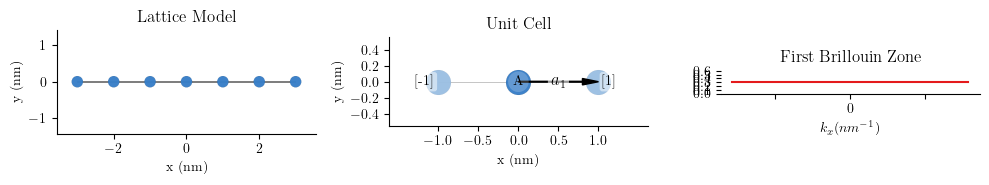

In [ ]:
lat_Chain = get_H_Chain()

plot=plt.figure(figsize=(10., 3))

model = pb.Model(lat_Chain, pb.rectangle(7))
plt.subplot(131, title="Lattice Model")
model.plot(hopping={'width': 2, 'cmap': 'auto'})

plt.subplot(132, title="Unit Cell")
lat_Chain.plot()

plt.subplot(133, title="First Brillouin Zone ")
lat_Chain.plot_brillouin_zone()

plt.tight_layout()
plt.show(plot)

Plot: Band structure and Density of Sates

In [ ]:
def plot_BandStructure_chain(ax, bands_Chain, a =1.0):
    bands_Chain.plot(ax=ax, color = "tab:red", lw = 2, label = r'Diagonalization')

    # Analytical--------------------------------------------------------------
    k, Energy = analytical_band_structure_chain(eps = 0.0, t = 1.0, a = 1.0)
    ax.plot(k, Energy, label = r'Analytical', color = "black", lw = 2, linestyle='--')
    # ------------------------------------------------------------------------

    ax.legend(fontsize=16, loc='best', frameon=False, handlelength=1.0)

    ax.axhline(0, color = "black", linewidth = 0.5, linestyle = "--")
    ax.axvline(0, color = "black", linewidth = 0.5, linestyle = "--")

    ticks = [-np.pi/a, 0., np.pi/a]
    labels = [r'$-\pi/a$', r'0', r'$\pi/a$']
    ax.set_xticks(ticks)
    ax.set_xticklabels(labels, fontsize=18)
    ax.set_xlabel(r"$k$ $({\rm nm}^{-1})$", fontsize = 18)
    ax.set_yticks(np.arange(-2, 2.1, 1.0))
    ax.set_ylim(-2.5, 2.5)
    ax.set_ylabel("Energy (eV)", fontsize = 18)
    ax.tick_params(axis='y', labelsize=18)

    return ax

In [ ]:
def plot_DOS_chain(ax, energies_axis, dos_values, a = 1.0, t = 1.0):
    ax.plot(dos_values, energies_axis, color="tab:red", lw=2, label="Diagonalization")

    # Analytical -----------------------------------------------------------------------------
    E_range, dos_Chain = analytical_DOS_chain(eps = 0.0, t = 1.0, a = 1.0, eta = 0.001)
    ax.plot(dos_Chain, E_range, label = r'Analytical', color = "black", lw = 2, linestyle='--')
    # ----------------------------------------------------------------------------------------

    ax.legend(fontsize=16, loc='best', frameon=False, handlelength=1.0)

    ax.set_yticks(np.arange(-2., 5., 1.0))
    ax.set_ylim(-2.5, 2.5)
    ax.tick_params(axis='y', labelsize=18)

    ax.set_xticks(np.arange(0, 2.5, 1.))
    ax.set_xlim(0, 2.)
    ax.tick_params(axis='x', labelsize=18)
    ax.set_xlabel(r"DOS $({\rm a.u.})$", fontsize = 18)

    return ax

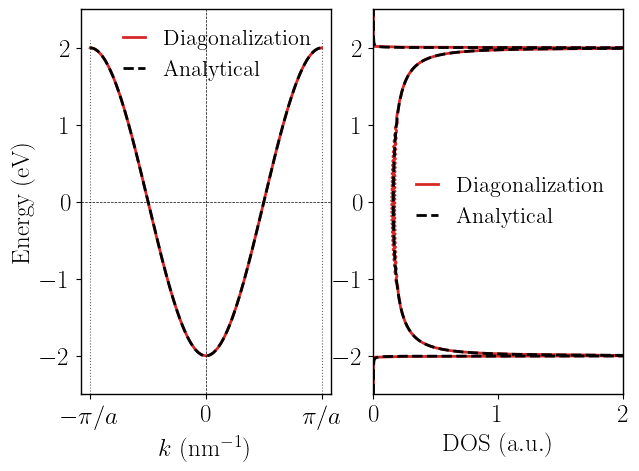

In [ ]:
def main_plot_BandStructure_Analytical_vs_Diagonalization():
    # 1. Adjust the figure size to fit both plots side-by-side
    fig = plt.figure(figsize=(7, 5))

    # 2. Create the gridspec
    gs_main = gridspec.GridSpec(1, 2, figure=fig, wspace=0.17)

    # 3. Create the subplots
    ax1 = fig.add_subplot(gs_main[0, 0])
    ax2 = fig.add_subplot(gs_main[0, 1])

    # 4. Calculate
    """ BAND STRUCTURE: """
    # Model initializatio
    lat_Chain = get_H_Chain()
    # Bulk symmetry application
    model_Chain = pb.Model(lat_Chain, pb.translational_symmetry(1))
    # Band structure solver initialization (numerical diagonalization of the Hamiltonian)
    solver_Chain = pb.solver.lapack(model_Chain)  # Solver: This uses LAPACK to diagonalize the Hamiltonian matrix for each k_point
    # Define the k-path from -pi/a to +pi/a
    bands_Chain = solver_Chain.calc_bands(-np.pi , np.pi)
    # Plot
    plot_BandStructure_chain(ax1, bands_Chain)
    """ DENSITY OF STATES: """
    # Sampling the Brillouin Zone
    k_points = np.linspace(-np.pi , np.pi, 1000)
    # Solving Hamiltonian
    all_energies = []
    for k in k_points:
        # calculates the energy levels (dispersion relation E(k)) for that k.
        solver_Chain.set_wave_vector(k) # Move para o ponto k específico
        all_energies.append(solver_Chain.eigenvalues) # Coleta os autovalores
    # Flattening the Data:
    # The previous step created a list of arrays (one array of energies for each k).
    # This line collapses them into one long 1D list of every energy level found across the entire zone.
    all_energies = np.array(all_energies).flatten()
    # Setting the Energy Axis
    energies_axis = np.linspace(-2.5, 2.5, 500)
    # A smaller value gives sharper peaks; a larger value makes the graph smoother
    broadening = 0.005
    # The Gaussian "Smearing" Logic
    # Criamos uma matriz de diferenças para evitar loops lentos
    # (E - E_n)^2
    diff_sq = (energies_axis[:, np.newaxis] - all_energies[np.newaxis, :])**2
    # Soma das gaussianas: exp(-0.5 * diff^2 / sigma^2)
    dos_values = np.sum(np.exp(-0.5 * diff_sq / broadening**2), axis=1)
    # Normalization
    dos_values /= (broadening * np.sqrt(2 * np.pi) * len(k_points))
    # Plot
    plot_DOS_chain(ax2, energies_axis, dos_values)

    # 5. Closing the boxes (Box Style) in a robust way
    for ax in [ax1, ax2]:
        for spine in ax.spines.values():
            spine.set_visible(True)
            spine.set_color('black')
            spine.set_linewidth(1.0) # Makes the border slightly sharper/cleaner
        ax.set_frame_on(True)

    # 6. Finalization
    # tight_layout usually works better than subplots_adjust to prevent label clipping
    plt.tight_layout()
    #plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95,
    #                      hspace=0.4, wspace=0.4)

    plt.show()
    plt.close()

    return energies_axis, dos_values

if __name__ == "__main__":
    energies_axis, dos_values = main_plot_BandStructure_Analytical_vs_Diagonalization()

<h1 align="center"></h1>


#### <center><font color="orange">**Chebyshev Expansion**</center>
___


In [ ]:
def plot_DOS_chain_Chebyshev(ax, energies_Chain, dos_Chain):
    # Diagonalization ----------------------------------------------------------------
    ax.plot(energies_axis, dos_values, color="tab:red", lw=2, label="Diagonalization")
    # --------------------------------------------------------------------------------
    # Analytical -----------------------------------------------------------------------------
    #E_range, dos_Chain = analytical_DOS_chain(eps = 0.0, t = 1.0, a = 1.0, eta = 0.001)
    #ax.plot(dos_Chain, E_range, label = r'Analytical', color = "black", lw = 2, linestyle='--')
    # ----------------------------------------------------------------------------------------
    ax.plot(energies_Chain, dos_Chain, color="tab:blue", lw=2, label="Chebyshev")
    ax.legend(fontsize=16, loc='best', frameon=False, handlelength=1.0)

    ax.set_xticks(np.arange(-2., 5., 1.0))
    ax.set_xlim(-2.5, 2.5)
    ax.tick_params(axis='x', labelsize=18)
    ax.set_xlabel(r"Energy (eV)", fontsize = 18)

    ax.set_yticks(np.arange(0, 2.5, 1.))
    ax.set_ylim(0, 2.)
    ax.tick_params(axis='y', labelsize=18)
    ax.set_ylabel(r"DOS $({\rm a.u.})$", fontsize = 18)

    return ax

In [ ]:
def calcular_ldos(n, E, epsilon_0=0.0, t=1.0):
    # Normalização e máscara
    x = (E - epsilon_0) / (2 * np.abs(t))
    mask = np.abs(x) < 1

    rho = np.zeros_like(E)

    # Ângulo auxiliar phi
    # Usamos o x clipado para evitar avisos de precisão numérica no arccos
    phi = np.arccos(np.clip(x[mask], -1.0, 1.0))

    # Expressão correta: sin^2((n+1)phi) / [pi * |t| * sin(phi)]
    numerador = np.sin((n + 1) * phi)**2
    denominador = np.pi * np.abs(t) * np.sin(phi)

    rho[mask] = numerador / denominador
    return rho

In [ ]:
def plot_LDOS_chain_Chebyshev(ax, energies_Chain, ldos_Chain, orbital_index):
    ax.plot(energies_Chain, ldos_Chain, color="tab:blue", lw=2, label="Chebyshev")
    # Analytical ---------------------------------------------------------------------
    ldos_values = calcular_ldos(orbital_index, energies_Chain)
    ax.plot(energies_Chain, ldos_values, color="black", lw=2, ls="--", label="Analytical", alpha=0.7)
    # --------------------------------------------------------------------------------
    ax.legend(fontsize=16, loc='best', frameon=False, handlelength=1.0)

    ax.set_xticks(np.arange(-2., 5., 1.0))
    ax.set_xlim(-2.5, 2.5)
    ax.tick_params(axis='x', labelsize=18)
    ax.set_xlabel(r"Energy (eV)", fontsize = 18)

    ax.set_yticks(np.arange(0, 2.5, 0.5))
    ax.set_ylim(0, 0.7)
    ax.tick_params(axis='y', labelsize=18)
    ax.set_ylabel(r"LDOS $({\rm a.u.})$", fontsize = 18)

    if orbital_index == 0: texto = r"Site = 0"
    if orbital_index == 1: texto = r"Site = 1"
    if orbital_index == 2: texto = r"Site = 2"
    ax.text(-0.7, 0.4, texto, fontsize=15, fontweight='bold', color="tab:red")

    return ax

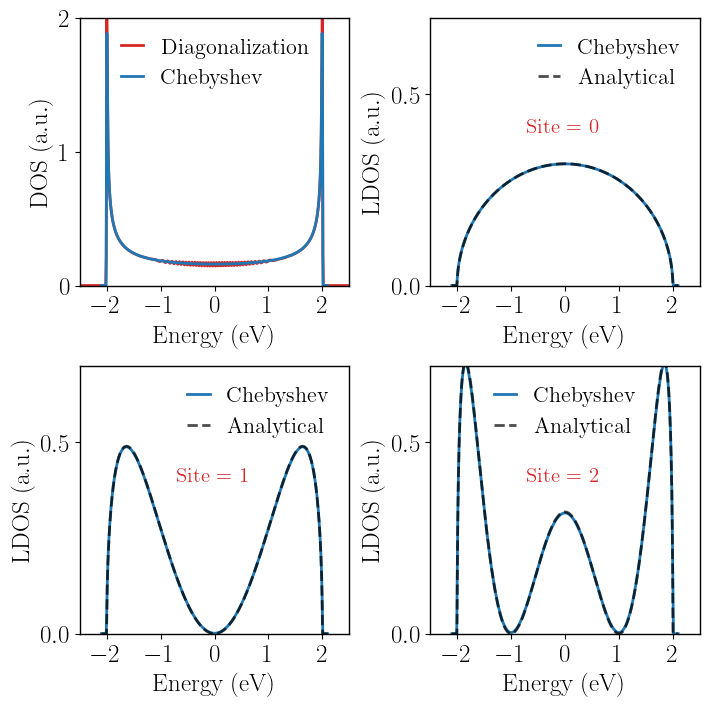

In [ ]:
def main_plot_DOS_chain_Chebyshev():
    # 1. Adjust the figure size to fit both plots side-by-side
    fig = plt.figure(figsize=(8, 8))

    # 2. Create the gridspec
    gs_main = gridspec.GridSpec(2, 2, figure=fig, wspace=0.3, hspace=0.3)

    # 3. Create the subplots
    ax1 = fig.add_subplot(gs_main[0, 0])
    ax2 = fig.add_subplot(gs_main[0, 1])
    ax3 = fig.add_subplot(gs_main[1, 0])
    ax4 = fig.add_subplot(gs_main[1, 1])

    """ 4. Calculate and plot """
    """ ============== Density Of States ============== """
    # -------- Define Parameters --------
    num_randomvectors = 100
    num_moments = 100
    # -------- Spectral Rescaling --------
    lattice = get_H_Chain()
    model = pb.Model(lattice, pb.primitive(200))#, pb.translational_symmetry(a1=True)) #alterado por erro
    H = model.hamiltonian.toarray() #(order='F')
    H_rescaled, E_max_Chain, E_min_Chain, shift, scale = rescale_hamiltonian(H)
    # -------- Moment Calculation - Stochastic Trace Estimation --------
    mu = np.zeros(num_moments)
    #mu = calculate_chebyshev_moments_RandomVector(H_rescaled, num_moments, num_randomvectors)
    mu = calculate_chebyshev_moments_Trace(H_rescaled, num_moments)
    # -------- Kernel Processing --------
    mu_g = get_kernel(mu, name="jackson")
    # -------- Spectral Function Reconstruction --------
    energies_Chain = np.linspace(E_min_Chain - 0.1, E_max_Chain + 0.1, 1000)
    dos_Chain = get_DOS_Chebyshev(mu_g, energies_Chain, shift, scale)
    # -------- Plot -------
    plot_DOS_chain_Chebyshev(ax1, energies_Chain, dos_Chain)
    """ ============== Local Density Of States - Site 0 ============== """
    orbital_index = 0
    # -------- Moment Calculation - Stochastic Trace Estimation --------
    mu = np.zeros(num_moments)
    mu =  calculate_chebyshev_moments_Local(H_rescaled, num_moments, orbital_index)
    # -------- Kernel Processing --------
    mu_g = get_kernel(mu, name="jackson")
    # -------- Spectral Function Reconstruction --------
    energies_Chain = np.linspace(E_min_Chain - 0.1, E_max_Chain + 0.1, 1000)
    ldos_Chain = get_DOS_Chebyshev(mu_g, energies_Chain, shift, scale)
    # -------- Plot -------
    plot_LDOS_chain_Chebyshev(ax2, energies_Chain, ldos_Chain, orbital_index)
    """ ============== Local Density Of States - Site 1 ============== """
    orbital_index = 1
    # -------- Moment Calculation - Stochastic Trace Estimation --------
    mu = np.zeros(num_moments)
    mu =  calculate_chebyshev_moments_Local(H_rescaled, num_moments, orbital_index)
    # -------- Kernel Processing --------
    mu_g = get_kernel(mu, name="jackson")
    # -------- Spectral Function Reconstruction --------
    energies_Chain = np.linspace(E_min_Chain - 0.1, E_max_Chain + 0.1, 1000)
    ldos_Chain = get_DOS_Chebyshev(mu_g, energies_Chain, shift, scale)
    # -------- Plot -------
    plot_LDOS_chain_Chebyshev(ax3, energies_Chain, ldos_Chain, orbital_index)
    """ ============== Local Density Of States - Site 2 ============== """
    orbital_index = 2
    # -------- Moment Calculation - Stochastic Trace Estimation --------
    mu = np.zeros(num_moments)
    mu =  calculate_chebyshev_moments_Local(H_rescaled, num_moments, orbital_index)
    # -------- Kernel Processing --------
    mu_g = get_kernel(mu, name="jackson")
    # -------- Spectral Function Reconstruction --------
    energies_Chain = np.linspace(E_min_Chain - 0.1, E_max_Chain + 0.1, 1000)
    ldos_Chain = get_DOS_Chebyshev(mu_g, energies_Chain, shift, scale)
    # -------- Plot -------
    plot_LDOS_chain_Chebyshev(ax4, energies_Chain, ldos_Chain, orbital_index)

    # 5. Closing the boxes (Box Style) in a robust way
    for ax in [ax1, ax2, ax3, ax4]:
        for spine in ax.spines.values():
            spine.set_visible(True)
            spine.set_color('black')
            spine.set_linewidth(1.0) # Makes the border slightly sharper/cleaner
        ax.set_frame_on(True)

    # 6. Finalization
    # tight_layout usually works better than subplots_adjust to prevent label clipping
    plt.tight_layout()
    #plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95,
    #                      hspace=0.4, wspace=0.4)

    plt.show()
    plt.close()

if __name__ == "__main__":
    main_plot_DOS_chain_Chebyshev()

<h1 align="center"></h1>

### <center><font color="red">**2. Square Lattice**</font></center>
___

<h1 align="center"></h1>


#### <center><font color="orange">**Analytical Approach**</center>
___


**DEFINING THE HAMILTONIAN**

For a 2D squarec lattice, an electron can hop to its nearest neighbors in both the x and y directions. Assuming the same hopping parameter $t$ in both direction and a lattice constant $a$.

The Hamiltonian is:

$$H = \sum_{ij}\epsilon_0|i,j\rangle \langle i,j | - t\sum_{ij}(|ij\rangle \langle i+1,j| + | i + 1,j \rangle \langle i,j| + |i,j\rangle \langle i,j + 1| + |i,j + 1 \rangle \langle i,j|)$$

Where $|i,j \rangle$ represents the state of an electron at the atom at site $(i,j)$.

**THE BLOCH ANSATZ IN 2D**

For a 2D periodic lattice, the Bloch wavefunction is:

$$|\psi_k \rangle = \frac{1}{\sqrt{N}}\sum_{ij}e^{i(k_xia + k_yja)}|i,j\rangle$$

Where $k = (k_x,k_y)$ is the 2D wave vector.

**CALCULATING THE ENERGY $E(k)$**

We apply the Hamiltonian to the Bloch state and take the inner product with a fixed sit $\langle m,m|$:

$$\langle m,n|H|\psi_k\rangle = E(k)\langle m,n|\psi_k\rangle$$

$$E(k)e^{i(k_xma + k_yna)} = \epsilon_0e^{i(k_xma + k_yna)} - t(e^{i((m+1)k_xa + nk_ya)} + e^{i((m-1)k_xa + nk_ya)} + e^{i(mk_xa + (n+1)k_ya)}+ e^{i(mk_xa + (n - 1)k_ya)})$$

Dividing by $e^{i(k_xma + k_yna)}$:

$$E(k) = \epsilon_0 - t(e^{ik_xa} + e^{-ik_xa} + e^{ik_ya} + e^{-ik_ya})$$

Using Euler's identity, we get the 2D disperion relation:

$$E(k) = \epsilon_0 - 2t(\cos(k_xa) + \cos(k_ya))$$


In [ ]:
def get_path(n_pts, HS_points):
    """
    Parameters:
        n_pts           : Number of points in each segment, total = len(HS_points) * n_pts
        HS_points       : List of high-symmetry points to form the path (e.g., [Gamma, K, M, Gamma])
    """
    # Generate path segments between consecutive high-symmetry points
    segments = []
    for i in range(len(HS_points) - 1):
        start_point, end_point = HS_points[i], HS_points[i + 1]
        segment = np.linspace(start_point, end_point, n_pts)
        segments.append(segment)

    # Stack all segments to form the full path
    full_path = np.vstack(segments)

    return full_path

In [ ]:
def analytical_BandStructure_Square(full_path, eps = 0.0, t = 1.0, a = 1.0):

    kx = full_path[:, 0]
    ky = full_path[:, 1]

    # Energy E(k) Calculation
    E_Square = eps - 2 * t * (np.cos(kx * a) + np.cos(ky * a))

    dists = np.sqrt(np.sum(np.diff(full_path, axis=0)**2, axis=1))
    k_axis = np.concatenate(([0], np.cumsum(dists)))

    return k_axis, E_Square

**DENSITY OF STATES (DOS)**

The density of states per unit area is defined by the integral over the first Brillouin zone (BZ):

$${\rm DOS}(E) = \frac{1}{(2\pi)^2}\int_{\rm BZ} \delta (E - E(k))d^2k$$

Due to the topology of the square lattice in 2D, this integral results in a specific mathematical form involving elliptic integrals.

We can numerically calculate it by using a histogram of many energy values or, more accurately, by integrating the analytical formula for $\rho(E)$ with broadening. A commom numercial approach is to use the Green's function method (with broadening $\eta$).

The analytical expression for the DOS of a 2D square lattice involves the complete elliptic integral of the first kind $(K(x))$:

$$\color{blue}{{\rm DOS}(E) = \frac{1}{\pi^2t}K\left(\sqrt{1 -  \left(\frac{E - \epsilon_0}{4t}\right)^2}\right)}$$

where $K(m)$ is the first-kind complete elliptic integral, defined as $K(m) = \int_{0}^{\pi/2} \frac{d\theta}{\sqrt{1 - m^2 \sin^2\theta}}$.

- This formula is valid for $|E - \epsilon_0| < 4t$.
- It exhibits a **logorithmic singularity** at $E = \epsilon_0$ (the band center)
- **sharp steps** at the band edges $(E = \epsilon_0 \pm 4t)$, which are also Van Hove singularities.

In [ ]:
from scipy.special import ellipk
def analytical_DOS_Square(eps = 0.0, t = 1.0, a = 1.0, eta = 0.05):
    # Energy Range DOS
    E_min_Square = eps - 4 * t
    E_max_Square = eps + 4 * t
    E_range_Square = np.linspace(E_min_Square - 0.5 * t, E_max_Square + 0.5 * t, 1000)

    # Analytical DOS for 2D Square Lattice (using elliptic integral)
    dos_analytical_Square = np.zeros_like(E_range_Square)

    for i, E_val_Square in enumerate(E_range_Square):
        x_Square = (E_val_Square - eps) / (4 * t)

        # Check if E_val_Square is within the band
        if -1 <= x_Square <= 1:

            #Argument for elliptic integrals: k^2 = 1 - x^2
            #Note: ellipk takes k, not k^2, So ots sqrt(1 - x^2)
            k_arg_Square = np.sqrt(1 - x_Square**2)

            if k_arg_Square > 1e-10:
                dos_analytical_Square[i] = 1 / (np.pi**2 * t) * ellipk(k_arg_Square)

            else: # Handle the edges where k_arg_Square is close to 0
                dos_analytical_Square[i] = (1 / (np.pi**2 * t)) * ellipk(1-1e-10)

        else:
            dos_analytical_Square[i] = 0


    return E_range_Square, dos_analytical_Square

<h1 align="center"></h1>

#### <center><font color="orange">**Exact Diagonalization**</center>
___


Tight-binding modeling via Pybinding

In [ ]:
def get_H_SquareLattice( t = 1.0 ):
    a = 1.0       #Variavel distancia atomo-atomo (nm)
    a1 = a * np.array([1 , 0])
    a2 = a * np.array([0 , 1])

    lat_Square = pb.Lattice(a1 = a1, a2 = a2)  #Definir rede

    lat_Square.add_sublattices(
        ("A", [0 , 0], 0)
    )

    lat_Square.add_hoppings(
        ([1 , 0], "A" , "A" , -t),
        ([0 , 1], "A" , "A" , -t)
    )
    return lat_Square

Plot: Lattice model, unit cell, and first Brillouin zone

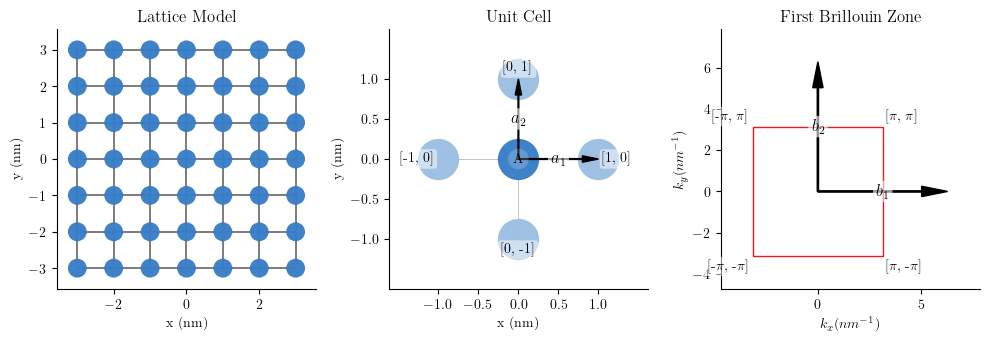

In [ ]:
lat_Square = get_H_SquareLattice()

plot=plt.figure(figsize=(10, 4))

model = pb.Model(lat_Square, pb.rectangle(7))
plt.subplot(131, title="Lattice Model")
model.plot(hopping={'width': 2, 'cmap': 'auto'})

plt.subplot(132, title="Unit Cell")
lat_Square.plot()

plt.subplot(133, title="First Brillouin Zone ")
lat_Square.plot_brillouin_zone()

plt.tight_layout()
plt.show(plot)

Plot: Band structure and Density of Sates

Visualizing a 2D band structure directly as a surface can. be complex. We often plot it along high-symmetry paths in the **2D Brillouin Zone**. For a square lattice, a common path is $Γ → X → M → Γ$.

-   $Γ: (0,0)$
-   $X: (\pi/a , 0)$
-   $M: (\pi/a, \pi/a)$

In [ ]:
def plot_BandStructure_square(ax, bands_square, a =1.0):
    bands_square.plot(ax=ax, color = "tab:red", lw = 2, label = r'Diagonalization')

    # Analytical--------------------------------------------------------------
    # Custom high-symmetry points:
    Gamma = np.array([      0,       0])
    X     = np.array([np.pi/a,       0])
    M     = np.array([np.pi/a, np.pi/a])
    HS_points = np.array([Gamma, X, M, Gamma])
    full_path = get_path(n_pts=100, HS_points=HS_points)
    k, Energy = analytical_BandStructure_Square(full_path, eps = 0.0, t = 1.0, a = 1.0)
    ax.plot(k, Energy, label = r'Analytical', color = "black", lw = 2, linestyle='--')
    # ------------------------------------------------------------------------

    ax.legend(fontsize=16, loc='best', frameon=False, handlelength=1.0)

    ax.axvline(k[99], color = "black", linewidth = 0.5, linestyle = "--")
    ax.axvline(k[199], color = "black", linewidth = 0.5, linestyle = "--")

    ticks = [k[0], k[99], k[199], k[299]]
    labels = [r'$\Gamma$', r'${\rm X}$', r'${\rm M}$', r'$\Gamma$']
    ax.set_xticks(ticks)
    ax.set_xticklabels(labels, fontsize=18)
    ax.set_xlabel("")

    ax.set_yticks(np.arange(-4, 5.1, 2.0))
    ax.set_ylim(-4.5, 4.5)
    ax.set_ylabel("Energy (eV)", fontsize = 18)
    ax.tick_params(axis='y', labelsize=18)

    return ax

In [ ]:
def plot_DOS_square(ax, energies_axis, dos_values, a = 1.0, t = 1.0):
    ax.plot(dos_values, energies_axis, color="tab:red", lw=2, label="Diagonalization")

    # Analytical -----------------------------------------------------------------------------
    E_range, dos_Chain = analytical_DOS_Square(eps = 0.0, t = 1.0, a = 1.0, eta = 0.001)
    ax.plot(dos_Chain/2.2, E_range, label = r'Analytical', color = "black", lw = 2, linestyle='--')
    # ----------------------------------------------------------------------------------------

    ax.legend(fontsize=16, loc='best', frameon=False, handlelength=1.0)

    ax.set_yticks(np.arange(-4., 5., 2.0))
    ax.set_ylim(-4.5, 4.5)
    ax.tick_params(axis='y', labelsize=18)

    ax.set_xticks(np.arange(0, 1.5, 0.2))
    ax.set_xlim(0, 0.5)
    ax.tick_params(axis='x', labelsize=18)
    ax.set_xlabel(r"DOS $({\rm a.u.})$", fontsize = 18)

    return ax

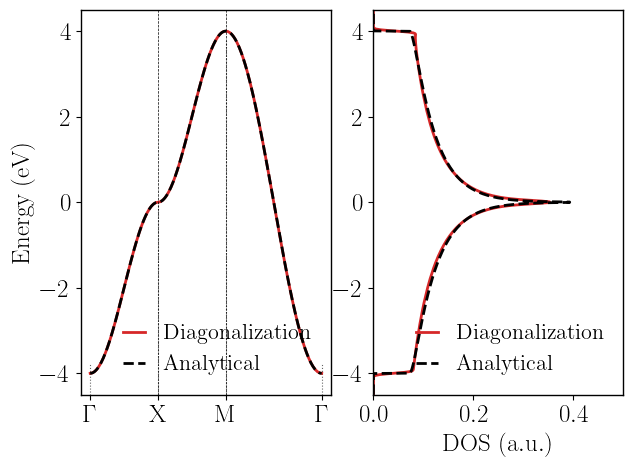

In [ ]:
def main_plot_BandStructure_Analytical_vs_Diagonalization():
    # 1. Adjust the figure size to fit both plots side-by-side
    fig = plt.figure(figsize=(7, 5))

    # 2. Create the gridspec
    gs_main = gridspec.GridSpec(1, 2, figure=fig, wspace=0.17)

    # 3. Create the subplots
    ax1 = fig.add_subplot(gs_main[0, 0])
    ax2 = fig.add_subplot(gs_main[0, 1])

    # 4. Calculate
    """ BAND STRUCTURE: """
    # Model initializatio
    lat_Square = get_H_SquareLattice()
    # Bulk symmetry application
    model_Square = pb.Model(lat_Square, pb.translational_symmetry(a1=True, a2=True))
    # Band structure solver initialization (numerical diagonalization of the Hamiltonian)
    solver_Square = pb.solver.lapack(model_Square)  # Solver: This uses LAPACK to diagonalize the Hamiltonian matrix for each k_point
    # Define the k-path
    a = 1.0
    Gamma = np.array([      0,       0])
    X     = np.array([np.pi/a,       0])
    M     = np.array([np.pi/a, np.pi/a])
    bands_Square = solver_Square.calc_bands(Gamma, X, M, Gamma)
    # Plot
    plot_BandStructure_square(ax1, bands_Square)
    """ DENSITY OF STATES: """
    # We need a 2D grid of k-points for an accurate 2D DOS
    nk = 250
    kx = np.linspace(-np.pi, np.pi, nk)
    ky = np.linspace(-np.pi, np.pi, nk)
    KX, KY = np.meshgrid(kx, ky)
    # Solving Hamiltonian
    all_energies = []
    for x in kx:
        for y in ky:
            # calculates the energy levels (dispersion relation E(k)) for that k
            solver_Square.set_wave_vector([x, y])
            all_energies.append(solver_Square.eigenvalues)
    # Flattening the Data:
    # The previous step created a list of arrays (one array of energies for each k).
    # This line collapses them into one long 1D list of every energy level found across the entire zone.
    all_energies = np.array(all_energies).flatten()
    # Setting the Energy Axis
    energies_axis = np.linspace(-4.5, 4.5, 500)
    # A smaller value gives sharper peaks; a larger value makes the graph smoother
    broadening = 0.03
    # The Gaussian "Smearing" Logic
    # Criamos uma matriz de diferenças para evitar loops lentos
    # (E - E_n)^2
    diff_sq = (energies_axis[:, np.newaxis] - all_energies[np.newaxis, :])**2
    # Soma das gaussianas: exp(-0.5 * diff^2 / sigma^2)
    dos_values = np.sum(np.exp(-0.5 * diff_sq / broadening**2), axis=1)
    # Normalization
    dos_values /= (broadening * np.sqrt(2 * np.pi) * len(all_energies))
    # Plot
    plot_DOS_square(ax2, energies_axis, dos_values)

    # 5. Closing the boxes (Box Style) in a robust way
    for ax in [ax1, ax2]:
        for spine in ax.spines.values():
            spine.set_visible(True)
            spine.set_color('black')
            spine.set_linewidth(1.0) # Makes the border slightly sharper/cleaner
        ax.set_frame_on(True)

    # 6. Finalization
    # tight_layout usually works better than subplots_adjust to prevent label clipping
    plt.tight_layout()
    #plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95,
    #                      hspace=0.4, wspace=0.4)

    plt.show()
    plt.close()

    return energies_axis, dos_values

if __name__ == "__main__":
    energies_axis, dos_values = main_plot_BandStructure_Analytical_vs_Diagonalization()

<h1 align="center"></h1>


#### <center><font color="orange">**Chebyshev Expansion**</center>
___


In [ ]:
def plot_DOS_square_Chebyshev(ax, energies_Square, dos_Square):
    # Diagonalization ----------------------------------------------------------------
    ax.plot(energies_axis, dos_values, color="tab:red", lw=2, label="Diagonalization")
    # --------------------------------------------------------------------------------
    ax.plot(energies_Square, dos_Square, color="tab:blue", lw=2, label="Chebyshev")
    ax.legend(fontsize=16, loc='best', frameon=False, handlelength=1.0)

    ax.set_xticks(np.arange(-4., 5., 2.0))
    ax.set_xlim(-4.5, 4.5)
    ax.tick_params(axis='x', labelsize=18)
    ax.set_xlabel(r"Energy (eV)", fontsize = 18)

    ax.set_yticks(np.arange(0, 1.5, 0.2))
    ax.set_ylim(0, 0.5)
    ax.tick_params(axis='y', labelsize=18)
    ax.set_ylabel(r"DOS $({\rm a.u.})$", fontsize = 18)

    return ax

In [ ]:
def plot_LDOS_square_Chebyshev(ax, energies_Square, ldos_Square):
    ax.plot(energies_Square, ldos_Square, color="tab:blue", lw=2, label="Chebyshev")
    ax.legend(fontsize=16, loc='best', frameon=False, handlelength=1.0)

    ax.set_xticks(np.arange(-4., 4.5, 2.0))
    ax.set_xlim(-4.5, 4.5)
    ax.tick_params(axis='x', labelsize=18)
    ax.set_xlabel(r"Energy (eV)", fontsize = 18)

    ax.set_yticks(np.arange(0, 2.5, 0.2))
    ax.set_ylim(0, 0.5)
    ax.tick_params(axis='y', labelsize=18)
    ax.set_ylabel(r"LDOS $({\rm a.u.})$", fontsize = 18)

    #texto = r"Site = 2"
    #ax.text(-0.7, 0.4, texto, fontsize=15, fontweight='bold', color="tab:red")

    return ax

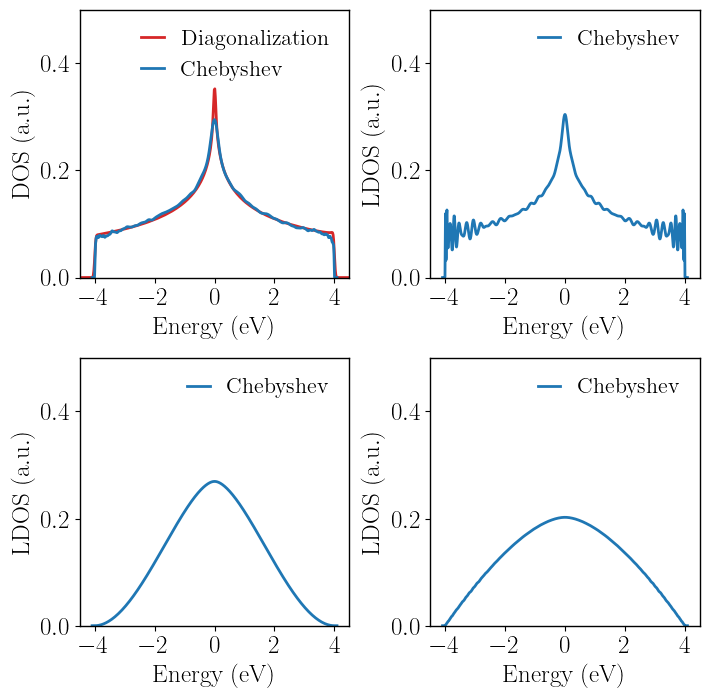

In [ ]:
def main_plot_DOS_square_Chebyshev():
    # 1. Adjust the figure size to fit both plots side-by-side
    fig = plt.figure(figsize=(8, 8))

    # 2. Create the gridspec
    gs_main = gridspec.GridSpec(2, 2, figure=fig, wspace=0.3, hspace=0.3)

    # 3. Create the subplots
    ax1 = fig.add_subplot(gs_main[0, 0])
    ax2 = fig.add_subplot(gs_main[0, 1])
    ax3 = fig.add_subplot(gs_main[1, 0])
    ax4 = fig.add_subplot(gs_main[1, 1])

    """ 4. Calculate and plot """
    """ ============== Density Of States ============== """
    # -------- Define Parameters --------
    num_randomvectors = 100
    num_moments = 150
    # -------- Spectral Rescaling --------
    lattice = get_H_SquareLattice()
    N = 40
    model = pb.Model(lattice, pb.primitive(a1 = N, a2 = N))#, pb.translational_symmetry(a1=True))
    H = model.hamiltonian.toarray() #(order='F')
    # -------- Spectral Rescaling --------
    H_rescaled, E_max, E_min, shift, scale = rescale_hamiltonian(H)
    # -------- Moment Calculation - Stochastic Trace Estimation --------
    mu = np.zeros(num_moments)
    mu = calculate_chebyshev_moments_RandomVector(H_rescaled, num_moments, num_randomvectors)
    #mu = calculate_chebyshev_moments_Trace(H_rescaled, num_moments)
    # -------- Kernel Processing --------
    mu_g = get_kernel(mu, name="jackson")
    # -------- Spectral Function Reconstruction --------
    energies_Square = np.linspace(E_min - 0.1, E_max + 0.1, 1000)
    dos_Square = get_DOS_Chebyshev(mu_g, energies_Square, shift, scale)
    # -------- Plot -------
    plot_DOS_square_Chebyshev(ax1, energies_Square, dos_Square)
    """ ============== Local Density Of States - Site 0 ============== """
    i = N//2
    j = N//2
    orbital_index = (i * N) + j
    # -------- Moment Calculation - Stochastic Trace Estimation --------
    mu = np.zeros(num_moments)
    mu =  calculate_chebyshev_moments_Local(H_rescaled, num_moments, orbital_index)
    # -------- Kernel Processing --------
    mu_g = get_kernel(mu, name="jackson")
    # -------- Spectral Function Reconstruction --------
    energies_Square = np.linspace(E_min - 0.1, E_max + 0.1, 1000)
    dos_Square = get_DOS_Chebyshev(mu_g, energies_Square, shift, scale)
    # -------- Plot -------
    plot_LDOS_square_Chebyshev(ax2, energies_Square, dos_Square)
    """ ============== Local Density Of States - Site 1 ============== """
    i = 0
    j = 0
    orbital_index = (i * N) + j
    # -------- Moment Calculation - Stochastic Trace Estimation --------
    mu = np.zeros(num_moments)
    mu =  calculate_chebyshev_moments_Local(H_rescaled, num_moments, orbital_index)
    # -------- Kernel Processing --------
    mu_g = get_kernel(mu, name="jackson")
    # -------- Spectral Function Reconstruction --------
    energies_Square = np.linspace(E_min - 0.1, E_max + 0.1, 1000)
    dos_Square = get_DOS_Chebyshev(mu_g, energies_Square, shift, scale)
    # -------- Plot -------
    plot_LDOS_square_Chebyshev(ax3, energies_Square, dos_Square)
    """ ============== Local Density Of States - Site 2 ============== """
    i = N//2
    j = 0
    orbital_index = (i * N) + j
    # -------- Moment Calculation - Stochastic Trace Estimation --------
    mu = np.zeros(num_moments)
    mu =  calculate_chebyshev_moments_Local(H_rescaled, num_moments, orbital_index)
    # -------- Kernel Processing --------
    mu_g = get_kernel(mu, name="jackson")
    # -------- Spectral Function Reconstruction --------
    energies_Square = np.linspace(E_min - 0.1, E_max + 0.1, 1000)
    dos_Square = get_DOS_Chebyshev(mu_g, energies_Square, shift, scale)
    # -------- Plot -------
    plot_LDOS_square_Chebyshev(ax4, energies_Square, dos_Square)

    # 5. Closing the boxes (Box Style) in a robust way
    for ax in [ax1, ax2, ax3, ax4]:
        for spine in ax.spines.values():
            spine.set_visible(True)
            spine.set_color('black')
            spine.set_linewidth(1.0) # Makes the border slightly sharper/cleaner
        ax.set_frame_on(True)

    # 6. Finalization
    # tight_layout usually works better than subplots_adjust to prevent label clipping
    plt.tight_layout()
    #plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95,
    #                      hspace=0.4, wspace=0.4)

    plt.show()
    plt.close()

if __name__ == "__main__":
    main_plot_DOS_square_Chebyshev()

<h1 align="center"></h1>

### <center><font color="red">**3. Graphene (honeycomb lattice)**</font></center>
___

<h1 align="center"></h1>


#### <center><font color="orange">**Analytical Approach**</center>
___


**PRIMITIVE LATTICE VECTORS**

Graphene is not a Bravais lattice by itself, but it can be described as a triangular Bravais lattice with a two-atom basis. A convenient choice for the primitive lattice vectors in real space is
$$
\begin{equation}
\mathbf{a}_1 = a \left( \frac{1}{2}, \frac{\sqrt{3}}{2} \right), \qquad
\mathbf{a}_2 = a \left( -\frac{1}{2}, \frac{\sqrt{3}}{2} \right),
\end{equation}
$$
where $a \approx 2.46$ is the lattice constant. These vectors generate a two-dimensional triangular Bravais lattice. Each unit cell contains two carbon atoms, belonging to sublattices $A$ and $B$.

The corresponding primitive vectors in reciprocal space are defined through the
relation
$$
\begin{equation}
\mathbf{a}_i \cdot \mathbf{b}_j = 2\pi \delta_{ij}.
\end{equation}
$$
Solving this condition yields
$$
\begin{equation}
\mathbf{b}_1 = \frac{2\pi}{a} \left( 1, \frac{1}{\sqrt{3}} \right), \qquad
\mathbf{b}_2 = \frac{2\pi}{a} \left( -1, \frac{1}{\sqrt{3}} \right).
\end{equation}
$$
These reciprocal lattice vectors define the hexagonal first Brillouin zone of graphene.

**DEFINING THE LATTICE AND HAMILTONIAN**

In graphene, each carbon atom is connected to three nearest neighbors. If an electron is on sublattice $A$ at position $R_i$, it can hop to three $B$ sites located at
$$
\begin{equation}
\boldsymbol{\delta}_1 = a \left( 0 , \frac{1}{\sqrt{3}} \right), \qquad
\boldsymbol{\delta}_2 = a \left( \frac{1}{2} , -\frac{1}{2\sqrt{3}} \right), \qquad
\boldsymbol{\delta}_3 = a \left( -\frac{1}{2} , -\frac{1}{2\sqrt{3}} \right),
\end{equation}
$$
where $a \approx 2.46\,\text{\AA}$ is the lattice constant. The carbon--carbon distance is
$$
\begin{equation}
a_{cc} = \frac{a}{\sqrt{3}} \approx 1.42.
\end{equation}
$$
The nearest-neighbor tight-binding Hamiltonian is
$$
\begin{equation}
H = -t \sum_{R_i,\boldsymbol{\delta}_j}
\left(
\vert A,R_i\rangle \langle B,R_i + \boldsymbol{\delta}_j\vert + \text{h.c.}
\right).
\end{equation}
$$
**BLOCH ANSATZ**

Because there are two atoms per unit cell, the Bloch wavefunction has two components,
$$
\begin{equation}
\vert \psi_{\mathbf{k}}\rangle =
\begin{pmatrix}
\phi_A(\mathbf{k}) \\
\phi_B(\mathbf{k})
\end{pmatrix}.
\end{equation}
$$
Substituting this ansatz into the Schr\"odinger equation
$$
\begin{equation}
H|\psi_{\mathbf{k}}\rangle = E(\mathbf{k})|\psi_{\mathbf{k}}\rangle
\end{equation}
$$
leads to the $2 \times 2$ eigenvalue problem
$$
\begin{equation}
\begin{pmatrix}
0 & -t f^*(\mathbf{k}) \\
-t f(\mathbf{k}) & 0
\end{pmatrix}
\begin{pmatrix}
\phi_A \\
\phi_B
\end{pmatrix} =
E(\mathbf{k})
\begin{pmatrix}
\phi_A \\
\phi_B
\end{pmatrix},
\end{equation}
$$
where the structure factor is defined as
$$
\begin{equation}
f(\mathbf{k}) = \sum_{j=1}^{3} e^{i \mathbf{k} \cdot \boldsymbol{\delta}_j}.
\end{equation}
$$
**ENERGY SPECTRUM**

The energy eigenvalues are obtained by solving
$$
\begin{equation}
\det(H - E I) = 0,
\end{equation}
$$
which yields
$$
\begin{equation}
E_\pm(\mathbf{k}) = \pm t |f(\mathbf{k})|.
\end{equation}
$$
Using the explicit form of the nearest-neighbor vectors $\boldsymbol{\delta}_j$, the dispersion relation becomes
$$
\color{blue}{
\begin{equation}
E(\mathbf{k}) = \pm t \sqrt{
1 + 4 \cos\!\left( \frac{k_x a}{2} \right)
      \cos\!\left( \frac{\sqrt{3} k_y a}{2} \right) + 4 \cos^2\!\left( \frac{k_x a}{2} \right) }.
\end{equation}}
$$

Equivalently, expressed in terms of the carbon--carbon distance $a_{cc}$,
$$
\begin{equation}
E(\mathbf{k}) = \pm t \sqrt{1 + 4 \cos\!\left( \frac{3 k_x a_{cc}}{2} \right)      \cos\!\left( \frac{\sqrt{3} k_y a_{cc}}{2} \right) + 4 \cos^2\!\left( \frac{\sqrt{3} k_y a_{cc}}{2} \right)}.
\end{equation}$$

In [ ]:
def get_path(n_pts, HS_points):
    """
    Parameters:
        n_pts           : Number of points in each segment, total = len(HS_points) * n_pts
        HS_points       : List of high-symmetry points to form the path (e.g., [Gamma, K, M, Gamma])
    """
    # Generate path segments between consecutive high-symmetry points
    segments = []
    for i in range(len(HS_points) - 1):
        start_point, end_point = HS_points[i], HS_points[i + 1]
        segment = np.linspace(start_point, end_point, n_pts)
        segments.append(segment)

    # Stack all segments to form the full path
    full_path = np.vstack(segments)

    return full_path

In [ ]:
def analytical_BandStructure_Graphene(full_path, eps = 0.0, t = 2.8, a = 0.24595):

    kx = full_path[:, 0]
    ky = full_path[:, 1]

    # Dispersion Relation formula
    # Using a_cc = a / sqrt(3)
    acc = a / np.sqrt(3)

    # The structure factor f(k) magnitude
    #f_k = np.sqrt(3 + 2*np.cos(np.sqrt(3)*ky*acc) +
    #             4*np.cos(np.sqrt(3)*ky*acc/2) * np.cos(3*kx*acc/2))
    #f_k = np.sqrt(1  + 4*np.cos(np.sqrt(3)*kx*acc/2) * np.cos(ky*acc/2) + 4*np.cos(np.sqrt(3)*ky*acc/2)*np.cos(np.sqrt(3)*ky*acc/2))
    f_k = np.sqrt(
        1
        + 4 * np.cos(kx * a / 2) * np.cos(np.sqrt(3) * ky * a / 2)
        + 4 * np.cos(kx * a / 2)**2)

    E_plus_Graphene = t * f_k
    E_minus_Graphene = -t * f_k



    dists = np.sqrt(np.sum(np.diff(full_path, axis=0)**2, axis=1))
    k_axis = np.concatenate(([0], np.cumsum(dists)))

    return k_axis, E_plus_Graphene, E_minus_Graphene

**DENSITY OF STATES (DOS)**

The DOS for graphene also involves the complete elliptic integral of the first kind $(K(k))$, but the piecewise logic is slightly different because yhe band structure is more complex.

For an energy $E$ ( using $|E|$ because the bands are symmetric), the DOS is given by:

The density of states is given by:

$$\color{blue}{{\rm DOS}(E) = \frac{2|E|}{\pi^2 t^2} \frac{1}{\sqrt{F(|E|/t)}} K \left(\frac{4|E|/t}{F(|E|/t)}\right) }$$

where $F(x) = (1+x)^2 - \frac{(x^2 - 1)^2}{4}$ and $K(x) = \int_{0}^{\pi/2} \frac{d\theta}{\sqrt{1 - x^2 \sin^2\theta}}$

- Near $(E=0)$, the DOS simplifies to ${\rm DOS}(E) \approx \frac{2 \pi |E|}{3 t^2},$ which gives graphene its unique semi-metallic properties.  

- At $(E = \pm t)$, one encounters the **Van Hove singularities**, where the DOS diverges logarithmically.

In [ ]:
from scipy.special import ellipk
def analytical_DOS_Graphene(eps = 0.0, t = 2.8, a = 0.24595, eta = 0.05):
    # Energy Range DOS
    E_range_Graphene = np.linspace(-3*t, 3*t, 1000)
    # Analytical DOS (using elliptic integral)
    dos_analytical_Graphene = np.zeros_like(E_range_Graphene)

    for i, E_val in enumerate(E_range_Graphene):
        abs_E = np.abs(E_val)
        x = abs_E / t

        # Evitar divisão por zero no ponto de Dirac
        if abs_E < 1e-6:
            dos_analytical_Graphene[i] = 0
            continue

        if 0 < x < 1:
            # Região abaixo da Singularidade de Van Hove
            F = ((1 + x)**2) - (((x**2 - 1)**2) / 4)
            k_arg = (4 * x) / F  # Usamos k^2 para o ellipk
            dos_analytical_Graphene[i] = (2 * abs_E / (np.pi**2 * t**2 * np.sqrt(3))) * (1 / np.sqrt(F)) * ellipk(k_arg)

        elif 1 <= x < 3:
            # Região acima da Singularidade de Van Hove
            F = ((1 + x)**2) - (((x**2 - 1)**2) / 4)
            k_arg = F / (4 * x)  # O argumento inverte
            dos_analytical_Graphene[i] = (2 * abs_E / (np.pi**2 * t**2 * np.sqrt(3))) * (1 / np.sqrt(4 * x)) * ellipk(k_arg)

        else:
            dos_analytical_Graphene[i] = 0

    return E_range_Graphene, dos_analytical_Graphene

<h1 align="center"></h1>

#### <center><font color="orange">**Exact Diagonalization**</center>
___


Tight-binding modeling via Pybinding

In [ ]:
def get_H_Graphene( onsite = (0, 0)):

  a = 0.24595 #comprimento da celula unitaria (nm)
  a_cc = 0.142 #Distancia interatomica C-C
  t = 2.8

  a1 = a * np.array([1, 0])
  a2 = a * np.array([0.5, 0.5 * np.sqrt(3)])

  lat_Graphene = pb.Lattice(a1=a1, a2=a2)

  lat_Graphene.add_sublattices(
      ("A", [0, -a_cc/2], onsite[0]),
      ("B", [0, a_cc/2], onsite[1])
  )

  lat_Graphene.add_hoppings(
      ([0, 0], "A", "B", -t),
      ([1, -1], "A", "B", -t),
      ([0, -1], "A", "B", -t),
  )
  return lat_Graphene

Plot: Lattice model, unit cell, and first Brillouin zone

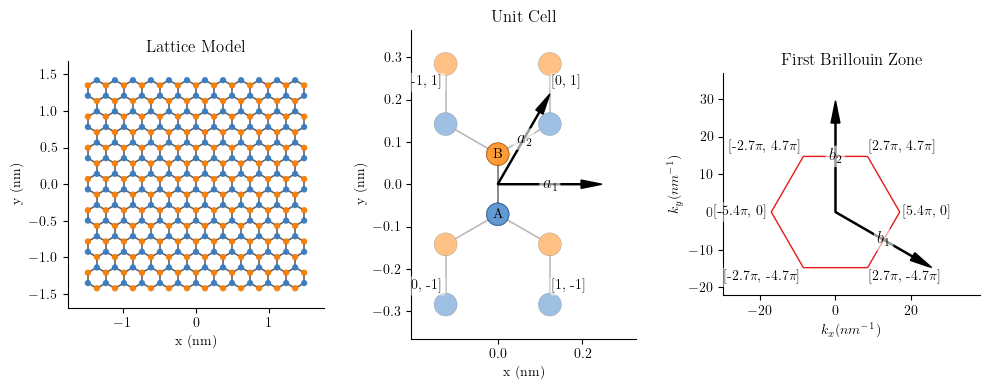

In [ ]:
lat_Graphene = get_H_Graphene()

plot=plt.figure(figsize=(10, 4))

model = pb.Model(lat_Graphene, pb.rectangle(3))
plt.subplot(131, title="Lattice Model")
model.plot(hopping={'width': 2, 'cmap': 'auto'})

plt.subplot(132, title="Unit Cell")
lat_Graphene.plot()

plt.subplot(133, title="First Brillouin Zone ")
lat_Graphene.plot_brillouin_zone()

plt.tight_layout()
plt.show(plot)

Plot: Band structure and Density of Sates

Visualizing a 2D band structure directly as a surface can. be complex. We often plot it along high-symmetry paths in the **2D Brillouin Zone**. For a square lattice, a common path is $Γ → {\rm K} → {\rm M} → Γ$.

-   $Γ: (0,0)$
-   ${\rm K}: (4\pi/3a , 0)$
-   ${\rm M}: (\pi/a, \pi/a\sqrt{3})$

In [ ]:
def plot_BandStructure_graphene(ax, bands_graphene, a = 0.24595):
    bands_graphene.plot(ax=ax, color = "tab:red", lw = 2, label = r'Diagonalization')

    # Analytical--------------------------------------------------------------
    # Custom high-symmetry points:  TOMAS! no analitico tem outros vetores unitarios
    Gamma = np.array([      0,       0])
    K     = np.array([2*np.pi/(3*a), 2*np.pi/(a*np.sqrt(3))])
    M     = np.array([0, 2*np.pi/(a*np.sqrt(3))])
    HS_points = np.array([Gamma, K, M, Gamma])
    full_path = get_path(n_pts=100, HS_points=HS_points)
    k,  E_plus_Graphene, E_minus_Graphene = analytical_BandStructure_Graphene(full_path, eps = 0.0, t = 2.8, a = 0.24595)
    ax.plot(k, E_plus_Graphene, label = r'Analytical', color = "black", lw = 2, linestyle='--')
    ax.plot(k, E_minus_Graphene, color = "black", lw = 2, linestyle='--')
    # ------------------------------------------------------------------------

    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), fontsize=16, loc='best', frameon=False, handlelength=1.0)

    ax.axvline(k[99], color = "black", linewidth = 0.5, linestyle = "--")
    ax.axvline(k[199], color = "black", linewidth = 0.5, linestyle = "--")

    ticks = [k[0], k[99], k[199], k[299]]
    labels = [r'$\Gamma$', r'${\rm K}$', r'${\rm M}$', r'$\Gamma$']
    ax.set_xticks(ticks)
    ax.set_xticklabels(labels, fontsize=18)
    ax.set_xlabel("")

    ax.set_yticks(np.arange(-9, 12.1, 3.0))
    ax.set_ylim(-9.5, 9.5)
    ax.set_ylabel("Energy (eV)", fontsize = 18)
    ax.tick_params(axis='y', labelsize=18)

    return ax

In [ ]:
def plot_DOS_graphene(ax, energies_axis, dos_values, a = 0.24595, t = 2.8):
    ax.plot(dos_values, energies_axis, color="tab:red", lw=2, label="Diagonalization")

    # Analytical -----------------------------------------------------------------------------
    E_range, dos_Chain = analytical_DOS_Graphene(eps = 0.0, t = 2.8, a = 0.24595, eta = 0.001)
    ax.plot(dos_Chain*0.9, E_range, label = r'Analytical', color = "black", lw = 2, linestyle='--')
    # ----------------------------------------------------------------------------------------

    ax.legend(fontsize=16, loc='best', frameon=False, handlelength=1.0)

    ax.set_yticks(np.arange(-9., 10., 3.0))
    ax.set_ylim(-9.5, 9.5)
    ax.tick_params(axis='y', labelsize=18)

    ax.set_xticks(np.arange(0, 1.5, 0.1))
    ax.set_xlim(0, 0.25)
    ax.tick_params(axis='x', labelsize=18)
    ax.set_xlabel(r"DOS $({\rm a.u.})$", fontsize = 18)

    return ax

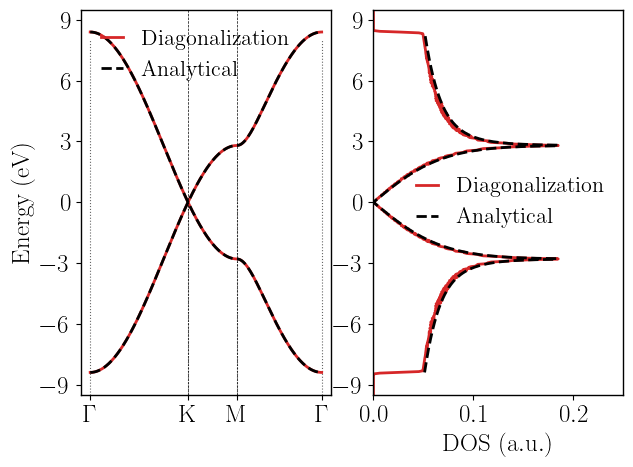

In [ ]:
def main_plot_BandStructure_Analytical_vs_Diagonalization():
    # 1. Adjust the figure size to fit both plots side-by-side
    fig = plt.figure(figsize=(7, 5))

    # 2. Create the gridspec
    gs_main = gridspec.GridSpec(1, 2, figure=fig, wspace=0.17)

    # 3. Create the subplots
    ax1 = fig.add_subplot(gs_main[0, 0])
    ax2 = fig.add_subplot(gs_main[0, 1])

    # 4. Calculate
    """ BAND STRUCTURE: """
    # Model initializatio
    lat_Graphene = get_H_Graphene()
    # Bulk symmetry application
    model_Graphene = pb.Model(lat_Graphene, pb.translational_symmetry(a1=True, a2=True))
    # Band structure solver initialization (numerical diagonalization of the Hamiltonian)
    solver_Graphene = pb.solver.lapack(model_Graphene)  # Solver: This uses LAPACK to diagonalize the Hamiltonian matrix for each k_point
    # Define the k-path
    a = 0.24595
    Gamma = np.array([      0,       0])
    X     = np.array([4*np.pi/(3*a),       0])
    M     = np.array([np.pi/a, np.pi/(a*np.sqrt(3))])
    bands_Graphene = solver_Graphene.calc_bands(Gamma, X, M, Gamma)
    # Plot
    plot_BandStructure_graphene(ax1, bands_Graphene)
    """ DENSITY OF STATES: """
    # Definir Vetores da Rede Recíproca
    b1 = (2 * np.pi / a) * np.array([1., -1./3.])
    b2 = (2 * np.pi / a) * np.array([0, 2/np.sqrt(3)])
    grid_size = 150
    vals = np.linspace(0, 1, grid_size, endpoint=False)
    # Solving Hamiltonian
    all_energies = []
    for u in vals:
        for v in vals:
            # k = u*b1 + v*b2 (Garante cobertura total da 1BZ hexagonal)
            kx, ky = u * b1 + v * b2
            # calculates the energy levels (dispersion relation E(k)) for that k
            solver_Graphene.set_wave_vector([kx, ky])
            all_energies.append(solver_Graphene.eigenvalues)
    # Flattening the Data:
    # The previous step created a list of arrays (one array of energies for each k).
    # This line collapses them into one long 1D list of every energy level found across the entire zone.
    all_energies = np.array(all_energies).flatten()
    # Setting the Energy Axis
    energies_axis = np.linspace(-9.5, 9.5, 500)
    # A smaller value gives sharper peaks; a larger value makes the graph smoother
    broadening = 0.03
    # The Gaussian "Smearing" Logic
    # Criamos uma matriz de diferenças para evitar loops lentos
    # (E - E_n)^2
    diff_sq = (energies_axis[:, np.newaxis] - all_energies[np.newaxis, :])**2
    # Soma das gaussianas: exp(-0.5 * diff^2 / sigma^2)
    dos_values = np.sum(np.exp(-0.5 * diff_sq / broadening**2), axis=1)
    # Normalization
    dos_values /= (broadening * np.sqrt(2 * np.pi) * len(all_energies))
    # Plot
    plot_DOS_graphene(ax2, energies_axis, dos_values)

    # 5. Closing the boxes (Box Style) in a robust way
    for ax in [ax1, ax2]:
        for spine in ax.spines.values():
            spine.set_visible(True)
            spine.set_color('black')
            spine.set_linewidth(1.0) # Makes the border slightly sharper/cleaner
        ax.set_frame_on(True)

    # 6. Finalization
    # tight_layout usually works better than subplots_adjust to prevent label clipping
    plt.tight_layout()
    #plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95,
    #                      hspace=0.4, wspace=0.4)

    plt.show()
    plt.close()

    return energies_axis, dos_values

if __name__ == "__main__":
    energies_axis, dos_values = main_plot_BandStructure_Analytical_vs_Diagonalization()

<h1 align="center"></h1>


#### <center><font color="orange">**Chebyshev Expansion**</center>
___


In [ ]:
def plot_DOS_graphene_Chebyshev(ax, energies_Graphene, dos_Graphene):
    # Diagonalization ----------------------------------------------------------------
    ax.plot(energies_axis, dos_values, color="tab:red", lw=2, label="Diagonalization")
    # --------------------------------------------------------------------------------
    ax.plot(energies_Graphene, dos_Graphene, color="tab:blue", lw=2, label="Chebyshev")
    ax.legend(fontsize=16, loc='best', frameon=False, handlelength=1.0)

    ax.set_xticks(np.arange(-9., 15., 3.0))
    ax.set_xlim(-9.5, 9.5)
    ax.tick_params(axis='x', labelsize=18)
    ax.set_xlabel(r"Energy (eV)", fontsize = 18)

    ax.set_yticks(np.arange(0, 1.5, 0.1))
    ax.set_ylim(0, 0.25)
    ax.tick_params(axis='y', labelsize=18)
    ax.set_ylabel(r"DOS $({\rm a.u.})$", fontsize = 18)

    return ax

In [ ]:
def plot_LDOS_graphene_Chebyshev(ax, energies_Graphene, ldos_Graphene):
    ax.plot(energies_Graphene, ldos_Graphene, color="tab:blue", lw=2, label="Chebyshev")
    ax.legend(fontsize=16, loc='best', frameon=False, handlelength=1.0)

    ax.set_xticks(np.arange(-9., 15.5, 3.0))
    ax.set_xlim(-9.5, 9.5)
    ax.tick_params(axis='x', labelsize=18)
    ax.set_xlabel(r"Energy (eV)", fontsize = 18)

    ax.set_yticks(np.arange(0, 2.5, 0.1))
    ax.set_ylim(0, 0.25)
    ax.tick_params(axis='y', labelsize=18)
    ax.set_ylabel(r"LDOS $({\rm a.u.})$", fontsize = 18)

    #texto = r"Site = 2"
    #ax.text(-0.7, 0.4, texto, fontsize=15, fontweight='bold', color="tab:red")

    return ax

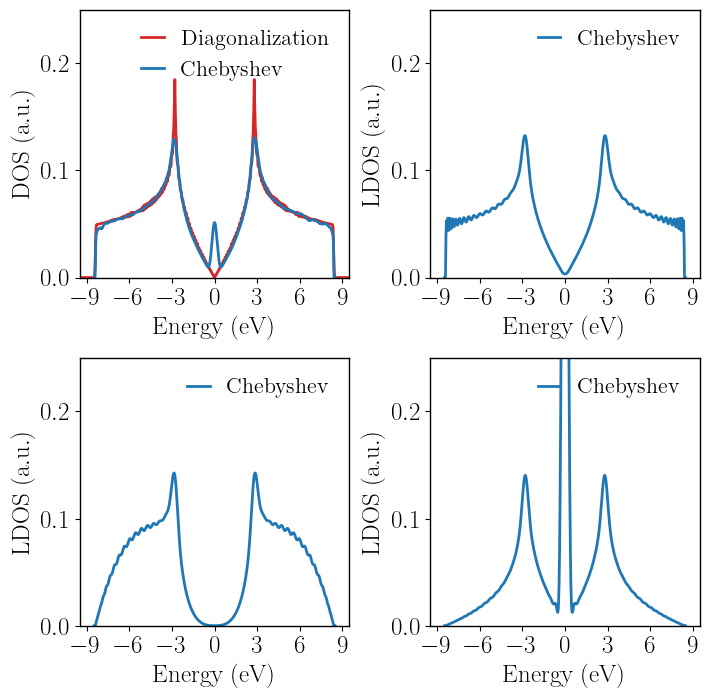

In [ ]:
def main_plot_DOS_graphene_Chebyshev():
    # 1. Adjust the figure size to fit both plots side-by-side
    fig = plt.figure(figsize=(8, 8))

    # 2. Create the gridspec
    gs_main = gridspec.GridSpec(2, 2, figure=fig, wspace=0.3, hspace=0.3)

    # 3. Create the subplots
    ax1 = fig.add_subplot(gs_main[0, 0])
    ax2 = fig.add_subplot(gs_main[0, 1])
    ax3 = fig.add_subplot(gs_main[1, 0])
    ax4 = fig.add_subplot(gs_main[1, 1])

    """ 4. Calculate and plot """
    """ ============== Density Of States ============== """
    # -------- Define Parameters --------
    num_randomvectors = 100
    num_moments = 150
    # -------- Spectral Rescaling --------
    lattice = get_H_Graphene()
    N = 40
    model = pb.Model(lattice, pb.primitive(a1 = N, a2 = N))#, pb.translational_symmetry(a1=True))
    H = model.hamiltonian.toarray() #(order='F')
    # -------- Spectral Rescaling --------
    H_rescaled, E_max, E_min, shift, scale = rescale_hamiltonian(H)
    # -------- Moment Calculation - Stochastic Trace Estimation --------
    mu = np.zeros(num_moments)
    mu = calculate_chebyshev_moments_RandomVector(H_rescaled, num_moments, num_randomvectors)
    #mu = calculate_chebyshev_moments_Trace(H_rescaled, num_moments)
    # -------- Kernel Processing --------
    mu_g = get_kernel(mu, name="jackson")
    # -------- Spectral Function Reconstruction --------
    energies_Graphene = np.linspace(E_min - 0.1, E_max + 0.1, 1000)
    dos_Graphene = get_DOS_Chebyshev(mu_g, energies_Graphene, shift, scale)
    # -------- Plot -------
    plot_DOS_graphene_Chebyshev(ax1, energies_Graphene, dos_Graphene)
    """ ============== Local Density Of States - Site 0 ============== """
    i = N//2
    j = N//2
    orbital_index = (i * N) + j
    # -------- Moment Calculation - Stochastic Trace Estimation --------
    mu = np.zeros(num_moments)
    mu =  calculate_chebyshev_moments_Local(H_rescaled, num_moments, orbital_index)
    # -------- Kernel Processing --------
    mu_g = get_kernel(mu, name="jackson")
    # -------- Spectral Function Reconstruction --------
    energies_Graphene = np.linspace(E_min - 0.1, E_max + 0.1, 1000)
    dos_Graphene = get_DOS_Chebyshev(mu_g, energies_Graphene, shift, scale)
    # -------- Plot -------
    plot_LDOS_graphene_Chebyshev(ax2, energies_Graphene, dos_Graphene)
    """ ============== Local Density Of States - Site 1 ============== """
    i = N//2
    j = 0
    orbital_index = (i * N) + j
    # -------- Moment Calculation - Stochastic Trace Estimation --------
    mu = np.zeros(num_moments)
    mu =  calculate_chebyshev_moments_Local(H_rescaled, num_moments, orbital_index)
    # -------- Kernel Processing --------
    mu_g = get_kernel(mu, name="jackson")
    # -------- Spectral Function Reconstruction --------
    energies_Graphene = np.linspace(E_min - 0.1, E_max + 0.1, 1000)
    dos_Graphene = get_DOS_Chebyshev(mu_g, energies_Graphene, shift, scale)
    # -------- Plot -------
    plot_LDOS_graphene_Chebyshev(ax3, energies_Graphene, dos_Graphene)
    """ ============== Local Density Of States - Site 2 ============== """
    i = 0
    j = N//2
    orbital_index = (i * N) + j
    # -------- Moment Calculation - Stochastic Trace Estimation --------
    mu = np.zeros(num_moments)
    mu =  calculate_chebyshev_moments_Local(H_rescaled, num_moments, orbital_index)
    # -------- Kernel Processing --------
    mu_g = get_kernel(mu, name="jackson")
    # -------- Spectral Function Reconstruction --------
    energies_Graphene = np.linspace(E_min - 0.1, E_max + 0.1, 1000)
    dos_Graphene = get_DOS_Chebyshev(mu_g, energies_Graphene, shift, scale)
    # -------- Plot -------
    plot_LDOS_graphene_Chebyshev(ax4, energies_Graphene, dos_Graphene)

    # 5. Closing the boxes (Box Style) in a robust way
    for ax in [ax1, ax2, ax3, ax4]:
        for spine in ax.spines.values():
            spine.set_visible(True)
            spine.set_color('black')
            spine.set_linewidth(1.0) # Makes the border slightly sharper/cleaner
        ax.set_frame_on(True)

    # 6. Finalization
    # tight_layout usually works better than subplots_adjust to prevent label clipping
    plt.tight_layout()
    #plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95,
    #                      hspace=0.4, wspace=0.4)

    plt.show()
    plt.close()

if __name__ == "__main__":
    main_plot_DOS_graphene_Chebyshev()

<h1 align="center"></h1>

### <center><font color="red">**4. SSH model**</font></center>
___

<h1 align="center"></h1>


#### <center><font color="orange">**Analytical Approach**</center>
___


##### **INFINITE CASE**

The SSH model descbribes a 1D polymer (like polycetylene) where the hopping amplitudo alternates between "intracell" and "intercell" neighbors. This is the dimerization splits the single band of a 1D chain into two.

**DEFINING THE LATTICE AND HAMILTONIAN**

We consider a chain with two sublattices, **A** and **B**. The unit cell $n$ contains one **A** atom and one **B** atom.

-  $v$ (**Intracell hopping**): Between **A** and **B** whithin the same cell.
-  $w$ (**Intercell hopping**): Between **B** of cell $n$ and **A** of cell $n + 1$.

The Tight-Binding Hamiltonian is:

$$H = \sum_{n}(v|n, A\rangle \langle n,B| + w|n, B\rangle \langle n + 1, A| + h.c)$$

**THE BLOCH ANSATZ (Two-Component)**

Because there are two atoms per unit cell, the wavefunction is a vector in the basis $(|A\rangle , |B\rangle )^T$:

$$|\psi_k\rangle = \sum_{n}\frac{e^{ikna}}{\sqrt{N}} \begin{pmatrix} \phi_A(\mathbf{k}) \\ \phi_B(\mathbf{k}) \end{pmatrix} |n\rangle$$

Where $a$ is the distance between init cells.

**THE MOMENTUM SPACE HAMILTONIAN $H(k)$**

By substituting the Bloch Ansatz into the Schrödinger equation $H|\psi_k\rangle = E(k)|\psi_k\rangle$ and performing a Fourier transform, the Hamiltonian reduces to a $2 \times 2$ matrix for each $k$:

$$H(k) = \begin{pmatrix} 0 & v + we^{-ika}\\ v + we^{ika} & 0 \end{pmatrix}$$

We often write this in terms of the Pauli matrices $\sigma_x$ and $\sigma_y$:

$$H(k) = d_x(k)\sigma_x + d_y(k)\sigma_y$$

Where:

-  $d_x(k) = v + w cos(ka)$
-  $d_y(k) = w sin(ka)$

**SOLVING FOR ENERGY $E(k)$**

The eigenvalues are found by solving the characteristic equation $det(H(k) - E(k)I) = 0$:

$$E_\pm(k) = \pm|v + we^{-ika}|$$

Expanding the absolute value:

$$E_\pm(k) = \pm\sqrt{(v + w \cos(ka))^{2} + (w \sin(ka))^{2}}$$

$$\color{blue}{E_\pm(k) = \pm\sqrt{(v^{2} + w^{2} + 2vw \cos(ka)}}$$

-  **Band Gap:** Unlike the uniform 1D chain, a gap of $2|v - w|$ opens at the Brillouin Zone boundaries $(k = \pm \pi/a)$.


In [ ]:
def analytical_infinite_band_structure_SSH(v, w, a = 1.0):
    k = np.linspace(-np.pi / a, np.pi / a, 500)
    argument = v**2 + w**2 + 2 * v * w * np.cos(k * a)
    E_plus = np.sqrt(np.maximum(argument, 0))
    E_minus = -E_plus
    return k, E_plus, E_minus

**DENSITY OF STATES (DOS)**

The Density of States in the SSH model reflects its dimerized nature. Unlike the simple 1D chain, which has a single band and two singularities, the SSH model features **two bands** separated by a gap, resulting in four **Van Hove singularities**.

- **Mathematical Derivation**

The DOS is defined as ${\rm DOS}(E) = \frac{1}{\pi}\frac{1}{|dE/dk|}$. We start from the dispersion relation:

$$E^2 = v^2 + w^2 + 2vw \cos(ka)$$

Differentiating both sides with respect to k:

$$2E\frac{dE}{dk} = -2vwa \sin(ka)$$

$$|dE/dk| = \frac{vwa|\sin(ka)|}{|E|}$$

Using the identity $\sin(ka) = \sqrt{1 - \cos^2(ka)}$ and substituting $\cos(ka) = \frac{E^2 - (v^2 + w^2)}{2vw}$, we obtain the analytical expression for the DOS:

$$\color{blue}{{\rm DOS}(E) = \frac{1}{\pi a}\frac{2|E|}{\sqrt{[E^2 - (v - w)^2] \left[ (v + w)^2 - E^2\right] }}}$$

-  **The Band Gap**: The expression inside the square root must be positive. This restricts the allowed energies to:
$$|v - w| ≤ |E| ≤ |v + w|$$
The region between $-|v-w|$ and $+|v-w|$ is the energy gap, where ${\rm DOS}(E)=0$.

-  **Four Van Hove Singularities**: In 1D, singularities occur where the band is "flat" $(dE/dk = 0)$. For the SSH model, this happens at:

    -  **The Band Edges**: $E = \pm(v + w)(at \\ k = 0)$
    -  **The Gap Edges**: $E = \pm(v - w)(at \\ k = \pm \pi/a)$. At these four point, the denominator of ${\rm DOS}(E)$ goes to zero, causing the DOS to diverge to infinity.

- **Symmetry**: Because of the **Chiral Symmetry** of the SSH Hamiltonian, the DOS is perfectly symmetric around $E = 0: {\rm DOS}(E) = {\rm DOS}(-E)$.



In [ ]:
def analytical_infinite_DOS_SSH(v, w, a=1.0, eta=0.02):
    # Energy Range DOS
    limit = (v + w) * 1.5
    E_range = np.linspace(-limit, limit, 1000)

    # 2. Use the complex energy z = E + i*eta
    z = E_range + 1j * eta

    # 3. Analytical expression for the SSH DOS:
    # g(E) ~ Im [ 2z / sqrt((z^2 - (v-w)^2) * (z^2 - (v+w)^2)) ]
    # We take the absolute value of the imaginary part to ensure g(E) > 0
    term_gap = z**2 - (v - w)**2
    term_outer = z**2 - (v + w)**2

    # The factor 1/pi is the standard normalization for DOS
    dos_SSH = np.abs(np.imag( (2 * z) / np.sqrt(term_gap * term_outer) )) * (1.0 / (a * np.pi))

    return E_range, dos_SSH

##### **FINITE CASE**

**FINITE CHAIN AND THE REAL-SPACE PERSPECTIVE**

While the Bloch Ansatz describes an infinite periodic system, real polymers have ends. In a finite chain with $N$ unit cells (a total of $2N$ lattice sites), translational symmetry is broken, and momentum $k$ is no longer a good quantum number. In this case, the SSH Hamiltonian must be written and solved directly in real space.

**A. Real-Space Hamiltonian Matrix**

We consider an open chain with $N$ unit cells. In the basis $|1,A\rangle, |1,B\rangle, |2,A\rangle, |2,B\rangle, \dots, |N,A\rangle, |N,B\rangle$ the Hamiltonian becomes a $2N \times 2N$ matrix.

The intracell hopping $v$ couples $|n,A\rangle$ to $|n,B\rangle$, while the intercell hopping $w$ couples $|n,B\rangle$ to $|n+1,A\rangle$. The resulting Hamiltonian matrix has a tridiagonal structure:

$$H =
\begin{pmatrix}
0 & v & 0 & 0 & \cdots & 0 \\
v & 0 & w & 0 & \cdots & 0 \\
0 & w & 0 & v & \cdots & 0 \\
0 & 0 & v & 0 & \cdots & 0 \\
\vdots & \vdots & \vdots & \vdots & \ddots & w \\
0 & 0 & 0 & 0 & w & 0
\end{pmatrix}.$$

Numerical diagonalization of this matrix shows how the continuous energy bands $E_\pm(k)$ of the infinite system become discretized into $2N$ individual energy levels in the finite chain.

-  **Topology:** The model is famous for its topological phases:

    -  If $v > w$: The system is in the **trivial phase** (dimers are within the cell).
    -  If $v < w$: The system is in the **topological phase**, leading to protected edge states in a finite chain.

**B. Emergence of Topological Edge States**

The most important qualitative difference from the infinite model appears in the **topological phase** ($v < w$):

- **Bulk States:** $2N - 2$ eigenstates lie within the energy bands defined by $E_\pm(k)$.
- **Edge States:** Exactly two states appear with energies $E \approx 0$, located in the middle of the band gap.

Physically, when $v < w$, the strong intercell hopping leaves the boundary sites $|1,A\rangle$ and $|N,B\rangle$ effectively unpaired. These sites host localized states that do not exist in the trivial phase.

**C. Localization and Bulk-Boundary Correspondence**

These zero-energy modes are called **edge states** because their probability density $|\psi_n|^2$ is exponentially localized at the ends of the chain.

This behavior is a direct manifestation of the **bulk-boundary correspondence**: the topological property of the infinite system (the winding of the vector $\mathbf{d}(k)$ in momentum space) guarantees the existence of protected boundary states in a finite system.

**D. Numerical Comparison: Infinite vs. Finite Chains**

By comparing the analytical band structure of the infinite chain with the discrete spectrum of a finite chain, we observe:

- **Convergence:** As $N \rightarrow \infty$, the discrete energy levels densely fill the curves $E_\pm(k)$.
- **Stability:** The band gap $2|v - w|$ is the same in both descriptions.
- **Phase Distinction:** In the trivial phase ($v > w$), the gap contains no states. In the topological phase ($v < w$), the gap always contains two mid-gap edge states, independent of system size.


In [ ]:
def analytical_finite_band_structure_SSH(N, v, w):
    H = np.zeros((2 * N, 2 * N))
    for i in range(N):
        # Intracell v
        H[2*i, 2*i+1] = v
        H[2*i+1, 2*i] = v
        # Intercell w
        if i < N - 1:
            H[2*i+1, 2*i+2] = w
            H[2*i+2, 2*i+1] = w
    energies = np.linalg.eigvalsh(H)
    return energies

<h1 align="center"></h1>

#### <center><font color="orange">**Exact Diagonalization**</center>
___


Tight-binding modeling via Pybinding for Chain of Atoms

In [ ]:
def get_H_SSH(v, w):
    """
    Constrói a rede e o Hamiltoniano do modelo SSH.
    v: hopping intracelular (dentro da célula unitária)
    w: hopping intercelular (entre células adjacentes)
    """
    a = 1.0  # Comprimento da célula unitária (distância entre pares de dimeros)

    # 1. Definir os Vetores Primitivos (1D)
    a1 = a * np.array([1])

    lat_SSH = pb.Lattice(a1=a1)

    # 2. Adicionar Sub-redes (Atomos A e B)
    # Colocamos o A em -x/4 e o B em +x/4 para ficarem centrados na célula
    lat_SSH.add_sublattices(
        #("A", [-a/4], 0),  # Posição relativa e energia onsite (0)
        #("B", [ a/4], 0)   # Posição relativa e energia onsite (0)
        ("A", [-a/4], 0),  # Posição relativa e energia onsite (0)
        ("B", [ a/4], 0)   # Posição relativa e energia onsite (0)
    )

    # 3. Adicionar Hoppings
    lat_SSH.add_hoppings(
        # Hopping Intracelular (v): Conecta A e B na MESMA célula ([0])
        ([0], "A", "B", -v),

        # Hopping Intercelular (w): Conecta B da célula n ao A da célula n+1 ([1])
        ([1], "B", "A", -w)
    )

    return lat_SSH

Plot: Lattice model, unit cell, and first Brillouin zone

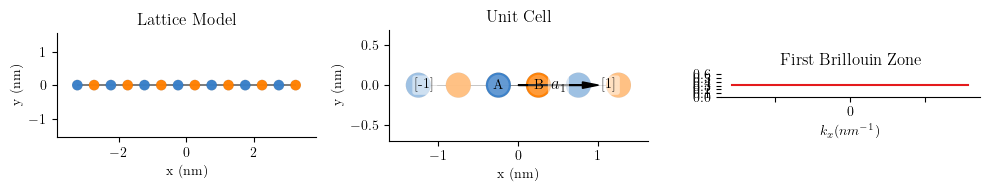

In [ ]:
lat_SSH = get_H_SSH(v=1.0, w=0.6)

plot=plt.figure(figsize=(10., 3))

model = pb.Model(lat_SSH, pb.rectangle(7))
plt.subplot(131, title="Lattice Model")
model.plot(hopping={'width': 2, 'cmap': 'auto'})

plt.subplot(132, title="Unit Cell")
lat_SSH.plot()

plt.subplot(133, title="First Brillouin Zone ")
lat_SSH.plot_brillouin_zone()

plt.tight_layout()
plt.show(plot)

Plot: Band structure and Density of Sates

In [ ]:
def plot_BandStructure_SSH(ax, bands_SSH, mode, v, w, a =1.0, Natom=None):
    bands_SSH.plot(ax=ax, color = "tab:red", lw = 2, label = r'Diagonalization')

    # Analytical--------------------------------------------------------------
    if mode == "finite":
        N = Natom
        Ener = analytical_finite_band_structure_SSH(N, v, w)
        for i in range(len(Ener)):
            ax.axhline(Ener[i], color="black", linewidth=2, linestyle="--", label = r'Analytical')
    elif mode == "infinite":
        k, E_plus, E_minus = analytical_infinite_band_structure_SSH(v, w, a)
        ax.plot(k, E_plus, label = r'Analytical', color = "black", lw = 2, linestyle='--')
        ax.plot(k, E_minus, color = "black", lw = 2, linestyle='--')
    # ------------------------------------------------------------------------

    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), fontsize=16, loc='best', frameon=False, handlelength=1.0)

    ax.axhline(0, color = "black", linewidth = 0.5, linestyle = "--")
    ax.axvline(0, color = "black", linewidth = 0.5, linestyle = "--")

    ticks = [-np.pi/a, 0., np.pi/a]
    labels = [r'$-\pi/a$', r'0', r'$\pi/a$']
    ax.set_xticks(ticks)
    ax.set_xticklabels(labels, fontsize=18)
    ax.set_xlabel(r"$k$ $({\rm nm}^{-1})$", fontsize = 18)
    ax.set_yticks(np.arange(-2, 2.1, 1.0))
    ax.set_ylim(-2.0, 2.0)
    ax.set_ylabel("Energy (eV)", fontsize = 18)
    ax.tick_params(axis='y', labelsize=18)

    return ax

In [ ]:
def plot_DOS_SSH(ax, energies_axis, dos_values, mode, v, w, a = 1.0, Natom=None):
    ax.plot(dos_values, energies_axis, color="tab:red", lw=2, label="Diagonalization")

    # Analytical--------------------------------------------------------------
    if mode == "finite":
        N = Natom
        Ener = analytical_finite_band_structure_SSH(N, v, w)
        for i in range(len(Ener)):
            ax.axhline(Ener[i], color="black", linewidth=2, linestyle="--", label = r'Analytical')
    elif mode == "infinite":
        E_range, dos_SSH = analytical_infinite_DOS_SSH(v, w, a, eta=0.001)
        ax.plot(dos_SSH, E_range, label = r'Analytical', color = "black", lw = 2, linestyle='--')
    # ------------------------------------------------------------------------

    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), fontsize=16, loc='best', frameon=False, handlelength=1.0)

    ax.set_yticks(np.arange(-2., 5., 1.0))
    ax.set_ylim(-2.0, 2.0)
    ax.tick_params(axis='y', labelsize=18)

    ax.set_xticks(np.arange(0, 2.5, 1.))
    ax.set_xlim(0, 2.)
    ax.tick_params(axis='x', labelsize=18)
    ax.set_xlabel(r"DOS $({\rm a.u.})$", fontsize = 18)

    return ax

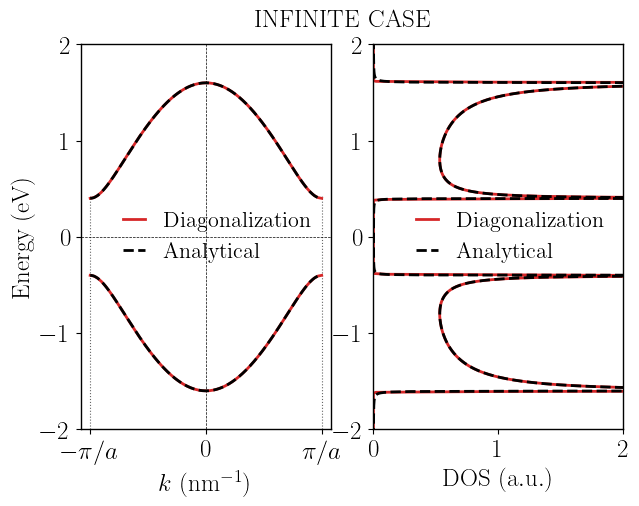

In [ ]:
def main_plot_BandStructure_Analytical_vs_Diagonalization():
    # 1. Adjust the figure size to fit both plots side-by-side
    fig = plt.figure(figsize=(7, 5))

    # 2. Create the gridspec
    gs_main = gridspec.GridSpec(1, 2, figure=fig, wspace=0.17)

    # 3. Create the subplots
    ax1 = fig.add_subplot(gs_main[0, 0])
    ax2 = fig.add_subplot(gs_main[0, 1])

    # 4. Calculate
    v = 1.0
    w = 0.6
    """ BAND STRUCTURE: """
    # Model initializatio
    lat_SSH = get_H_SSH(v, w)
    # Bulk symmetry application
    model_SSH = pb.Model(lat_SSH, pb.translational_symmetry(1))
    # Band structure solver initialization (numerical diagonalization of the Hamiltonian)
    solver_SSH = pb.solver.lapack(model_SSH)  # Solver: This uses LAPACK to diagonalize the Hamiltonian matrix for each k_point
    # Define the k-path from -pi/a to +pi/a
    bands_SSH = solver_SSH.calc_bands(-np.pi , np.pi)
    # Plot
    plot_BandStructure_SSH(ax1, bands_SSH, "infinite", v, w)
    """ DENSITY OF STATES: """
    # Sampling the Brillouin Zone
    k_points = np.linspace(-np.pi , np.pi, 1000)
    # Solving Hamiltonian
    all_energies = []
    for k in k_points:
        # calculates the energy levels (dispersion relation E(k)) for that k.
        solver_SSH.set_wave_vector(k) # Move para o ponto k específico
        all_energies.append(solver_SSH.eigenvalues) # Coleta os autovalores
    # Flattening the Data:
    # The previous step created a list of arrays (one array of energies for each k).
    # This line collapses them into one long 1D list of every energy level found across the entire zone.
    all_energies = np.array(all_energies).flatten()
    # Setting the Energy Axis
    energies_axis = np.linspace(-2.0, 2.0, 500)
    # A smaller value gives sharper peaks; a larger value makes the graph smoother
    broadening = 0.005
    # The Gaussian "Smearing" Logic
    # Criamos uma matriz de diferenças para evitar loops lentos
    # (E - E_n)^2
    diff_sq = (energies_axis[:, np.newaxis] - all_energies[np.newaxis, :])**2
    # Soma das gaussianas: exp(-0.5 * diff^2 / sigma^2)
    dos_values = np.sum(np.exp(-0.5 * diff_sq / broadening**2), axis=1)
    # Normalization
    dos_values /= (broadening * np.sqrt(2 * np.pi) * len(k_points))
    # Plot
    plot_DOS_SSH(ax2, energies_axis, dos_values, "infinite", v, w)

    fig.suptitle(r"INFINITE CASE", fontsize=18, fontweight=900, y=0.95)

    # 5. Closing the boxes (Box Style) in a robust way
    for ax in [ax1, ax2]:
        for spine in ax.spines.values():
            spine.set_visible(True)
            spine.set_color('black')
            spine.set_linewidth(1.0) # Makes the border slightly sharper/cleaner
        ax.set_frame_on(True)

    # 6. Finalization
    # tight_layout usually works better than subplots_adjust to prevent label clipping
    plt.tight_layout()
    #plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95,
    #                      hspace=0.4, wspace=0.4)

    plt.show()
    plt.close()

    return energies_axis, dos_values

if __name__ == "__main__":
    energies_axis, dos_values = main_plot_BandStructure_Analytical_vs_Diagonalization()

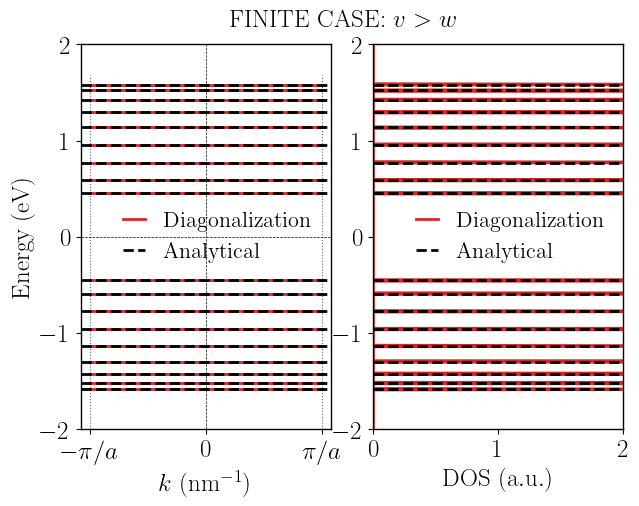

In [ ]:
def main_plot_BandStructure_Analytical_vs_Diagonalization():
    # 1. Adjust the figure size to fit both plots side-by-side
    fig = plt.figure(figsize=(7, 5))

    # 2. Create the gridspec
    gs_main = gridspec.GridSpec(1, 2, figure=fig, wspace=0.17)

    # 3. Create the subplots
    ax1 = fig.add_subplot(gs_main[0, 0])
    ax2 = fig.add_subplot(gs_main[0, 1])

    # 4. Calculate
    v = 1.0
    w = 0.6
    Natom = 9
    """ BAND STRUCTURE: """
    # Model initializatio
    lat_SSH = get_H_SSH(v, w)
    # Bulk symmetry application
    model_SSH = pb.Model(lat_SSH, pb.primitive(Natom))
    # Band structure solver initialization (numerical diagonalization of the Hamiltonian)
    solver_SSH = pb.solver.lapack(model_SSH)  # Solver: This uses LAPACK to diagonalize the Hamiltonian matrix for each k_point
    # Define the k-path from -pi/a to +pi/a
    bands_SSH = solver_SSH.calc_bands(-np.pi , np.pi)
    # Plot
    plot_BandStructure_SSH(ax1, bands_SSH, "finite", v, w, Natom=Natom)
    """ DENSITY OF STATES: """
    # Sampling the Brillouin Zone
    k_points = np.linspace(-np.pi , np.pi, 1000)
    # Solving Hamiltonian
    all_energies = []
    for k in k_points:
        # calculates the energy levels (dispersion relation E(k)) for that k.
        solver_SSH.set_wave_vector(k) # Move para o ponto k específico
        all_energies.append(solver_SSH.eigenvalues) # Coleta os autovalores
    # Flattening the Data:
    # The previous step created a list of arrays (one array of energies for each k).
    # This line collapses them into one long 1D list of every energy level found across the entire zone.
    all_energies = np.array(all_energies).flatten()
    # Setting the Energy Axis
    energies_axis = np.linspace(-2.0, 2.0, 500)
    # A smaller value gives sharper peaks; a larger value makes the graph smoother
    broadening = 0.001
    # The Gaussian "Smearing" Logic
    # Criamos uma matriz de diferenças para evitar loops lentos
    # (E - E_n)^2
    diff_sq = (energies_axis[:, np.newaxis] - all_energies[np.newaxis, :])**2
    # Soma das gaussianas: exp(-0.5 * diff^2 / sigma^2)
    dos_values = np.sum(np.exp(-0.5 * diff_sq / broadening**2), axis=1)
    # Normalization
    dos_values /= (broadening * np.sqrt(2 * np.pi) * len(k_points))
    # Plot
    plot_DOS_SSH(ax2, energies_axis, dos_values, "finite", v, w, Natom=Natom)

    fig.suptitle(r"FINITE CASE: $v>w$", fontsize=18, fontweight=900, y=0.95)

    # 5. Closing the boxes (Box Style) in a robust way
    for ax in [ax1, ax2]:
        for spine in ax.spines.values():
            spine.set_visible(True)
            spine.set_color('black')
            spine.set_linewidth(1.0) # Makes the border slightly sharper/cleaner
        ax.set_frame_on(True)

    # 6. Finalization
    # tight_layout usually works better than subplots_adjust to prevent label clipping
    plt.tight_layout()
    #plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95,
    #                      hspace=0.4, wspace=0.4)

    plt.show()
    plt.close()

    return energies_axis, dos_values

if __name__ == "__main__":
    energies_axis_v, dos_values_v = main_plot_BandStructure_Analytical_vs_Diagonalization()

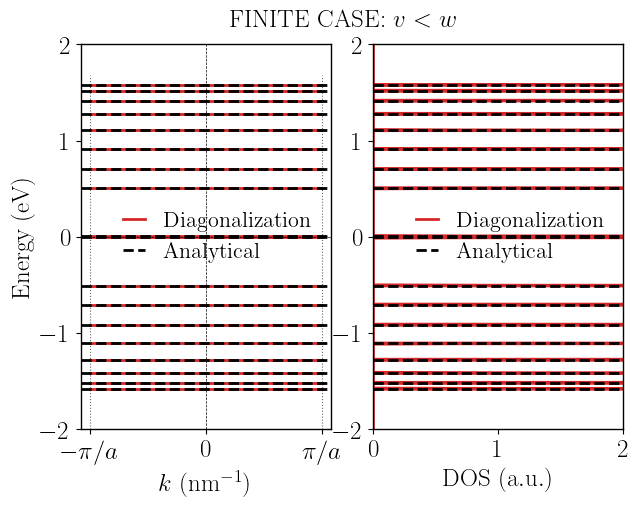

In [ ]:
def main_plot_BandStructure_Analytical_vs_Diagonalization():
    # 1. Adjust the figure size to fit both plots side-by-side
    fig = plt.figure(figsize=(7, 5))

    # 2. Create the gridspec
    gs_main = gridspec.GridSpec(1, 2, figure=fig, wspace=0.17)

    # 3. Create the subplots
    ax1 = fig.add_subplot(gs_main[0, 0])
    ax2 = fig.add_subplot(gs_main[0, 1])

    # 4. Calculate
    v = 0.6
    w = 1.0
    Natom = 9
    """ BAND STRUCTURE: """
    # Model initializatio
    lat_SSH = get_H_SSH(v, w)
    # Bulk symmetry application
    model_SSH = pb.Model(lat_SSH, pb.primitive(Natom))
    # Band structure solver initialization (numerical diagonalization of the Hamiltonian)
    solver_SSH = pb.solver.lapack(model_SSH)  # Solver: This uses LAPACK to diagonalize the Hamiltonian matrix for each k_point
    # Define the k-path from -pi/a to +pi/a
    bands_SSH = solver_SSH.calc_bands(-np.pi , np.pi)
    # Plot
    plot_BandStructure_SSH(ax1, bands_SSH, "finite", v, w, Natom=Natom)
    """ DENSITY OF STATES: """
    # Sampling the Brillouin Zone
    k_points = np.linspace(-np.pi , np.pi, 1000)
    # Solving Hamiltonian
    all_energies = []
    for k in k_points:
        # calculates the energy levels (dispersion relation E(k)) for that k.
        solver_SSH.set_wave_vector(k) # Move para o ponto k específico
        all_energies.append(solver_SSH.eigenvalues) # Coleta os autovalores
    # Flattening the Data:
    # The previous step created a list of arrays (one array of energies for each k).
    # This line collapses them into one long 1D list of every energy level found across the entire zone.
    all_energies = np.array(all_energies).flatten()
    # Setting the Energy Axis
    energies_axis = np.linspace(-2.0, 2.0, 1000)
    # A smaller value gives sharper peaks; a larger value makes the graph smoother
    broadening = 0.001
    # The Gaussian "Smearing" Logic
    # Criamos uma matriz de diferenças para evitar loops lentos
    # (E - E_n)^2
    diff_sq = (energies_axis[:, np.newaxis] - all_energies[np.newaxis, :])**2
    # Soma das gaussianas: exp(-0.5 * diff^2 / sigma^2)
    dos_values = np.sum(np.exp(-0.5 * diff_sq / broadening**2), axis=1)
    # Normalization
    dos_values /= (broadening * np.sqrt(2 * np.pi) * len(k_points))
    # Plot
    plot_DOS_SSH(ax2, energies_axis, dos_values, "finite", v, w, Natom=Natom)

    fig.suptitle(r"FINITE CASE: $v<w$", fontsize=18, fontweight=900, y=0.95)

    # 5. Closing the boxes (Box Style) in a robust way
    for ax in [ax1, ax2]:
        for spine in ax.spines.values():
            spine.set_visible(True)
            spine.set_color('black')
            spine.set_linewidth(1.0) # Makes the border slightly sharper/cleaner
        ax.set_frame_on(True)

    # 6. Finalization
    # tight_layout usually works better than subplots_adjust to prevent label clipping
    plt.tight_layout()
    #plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95,
    #                      hspace=0.4, wspace=0.4)

    plt.show()
    plt.close()

    return energies_axis, dos_values

if __name__ == "__main__":
    energies_axis_w, dos_values_w = main_plot_BandStructure_Analytical_vs_Diagonalization()

<h1 align="center"></h1>


#### <center><font color="orange">**Chebyshev Expansion**</center>
___


In [ ]:
def plot_DOS_SSH_Chebyshev(ax, energies_SSH, dos_SSH, mode):
    # Diagonalization ----------------------------------------------------------------
    if mode == "large_v>w": ax.plot(energies_axis, dos_values, color="tab:red", lw=2, label="Diagonalization")
    if mode == "large_v<w": ax.plot(energies_axis, dos_values, color="tab:red", lw=2, label="Diagonalization")
    if mode == "small_v>w": ax.plot(energies_axis_v, dos_values_v, color="tab:red", lw=2, label="Diagonalization")
    if mode == "small_v<w": ax.plot(energies_axis_w, dos_values_w, color="tab:red", lw=2, label="Diagonalization")
    # --------------------------------------------------------------------------------
    ax.plot(energies_SSH, dos_SSH, color="tab:blue", lw=2, label="Chebyshev")
    ax.legend(fontsize=16, loc='best', frameon=False, handlelength=1.0)

    ax.set_xticks(np.arange(-2., 5., 1.0))
    ax.set_xlim(-2., 2.0)
    ax.tick_params(axis='x', labelsize=18)
    ax.set_xlabel(r"Energy (eV)", fontsize = 18)

    ax.set_yticks(np.arange(0, 2.5, 1.))
    ax.set_ylim(0, 2.)
    ax.tick_params(axis='y', labelsize=18)
    ax.set_ylabel(r"DOS $({\rm a.u.})$", fontsize = 18)

    return ax

In [ ]:
def plot_LDOS_SSH_Chebyshev(ax, energies_SSH, ldos_SSH, orbital_index):
    ax.plot(energies_SSH, ldos_SSH, color="tab:blue", lw=2, label="Chebyshev")
    ax.legend(fontsize=16, loc='best', frameon=False, handlelength=1.0)

    ax.set_xticks(np.arange(-2., 5., 1.0))
    ax.set_xlim(-2.5, 2.5)
    ax.tick_params(axis='x', labelsize=18)
    ax.set_xlabel(r"Energy (eV)", fontsize = 18)

    ax.set_yticks(np.arange(0, 2.5, 0.5))
    ax.set_ylim(0, 0.7)
    ax.tick_params(axis='y', labelsize=18)
    ax.set_ylabel(r"LDOS $({\rm a.u.})$", fontsize = 18)

    if orbital_index == 0: texto = r"Site = 0"
    if orbital_index != 0: texto = r"Site = center"
    ax.text(-0.7, 0.4, texto, fontsize=15, fontweight='bold', color="tab:red")

    return ax

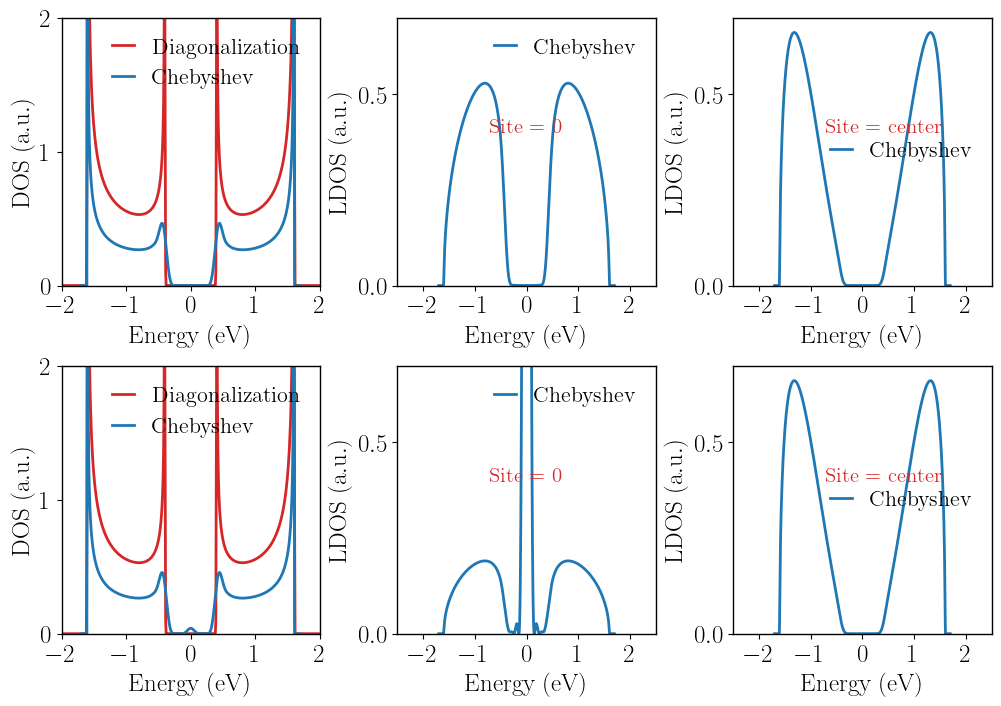

In [ ]:
def main_plot_DOS_SSH_Chebyshev():
    # 1. Adjust the figure size to fit both plots side-by-side
    fig = plt.figure(figsize=(12, 8))

    # 2. Create the gridspec
    gs_main = gridspec.GridSpec(2, 3, figure=fig, wspace=0.3, hspace=0.3)

    # 3. Create the subplots
    ax1 = fig.add_subplot(gs_main[0, 0])
    ax2 = fig.add_subplot(gs_main[0, 1])
    ax3 = fig.add_subplot(gs_main[0, 2])
    ax4 = fig.add_subplot(gs_main[1, 0])
    ax5 = fig.add_subplot(gs_main[1, 1])
    ax6 = fig.add_subplot(gs_main[1, 2])

    """ 4. Calculate and plot """
    #######################################################################
    #######################################################################
    #######################################################################
    """ ============== Density Of States ============== """
    # -------- Define Parameters --------
    num_randomvectors = 100
    num_moments = 100
    v = 1.0
    w = 0.6
    Natom = 200
    # -------- Spectral Rescaling --------
    lattice = get_H_SSH(v, w)
    model = pb.Model(lattice, pb.primitive(Natom))#, pb.translational_symmetry(a1=True)) #alterado por erro
    H = model.hamiltonian.toarray() #(order='F')
    # -------- Spectral Rescaling --------
    H_rescaled, E_max, E_min, shift, scale = rescale_hamiltonian(H)
    # -------- Moment Calculation - Stochastic Trace Estimation --------
    mu = np.zeros(num_moments)
    #mu = calculate_chebyshev_moments_RandomVector(H_rescaled, num_moments, num_randomvectors)
    mu = calculate_chebyshev_moments_Trace(H_rescaled, num_moments)
    # -------- Kernel Processing --------
    mu_g = get_kernel(mu, name="jackson")
    # -------- Spectral Function Reconstruction --------
    energies_SSH = np.linspace(E_min - 0.1, E_max + 0.1, 1000)
    dos_SSH = get_DOS_Chebyshev(mu_g, energies_SSH, shift, scale)
    # -------- Plot -------
    plot_DOS_SSH_Chebyshev(ax1, energies_SSH, dos_SSH, "large_v>w")
    """ ============== Local Density Of States - Site 0 ============== """
    orbital_index = 0
    # -------- Moment Calculation - Stochastic Trace Estimation --------
    mu = np.zeros(num_moments)
    mu =  calculate_chebyshev_moments_Local(H_rescaled, num_moments, orbital_index)
    # -------- Kernel Processing --------
    mu_g = get_kernel(mu, name="jackson")
    # -------- Spectral Function Reconstruction --------
    energies_SSH = np.linspace(E_min - 0.1, E_max + 0.1, 1000)
    ldos_SSH = get_DOS_Chebyshev(mu_g, energies_SSH, shift, scale)
    # -------- Plot -------
    plot_LDOS_SSH_Chebyshev(ax2, energies_SSH, ldos_SSH, orbital_index)
    """ ============== Local Density Of States - Site m ============== """
    orbital_index = Natom
    # -------- Moment Calculation - Stochastic Trace Estimation --------
    mu = np.zeros(num_moments)
    mu =  calculate_chebyshev_moments_Local(H_rescaled, num_moments, orbital_index)
    # -------- Kernel Processing --------
    mu_g = get_kernel(mu, name="jackson")
    # -------- Spectral Function Reconstruction --------
    energies_SSH = np.linspace(E_min - 0.1, E_max + 0.1, 1000)
    ldos_SSH = get_DOS_Chebyshev(mu_g, energies_SSH, shift, scale)
    # -------- Plot -------
    plot_LDOS_SSH_Chebyshev(ax3, energies_SSH, ldos_SSH, orbital_index)

    #######################################################################
    #######################################################################
    #######################################################################
    """ ============== Density Of States ============== """
    # -------- Define Parameters --------
    num_randomvectors = 100
    num_moments = 100
    v = 0.6
    w = 1.0
    Natom = 200
    # -------- Spectral Rescaling --------
    lattice = get_H_SSH(v, w)
    model = pb.Model(lattice, pb.primitive(Natom))#, pb.translational_symmetry(a1=True)) #alterado por erro
    H = model.hamiltonian.toarray() #(order='F')
    # -------- Spectral Rescaling --------
    H_rescaled, E_max, E_min, shift, scale = rescale_hamiltonian(H)
    # -------- Moment Calculation - Stochastic Trace Estimation --------
    mu = np.zeros(num_moments)
    #mu = calculate_chebyshev_moments_RandomVector(H_rescaled, num_moments, num_randomvectors)
    mu = calculate_chebyshev_moments_Trace(H_rescaled, num_moments)
    # -------- Kernel Processing --------
    mu_g = get_kernel(mu, name="jackson")
    # -------- Spectral Function Reconstruction --------
    energies_SSH = np.linspace(E_min - 0.1, E_max + 0.1, 1000)
    dos_SSH = get_DOS_Chebyshev(mu_g, energies_SSH, shift, scale)
    # -------- Plot -------
    plot_DOS_SSH_Chebyshev(ax4, energies_SSH, dos_SSH, "large_v<w")
    """ ============== Local Density Of States - Site 0 ============== """
    orbital_index = 0
    # -------- Moment Calculation - Stochastic Trace Estimation --------
    mu = np.zeros(num_moments)
    mu =  calculate_chebyshev_moments_Local(H_rescaled, num_moments, orbital_index)
    # -------- Kernel Processing --------
    mu_g = get_kernel(mu, name="jackson")
    # -------- Spectral Function Reconstruction --------
    energies_SSH = np.linspace(E_min - 0.1, E_max + 0.1, 1000)
    ldos_SSH = get_DOS_Chebyshev(mu_g, energies_SSH, shift, scale)
    # -------- Plot -------
    plot_LDOS_SSH_Chebyshev(ax5, energies_SSH, ldos_SSH, orbital_index)
    """ ============== Local Density Of States - Site m ============== """
    orbital_index = Natom
    # -------- Moment Calculation - Stochastic Trace Estimation --------
    mu = np.zeros(num_moments)
    mu =  calculate_chebyshev_moments_Local(H_rescaled, num_moments, orbital_index)
    # -------- Kernel Processing --------
    mu_g = get_kernel(mu, name="jackson")
    # -------- Spectral Function Reconstruction --------
    energies_SSH = np.linspace(E_min - 0.1, E_max + 0.1, 1000)
    ldos_SSH = get_DOS_Chebyshev(mu_g, energies_SSH, shift, scale)
    # -------- Plot -------
    plot_LDOS_SSH_Chebyshev(ax6, energies_SSH, ldos_SSH, orbital_index)

    # 5. Closing the boxes (Box Style) in a robust way
    for ax in [ax1, ax2, ax3, ax4, ax5, ax6]:
        for spine in ax.spines.values():
            spine.set_visible(True)
            spine.set_color('black')
            spine.set_linewidth(1.0) # Makes the border slightly sharper/cleaner
        ax.set_frame_on(True)

    # 6. Finalization
    # tight_layout usually works better than subplots_adjust to prevent label clipping
    plt.tight_layout()
    #plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95,
    #                      hspace=0.4, wspace=0.4)

    plt.show()
    plt.close()

if __name__ == "__main__":
    main_plot_DOS_SSH_Chebyshev()

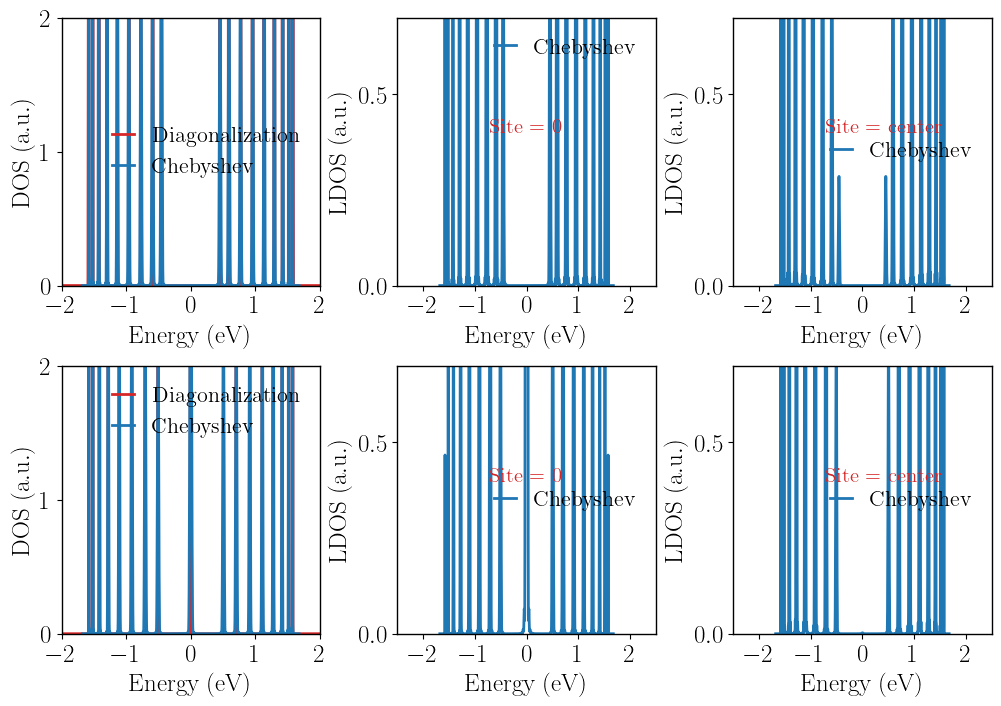

In [ ]:
def main_plot_DOS_SSH_Chebyshev():
    # 1. Adjust the figure size to fit both plots side-by-side
    fig = plt.figure(figsize=(12, 8))

    # 2. Create the gridspec
    gs_main = gridspec.GridSpec(2, 3, figure=fig, wspace=0.3, hspace=0.3)

    # 3. Create the subplots
    ax1 = fig.add_subplot(gs_main[0, 0])
    ax2 = fig.add_subplot(gs_main[0, 1])
    ax3 = fig.add_subplot(gs_main[0, 2])
    ax4 = fig.add_subplot(gs_main[1, 0])
    ax5 = fig.add_subplot(gs_main[1, 1])
    ax6 = fig.add_subplot(gs_main[1, 2])

    """ 4. Calculate and plot """
    #######################################################################
    #######################################################################
    #######################################################################
    """ ============== Density Of States ============== """
    # -------- Define Parameters --------
    num_randomvectors = 100
    num_moments = 500
    v = 1.0
    w = 0.6
    Natom = 9
    # -------- Spectral Rescaling --------
    lattice = get_H_SSH(v, w)
    model = pb.Model(lattice, pb.primitive(Natom))#, pb.translational_symmetry(a1=True)) #alterado por erro
    H = model.hamiltonian.toarray() #(order='F')
    # -------- Spectral Rescaling --------
    H_rescaled, E_max, E_min, shift, scale = rescale_hamiltonian(H)
    # -------- Moment Calculation - Stochastic Trace Estimation --------
    mu = np.zeros(num_moments)
    #mu = calculate_chebyshev_moments_RandomVector(H_rescaled, num_moments, num_randomvectors)
    mu = calculate_chebyshev_moments_Trace(H_rescaled, num_moments)
    # -------- Kernel Processing --------
    mu_g = get_kernel(mu, name="jackson")
    # -------- Spectral Function Reconstruction --------
    energies_SSH = np.linspace(E_min - 0.1, E_max + 0.1, 1000)
    dos_SSH = get_DOS_Chebyshev(mu_g, energies_SSH, shift, scale)
    # -------- Plot -------
    plot_DOS_SSH_Chebyshev(ax1, energies_SSH, dos_SSH, "small_v>w")
    """ ============== Local Density Of States - Site 0 ============== """
    orbital_index = 0
    # -------- Moment Calculation - Stochastic Trace Estimation --------
    mu = np.zeros(num_moments)
    mu =  calculate_chebyshev_moments_Local(H_rescaled, num_moments, orbital_index)
    # -------- Kernel Processing --------
    mu_g = get_kernel(mu, name="jackson")
    # -------- Spectral Function Reconstruction --------
    energies_SSH = np.linspace(E_min - 0.1, E_max + 0.1, 1000)
    ldos_SSH = get_DOS_Chebyshev(mu_g, energies_SSH, shift, scale)
    # -------- Plot -------
    plot_LDOS_SSH_Chebyshev(ax2, energies_SSH, ldos_SSH, orbital_index)
    """ ============== Local Density Of States - Site m ============== """
    orbital_index = Natom
    # -------- Moment Calculation - Stochastic Trace Estimation --------
    mu = np.zeros(num_moments)
    mu =  calculate_chebyshev_moments_Local(H_rescaled, num_moments, orbital_index)
    # -------- Kernel Processing --------
    mu_g = get_kernel(mu, name="jackson")
    # -------- Spectral Function Reconstruction --------
    energies_SSH = np.linspace(E_min - 0.1, E_max + 0.1, 1000)
    ldos_SSH = get_DOS_Chebyshev(mu_g, energies_SSH, shift, scale)
    # -------- Plot -------
    plot_LDOS_SSH_Chebyshev(ax3, energies_SSH, ldos_SSH, orbital_index)

    #######################################################################
    #######################################################################
    #######################################################################
    """ ============== Density Of States ============== """
    # -------- Define Parameters --------
    num_randomvectors = 100
    num_moments = 500
    v = 0.6
    w = 1.0
    Natom = 9
    # -------- Spectral Rescaling --------
    lattice = get_H_SSH(v, w)
    model = pb.Model(lattice, pb.primitive(Natom))#, pb.translational_symmetry(a1=True)) #alterado por erro
    H = model.hamiltonian.toarray() #(order='F')
    # -------- Spectral Rescaling --------
    H_rescaled, E_max, E_min, shift, scale = rescale_hamiltonian(H)
    # -------- Moment Calculation - Stochastic Trace Estimation --------
    mu = np.zeros(num_moments)
    #mu = calculate_chebyshev_moments_RandomVector(H_rescaled, num_moments, num_randomvectors)
    mu = calculate_chebyshev_moments_Trace(H_rescaled, num_moments)
    # -------- Kernel Processing --------
    mu_g = get_kernel(mu, name="jackson")
    # -------- Spectral Function Reconstruction --------
    energies_SSH = np.linspace(E_min - 0.1, E_max + 0.1, 1000)
    dos_SSH = get_DOS_Chebyshev(mu_g, energies_SSH, shift, scale)
    # -------- Plot -------
    plot_DOS_SSH_Chebyshev(ax4, energies_SSH, dos_SSH, "small_v<w")
    """ ============== Local Density Of States - Site 0 ============== """
    orbital_index = 0
    # -------- Moment Calculation - Stochastic Trace Estimation --------
    mu = np.zeros(num_moments)
    mu =  calculate_chebyshev_moments_Local(H_rescaled, num_moments, orbital_index)
    # -------- Kernel Processing --------
    mu_g = get_kernel(mu, name="jackson")
    # -------- Spectral Function Reconstruction --------
    energies_SSH = np.linspace(E_min - 0.1, E_max + 0.1, 1000)
    ldos_SSH = get_DOS_Chebyshev(mu_g, energies_SSH, shift, scale)
    # -------- Plot -------
    plot_LDOS_SSH_Chebyshev(ax5, energies_SSH, ldos_SSH, orbital_index)
    """ ============== Local Density Of States - Site m ============== """
    orbital_index = Natom
    # -------- Moment Calculation - Stochastic Trace Estimation --------
    mu = np.zeros(num_moments)
    mu =  calculate_chebyshev_moments_Local(H_rescaled, num_moments, orbital_index)
    # -------- Kernel Processing --------
    mu_g = get_kernel(mu, name="jackson")
    # -------- Spectral Function Reconstruction --------
    energies_SSH = np.linspace(E_min - 0.1, E_max + 0.1, 1000)
    ldos_SSH = get_DOS_Chebyshev(mu_g, energies_SSH, shift, scale)
    # -------- Plot -------
    plot_LDOS_SSH_Chebyshev(ax6, energies_SSH, ldos_SSH, orbital_index)

    # 5. Closing the boxes (Box Style) in a robust way
    for ax in [ax1, ax2, ax3, ax4, ax5, ax6]:
        for spine in ax.spines.values():
            spine.set_visible(True)
            spine.set_color('black')
            spine.set_linewidth(1.0) # Makes the border slightly sharper/cleaner
        ax.set_frame_on(True)

    # 6. Finalization
    # tight_layout usually works better than subplots_adjust to prevent label clipping
    plt.tight_layout()
    #plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95,
    #                      hspace=0.4, wspace=0.4)

    plt.show()
    plt.close()

if __name__ == "__main__":
    main_plot_DOS_SSH_Chebyshev()

<h1 align="center"></h1>

### <center><font color="red">**5. Triangulene crystals of graphene**</font></center>
___

<h1 align="center"></h1>


#### <center><font color="orange">**Analytical Approach**</center>
___


##**Eletronic Structure and Discrete Spectrum of [4]-Triangulene**

**1. The Tight-Binding Framework**

The electronic propreties of [4]-triangulene are modeled using the **Hückel Method** (Tight-Binding approximation) for the $\pi$-electron system. In this model, the Hamiltonian $(H)$ considers only the hopping of electrons between neares-neighbor carbon atoms:

$$H = -t\sum_{\langle i,j \rangle}(|i\rangle \langle j| + h.c)$$

Where $t ≈ 2.7 eV$ is the hopping integral and $|i\rangle$ represents the $p_z$ orbital at site $i$. Because the molecule is finite, the translational symmetry of graphene is broken, replacing the continuos band structure $E(k)$ with a **discrete energy spectrum** of 33 distinct eigenvalues.

**2. Sublattice Imbalance and Lieb’s Theorem**

Triangulene belongs to the class of **bipartite lattices**, meaning the carbon atoms can be partitioned into two sets, Sublattice A and Sublattice B, where bonds only exist between different sets.

For [4]-triangulene, the number of atoms in each sublattice is:

-  $N_A = 15$
-  $N_B = 18$

According to o **Lieb’s Theorem**, the imbalance $\eta = |N_B - N_A|$ dictates the existance of degenerate states at the Fermi level $(E = 0)$. For this specific geometry, the theorem predicts:

$$N_{ZEM} = 18 - 15 = 3$$

These three **Zero-Energy Modes (ZEMs)** are non-bonding molecular orbitals (NBMOs) that are topologically protected by the lattice symmetry.

**3. Matrix Representation and Block Structure**

By ordering the basis vectors such that all A-sites precede B-sites, the Hamiltonian matrix takes a block-off-diagonal form:


$$H = \begin{pmatrix} 0_{15 \times 15} & T_{15 \times 18}\\ T^†_{18 \times 15} & 0_{18 \times 18} \end{pmatrix}$$

Here, $T$ is the **connectivity (transfer) matrix** The zeros on the diagonal indicate that on-site energies are neglected and there is no intra-sublattice hopping.

**4. Analytical Expression of the Spectrum**

The energy levels are the roots of the characteristic polynomial $P(E) = det(EI - H)$. For [4]-triangulene, the polynomial decomposes based on the propreties of the rectangular matrix $T$:

$$P(E) = E^3 \prod_{i = 1}^{15} (E^2 - \lambda_i^2) = 0$$

Where:

-  $E^3:$ Represents the three-fold degeneracy at zero energy.
-  $\lambda_i:$ Are the **singular values** of the transfer matrix **$T$**.
-  **Symmetry:** The term $(E^2 - \lambda_i^2)$ ensures that gor every bonding state at $-\lambda_i$, there exists a corresponding anti-bonding state at $+\lambda_i$ (Chiral Symmetry).

The full spectrum consists of **15 bonding states, 3 zero-energy states, and 15 anti-bonding states**, totaling 33 levels.

**5. Physical Significance: Molecular Magnetism**

The three zero-energy states are occupied by three electrons. Following **Hund's Rule**, these electrons adopt a parallel spin configuration to minimize electron-electron repulsion. This results in:

-  A ground-state spin of $S = 3/2$.
-  High-spin magnetic properties in a purely carbon-based structure.
-  Wavefunctions for these states are localized primarily on the zig-zag edges of the molecule.

**6. Generic Form to Calculate N(total number of atoms)**

$$N = n^2 + 4n + 1$$

Where $n$ is the **number of hexagonal rings (benzene units) along one edge of the triangle**.

This formula defines the total number of carbon atoms in the $\pi$-system of the triangulene series. The term n essentially acts as the "order" of the molecule. For example:

-  For **[4]-triangulene** $(n = 4): N = 16 + 16 + 1 = 33$ atoms.
-  For **[5]-triangulene** $(n = 5): N = 25 + 20 + 1 = 46$ atoms.

**7. General Distribution of Quantum States**

Based on the structural orden $n$, the energy spectrum follows a strict topological distribution. For any triangulene of order $n$, the total number of states $N$ is partitioned as follows:

-  **Zero-Energy States $(N_{ZEM}):$**

$$N_{ZEM} = n - 1$$

These are the non-bonding states located exactly at the Fermi level.

-  **Bonding and Anti-bonding States:** The remaining states are divided equally into occupied (bonding) and unoccupied (anti-bonding) levels due to chiral symmetry:

$$N_{Bonding} = N_{Anti-bonding} = \frac{N - (n - 1)}{2}$$

**8. Spin Multiplicity and the "Rule of $n$"**

A defining feature of the triangulene series is the elegant correlation between geometry and quantum magnetism. According to Hund’s Rule, the $(n - 1)$ electrons in the zero-energy modes align their spins to maximize exchange interaction, leading to a total spin $S = (n-1)/2$.

The **Spin Multiplicity** $(2S + 1)$ is therefore always equal to the number of hexagonal rings along the edge $(n)$:

$$Multiplicity = 2\left(\frac{n - 1}{2}\right) + 1 = n$$

For [4]-triangulene, with $n=4$, the system naturally hosts a quartet ground state $(Multiplicity = 4)$.

**9. Magnetic Moment and Spin Localization**

The total magnetic moment $(\mu)$ of the molecule is directly proportional to the number of unpaired electrons. For triangulenes of order $n$, the magnetization is quantized as:

$$\mu = (n -1)\mu_B$$

Where $\mu_B$ is the Bohr magneton. For the **[4]-triangulene**, the expected moment is $3\mu_B$.

Unlike bulk magnets, this magnetization is not uniform. The spin density wavefunctions are:

1.  **Sublattice-polarized:** Located exclusively on the majority sublattice (Sublattice B).
2.  **Edge-localized:** Concentrated at the zig-zag boundaries of the triangle, making these molecules ideal candidates for spintronic devices and quantum sensing.

**10. Conclusion**

The [4]-triangulene molecule represents a perfect intersection between topology and magnetism. By simply defining the geometric order $(n=4)$, we can analytically predict the number of atoms $(33)$, the exact structure of the characteristic polynomial $(E^3 \prod (E^2 - \lambda_i^2))$, and the resulting magnetic quartet state. This scalability makes triangulenes a unique platform for carbon-based magnetism at the nanoscale.

##**Second-Nearest Neighbor (SNN) Effects**



To increase the physical accuracy of the model, we can introduce the second-nearest neighbor hopping integral $(t′)$, which accounts for electron "jumps" between atoms of the sublattice (A ↔ A and B ↔ B).

**A. What Remains Unchanged**

Despite the increased complexity, the fundamental topological properties of [4]-triangulene are **invariant:**

-  **Total Atom Count $(N)$:** Remains 33, as the geometry is unaltered.
-  **Sublattice Imbalance $(\eta)$:** The difference $|N_B -N_A| = 3$ is a constant of the lattice.
-  **Total Spin $(S)$ and Multiplicity:** The ground state remains a **quartet** $(S = 3/2)$. The magnetism is "topologically protected", meaning it depends on the lattice connectivity, not on the specific hopping strngth.
-  **Rule of $n$:** The relationship $Multiplicity = n$ and $\mu = (n - 1)\mu_B$ still holds true.

**B. What Changes**

The inclusion of $t′ ≈ 0.1t$ (approx. $0.3eV$) introduces three main correction to the eletronic spectrum:

1.  **Chiral Symmetry Breaking:** In the first-neighbor model, the Hamiltonian was block-off-diagonal (diagonal blocks were zero). With SNN, the diagonal blocks $H_{AA}$ and $H_{BB}$ are populated. This breaks the "mirror" symmetry between bonding and anti-bonding states.
2.  **Energy Shift of ZEMs:** : The three Zero-Energy Modes (ZEMs) are no longer located at exactly $E=0$. They undergo an energy shift (typically $ΔE∝t′$), moving away from the Fermi level.

    - **Mathematical Impact:** The $E^3$ term in the characteristic polynomial is replaced by $(E - δ)^3$, where $δ$ is the shift induced by intra-sublattice hopping.
3.  **Particle-Hole Asymmetry:** The entire energy spectrum becomes "skewed." The energy required to add an electron (conduction) is no longer exactly equal to the energy required to remove one (valence), which is more consistent with experimental observations from Scanning Tunneling Spectroscopy (STS).   

##**Computational Implementation: The [n]-triangulene**

To translate the analytical properties of triangulenes into a numerical model, the code follows a four-stage architecture. This approach ensures that the physical constraints (sublattice imbalance and honeycomb geometry) are strictly maintained for any order $n$.

**1. Recursive Geometry Generation**

The primary challenge in modeling triangulenes is ensuring the "honeycomb" (hexagonal) structure rather than a simple triangular grid. The algorithm uses a **hexagonal cell indexing** method:

-  **The Unit Cell:** Each hexagon is treated as a unit. For a triangulene of order $n$, the algorithm iterates through a triangular loop where the number of hexagons decreases per row (from $n$ to 1).
-  **Vector Basis:** Positions are defined using the graphene basis vectors:

$$v_1 = \sqrt{3}a_{cc}\hat x \qquad and \qquad v_2 = \frac{\sqrt{3}}{2}a_cc\hat x + \frac{3}{2}a-cc\hat y$$
-  **Coordinate Deduplication:** Since adjacent hexagon share carbon atoms, the code implemenys a **Hash Map (Dictionary)** to store unique coordinates. This prevents the overcounting of atoms and ensures the total count $N = n^2 + 4n + 1$ is exact.

**2. Automated Sublattice Identification**

Analytically, we know the system is bipartite. To implement this without manual labeling, the code employs a **Breadth-First Search (BFS) graph-coloring algorithm:**

1. It starts at an arbitrary atom and assigns it to **Sublattice A**.
2. It identifies all nearest neighbors (within distance $a_{cc}$) and assigns them to **Sublattice B**.
3. This process repeats until every atom is categorized.
4. Finally, it compares the counts ($N_A$ vs $N_B$) to identify the majority sublattice, which is a prerequisite for calculating the net spin $S$ and the number of Zero-Energy Modes (ZEMs).

**3. Hamiltonian Construction**

The code populates the $N \times N$ Hamiltonian matrix $H$ based on distance thresholds.

 -  **First-Neighbor Hopping $(t)$:** For pairs where $d ≈ a_{cc}$ the matrix elements  $H_{ij}$ are set to $t$ (usually $≈ −2.7 eV$). These terms connect $A → B$.
-  **Second-Neighbor Hopping $(t′)$:** For pairs where $d ≈ \sqrt{3}a_{cc}$ the elements are set to $t′$. These terms connect $A → A$ and $B → B$, populating the diagonal blocks of the matrix and breaking the chiral symmetry as discussed in the analytical section.

**4. Diagonalization and Spectral Analysis**

Finally the algorithm solves the eignvalues problem $H\psi = E\psi$ using a standard Hermitioan solver (eigh).

- **For $t′ = 0$:** The spectrum validates the analytical prediction of $n - 1$ degenerates satates at the Fermi level.
- **For $t′ \neq 0$:** The code quantifies the energy shift ($δ$) and the lifting of the degeneracy, providing a numerical verification of the SNN-induced symmetry breaking.

In [ ]:
from scipy.linalg import eigh

def Analytical_n_triangulene(n, t=-1, t_prime=0.0):
    """
   Performs the physical calculation for a [n]-triangulene.
    Returns: energies, coordinates, number of ZEMs, and sublattice counts.
    """
    a_cc = 1.0
    sqrt3 = np.sqrt(3)

    # Primitive vectors for the centers of the hexagons
    v1 = np.array([sqrt3 * a_cc, 0])
    v2 = np.array([sqrt3/2 * a_cc, 1.5 * a_cc])

    unique_positions = {}

    # 1. Geometry generation
    for row in range(n):
        for col in range(n - row):
            R = row * v2 + col * v1
            center = R + np.array([sqrt3/2 * a_cc, a_cc])

            angles = np.radians([90, 150, 210, 270, 330, 30])
            for theta in angles:
                x = center[0] + a_cc * np.cos(theta)
                y = center[1] + a_cc * np.sin(theta)
                pos = (round(x, 4), round(y, 4))
                if pos not in unique_positions:
                    unique_positions[pos] = len(unique_positions)

    coords = np.array(list(unique_positions.keys()))
    N = len(coords)

    # 2. Build Hamiltonian H
    H = np.zeros((N, N))
    for i in range(N):
        for j in range(i + 1, N):
            dist = np.linalg.norm(coords[i] - coords[j])
            if 0.9 * a_cc < dist < 1.1 * a_cc:
                H[i, j] = H[j, i] = t
            elif 1.7 * a_cc < dist < 1.8 * a_cc:
                H[i, j] = H[j, i] = t_prime

    # 3. Solve Eigenvalues
    energies, evecs = eigh(H)

    # 4. Sublattice Analysis (BFS)
    sublattice = np.zeros(N)
    visited = np.zeros(N, dtype=bool)
    queue = [0]
    visited[0] = True
    while queue:
        u = queue.pop(0)
        for v in range(N):
            if not visited[v] and abs(H[u, v] - t) < 1e-5:
                sublattice[v] = 1 - sublattice[u]
                visited[v] = True
                queue.append(v)

    n_a, n_b = np.sum(sublattice == 0), np.sum(sublattice == 1)
    zems = abs(n_b - n_a)

    return energies, evecs, coords, zems

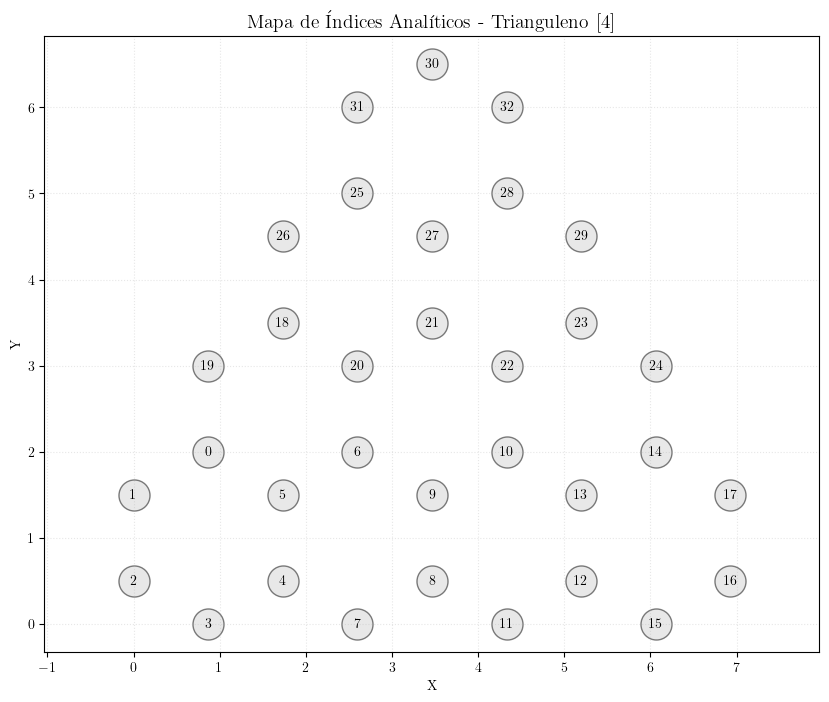

In [ ]:
import matplotlib.pyplot as plt

def visualize_analytical_model(n=4):
    # 1. Obter os dados da sua função
    # Note: Usei a versão que retorna (energies, evecs, coords, zems)
    energies, evecs, coords, zems = Analytical_n_triangulene(n)

    # 2. Re-identificar as sub-redes para colorir (usando sua lógica de BFS)
    # [Opcional, apenas para estética no plot]
    N = len(coords)
    sublattice = np.zeros(N)
    # ... (sua lógica de BFS aqui para definir as cores) ...

    # 3. Plotagem
    plt.figure(figsize=(10, 8))

    # Desenhar os átomos
    # Sub-rede A em azul, B em vermelho (exemplo)
    plt.scatter(coords[:, 0], coords[:, 1], c='lightgray', s=500, edgecolors='black', alpha=0.5)

    # 4. Adicionar os Rótulos de Índice (Crucial!)
    for i in range(N):
        plt.text(coords[i, 0], coords[i, 1], str(i),
                 fontsize=10, ha='center', va='center', weight='bold')

    plt.title(f"Mapa de Índices Analíticos - Trianguleno [{n}]", fontsize=14)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.axis('equal')
    plt.grid(True, linestyle=':', alpha=0.3)
    plt.show()

# Executar visualização
visualize_analytical_model(4)

<h1 align="center"></h1>

#### <center><font color="orange">**Exact Diagonalization**</center>
___


In [ ]:
def triangulene(onsite, center, rotation_angle, name):
    """Return a single triangulene molecule centered at given position with rotation"""
    a_cc = 0.142
    a = a_cc * np.sqrt(3.)

    cx, cy = center

    # Define all positions relative to center
    if name == "4-triangulene":
        positions_relative = {
            'A': [
                [-2.*a, -2.*a_cc], [-1.*a, -2.*a_cc], [0, -2.*a_cc], [1.*a, -2.*a_cc], [2.*a, -2.*a_cc],
                [-1.5*a, -a_cc/2.], [-0.5*a, -a_cc/2.], [0.5*a, -a_cc/2.], [1.5*a, -a_cc/2.],
                [-1.*a, a_cc], [0, a_cc], [1.*a, a_cc],
                [-0.5*a, 2.5*a_cc], [0.5*a, 2.5*a_cc],
                [0, 4.*a_cc]
            ],
            'B': [
                [-1.5*a, -2.5*a_cc], [-0.5*a, -2.5*a_cc], [0.5*a, -2.5*a_cc], [1.5*a, -2.5*a_cc],
                [-2.*a, -a_cc], [-1.*a, -a_cc], [0, -a_cc], [1.*a, -a_cc], [2.*a, -a_cc],
                [-1.5*a, a_cc/2.], [-0.5*a, a_cc/2.], [0.5*a, a_cc/2.], [1.5*a, a_cc/2.],
                [-1.*a, 2.*a_cc], [0, 2.*a_cc], [1.*a, 2.*a_cc],
                [-0.5*a, 3.5*a_cc], [0.5*a, 3.5*a_cc]
            ]
        }

    #elif name == "3-triangulene":

    # Apply rotation and translation
    def apply_transform(positions):
        result = []
        angle_rad = np.radians(rotation_angle)
        cos_a, sin_a = np.cos(angle_rad), np.sin(angle_rad)

        for x_rel, y_rel in positions:
            # Rotate
            x_rot = x_rel * cos_a - y_rel * sin_a
            y_rot = x_rel * sin_a + y_rel * cos_a
            # Translate to center
            result.append([x_rot + cx, y_rot + cy])
        return result

    A_positions = apply_transform(positions_relative['A'])
    B_positions = apply_transform(positions_relative['B'])

    return A_positions, B_positions


In [ ]:
def get_triangulene_graphene(name, onsite=(0,0), center=(0,0), t=1.0, rotation_angle=0, mode2N=False):
    """
    Single triangulene molecule (graphene π-model)
    """

    # Graphene constants
    a_cc = 0.142
    a = a_cc * np.sqrt(3)

    # Dummy lattice vectors (molecule in a big box)
    a1 = np.array([0.2, 0])
    a2 = np.array([0, 0.2])

    lat_triangulene_graphene = pb.Lattice(a1=a1, a2=a2)

    # Get atom positions
    A_pos, B_pos = triangulene(onsite, center, rotation_angle, name)

    # Add sublattices
    for i, pos in enumerate(A_pos, 1):
        lat_triangulene_graphene.add_sublattices((f"A{i}", pos, onsite[0]))

    for i, pos in enumerate(B_pos, 1):
        lat_triangulene_graphene.add_sublattices((f"B{i}", pos, onsite[1]))

    # Nearest-neighbor hoppings
    hoppings = [
        # Diagonal 1
        ("A1", "B1"), ("A2", "B2"), ("A3", "B3"), ("A4", "B4"),
        ("A6", "B6"), ("A7", "B7"), ("A8", "B8"), ("A9", "B9"),
        ("A10", "B11"), ("A11", "B12"), ("A12", "B13"),
        ("A13", "B15"), ("A14", "B16"), ("A15", "B18"),

        # Diagonal 2
        ("A2", "B1"), ("A3", "B2"), ("A4", "B3"), ("A5", "B4"),
        ("A6", "B5"), ("A7", "B6"), ("A8", "B7"), ("A9", "B8"),
        ("A10", "B10"), ("A11", "B11"), ("A12", "B12"),
        ("A13", "B14"), ("A14", "B15"), ("A15", "B17"),

        # Vertical
        ("A1", "B5"), ("A2", "B6"), ("A3", "B7"), ("A4", "B8"), ("A5", "B9"),
        ("A6", "B10"), ("A7", "B11"), ("A8", "B12"), ("A9", "B13"),
        ("A10", "B14"), ("A11", "B15"), ("A12", "B16"),
        ("A13", "B17"), ("A14", "B18")
    ]

    for a, b in hoppings:
        lat_triangulene_graphene.add_hoppings(([0, 0], a, b, -t))

    # Second-nearest neighbor hoppings
    if mode2N == True:
        t_prime = 0.1 * t
        dist_alvo = 0.142 * np.sqrt(3)
        def add_nnn_by_distance(positions, prefix):
            # Garante que as posições são tratadas como números
            pos_array = np.array(positions, dtype=float)
            count = len(pos_array)

            for i in range(count):
                for j in range(i + 1, count):
                    # Cálculo da distância entre átomo i e j
                    d = np.linalg.norm(pos_array[i] - pos_array[j])

                    # Se a distância for o que esperamos para 2º vizinho
                    if np.abs(d - dist_alvo) < 0.01:
                        lat_triangulene_graphene.add_hoppings(
                            ([0, 0], f"{prefix}{i+1}", f"{prefix}{j+1}", -t_prime)
                        )

        # Aplica a lógica para a sub-rede A (conecta A com A)
        add_nnn_by_distance(A_pos, "A")

        # Aplica a lógica para a sub-rede B (conecta B com B)
        add_nnn_by_distance(B_pos, "B")

    return lat_triangulene_graphene, A_pos, B_pos

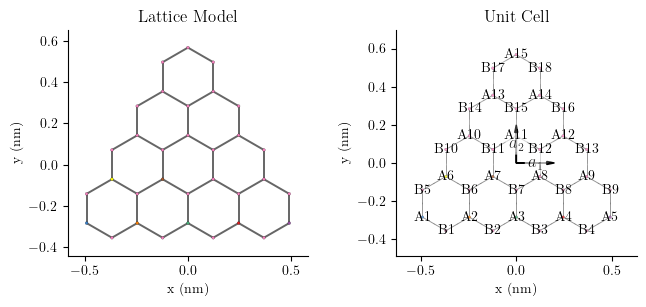

In [ ]:
lat_triangulene_graphene, _, _ = get_triangulene_graphene(name="4-triangulene", onsite=(0,0), center=(0,0), t=1.0, rotation_angle=0, mode2N=False)

plot=plt.figure(figsize=(10., 3))

model = pb.Model(lat_triangulene_graphene)
plt.subplot(131, title="Lattice Model")
model.plot(hopping={'width': 2, 'cmap': 'auto'})

plt.subplot(132, title="Unit Cell")
lat_triangulene_graphene.plot()

plt.tight_layout()
plt.show(plot)

In [ ]:
"""Model Setup and Exact Diagonalization """
# Parameters
num_randomvectors = 20
num_moments = 500

lattice, _, _ = get_triangulene_graphene(name="4-triangulene", onsite=(0,0), center=(0,0), t=1.0, rotation_angle=0, mode2N=False)
model = pb.Model(lattice, pb.primitive(1))
H_dense = model.hamiltonian.toarray()
num_sites = H_dense.shape[0]

# --- ED CALCULATION ---
evals, evecs = np.linalg.eigh(H_dense)

# --- SITE INDICES ---
x, y, z = model.system.positions
idx_center = np.argmin(x**2 + y**2)
idx_tip = np.argmax(y)
idx_corner = np.argmax(x)

# --- SPECTRAL RESCALING ---
H_rescaled, E_max, E_min, shift, scale = rescale_hamiltonian(H_dense)
energies_axis = np.linspace(-4, 4, 5000)

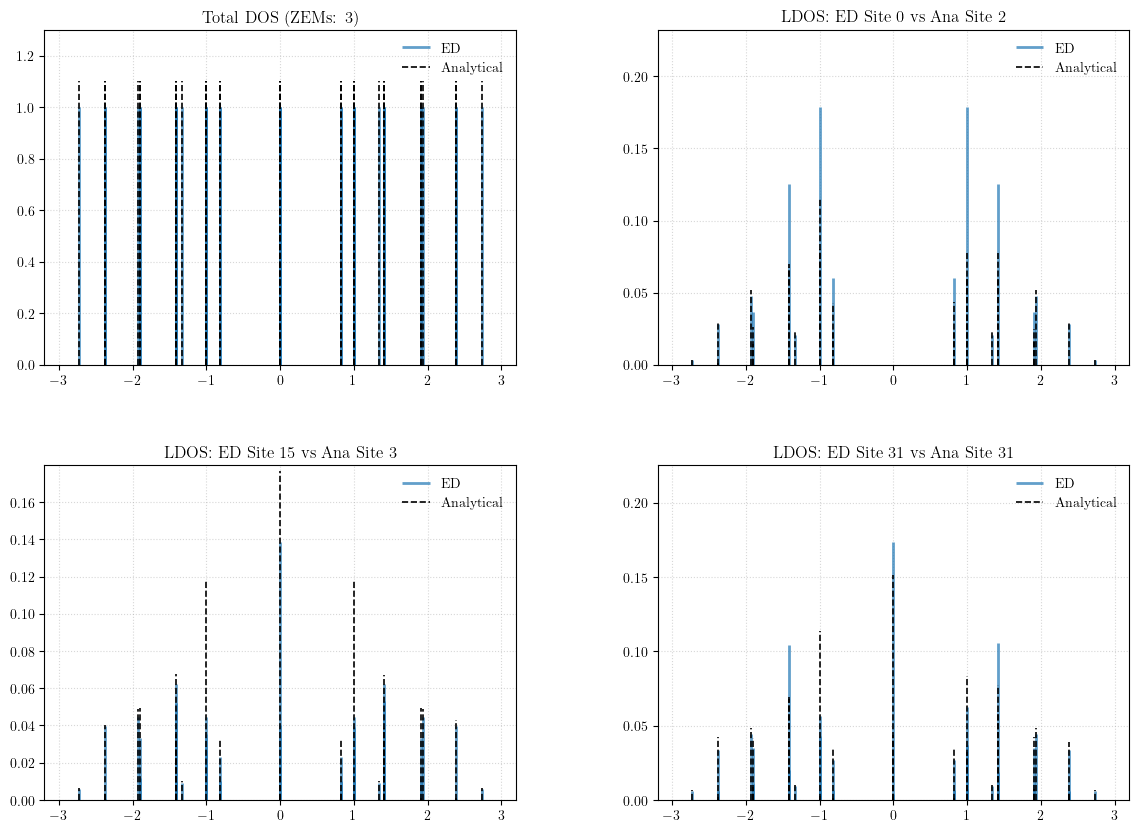

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

def compare_ED_vs_Analytical_Manual(indices_ed=[0, 4, 30], indices_ana=[2, 11, 7]):
    """
    Manually compare specific atoms.
    indices_ed: List of 3 indices for the PyBinding model
    indices_ana: List of 3 indices for the Analytical model
    """
    # --- 0. PARÂMETROS ---
    n_order = 4
    t_val = 1.0

    # --- 1. ED CALCULATION (PyBinding) ---
    lattice, _, _ = get_triangulene_graphene(name="4-triangulene", t=t_val)
    model = pb.Model(lattice, pb.primitive(1))
    evals_ed, evecs_ed = np.linalg.eigh(model.hamiltonian.toarray())

    # --- 2. ANALYTICAL CALCULATION ---
    # Usando sua função original sem alterações
    evals_ana, evecs_ana, coords_ana, zems = Analytical_n_triangulene(n_order, t=-t_val)

    # --- 3. PLOTTING ---
    fig = plt.figure(figsize=(14, 10))
    gs = gridspec.GridSpec(2, 2, hspace=0.3, wspace=0.3)

    def plot_comparison(ax, title, w_ed, w_ana):
        # ED em azul, Analytical em preto tracejado
        ax.vlines(evals_ed, 0, w_ed, color="tab:blue", lw=2, label="ED", alpha=0.7)
        ax.vlines(evals_ana, 0, w_ana * 1.1, color="black", ls="--", lw=1.2, label="Analytical")
        ax.set_title(title)
        ax.set_xlim(-3.2, 3.2)
        ax.set_ylim(0, np.max(w_ed)*1.3 if len(w_ed)>0 else 1)
        ax.legend(frameon=False)
        ax.grid(True, linestyle=':', alpha=0.5)

    # Gráfico 1: Total DOS
    ax1 = fig.add_subplot(gs[0, 0])
    plot_comparison(ax1, f"Total DOS (ZEMs: {zems})", np.ones_like(evals_ed), np.ones_like(evals_ana))

    # Painéis de LDOS (Manual)
    axes = [fig.add_subplot(gs[0, 1]), fig.add_subplot(gs[1, 0]), fig.add_subplot(gs[1, 1])]

    for i in range(3):
        idx_e = indices_ed[i]
        idx_a = indices_ana[i]

        # Extração manual dos pesos
        w_ed = np.abs(evecs_ed[idx_e, :])**2
        w_ana = np.abs(evecs_ana[idx_a, :])**2

        plot_comparison(axes[i], f"LDOS: ED Site {idx_e} vs Ana Site {idx_a}", w_ed, w_ana)

    plt.show()

# --- COMO EXECUTAR ---
# Aqui você define exatamente qual índice do ED corresponde ao índice da Analítica
compare_ED_vs_Analytical_Manual(
    indices_ed = [0, 15, 31],   # IDs do PyBinding
    indices_ana = [2, 3, 31]   # IDs da sua função Analytical
)


<h1 align="center"></h1>


#### <center><font color="orange">**Chebyshev Expansion**</center>
___


In [ ]:
def plot_DOS_Triangulene_Chebyshev(ax, energies, dos):
    ax.plot(energies, dos, color="tab:red", lw=2, label="Chebyshev")
    ax.set_xlabel(r"Energy ($t$)", fontsize=12)
    ax.set_ylabel(r"DOS (a.u.)", fontsize=12)
    ax.set_title("Total DOS (Stochastic)", fontsize=14)
    ax.legend(frameon=False)
    ax.set_xlim(min(energies), max(energies))
    ax.set_ylim(bottom=0)

In [ ]:
def plot_LDOS_Triangulene_Chebyshev(ax, energies, ldos, label):
    ax.plot(energies, ldos, color="tab:blue", lw=2, label="Chebyshev")
    ax.set_xlabel(r"Energy ($t$)", fontsize=12)
    ax.set_ylabel(r"LDOS (a.u.)", fontsize=12)
    ax.set_title(f"LDOS - {label}", fontsize=14)
    ax.set_xlim(min(energies), max(energies))
    ax.set_ylim(bottom=0)

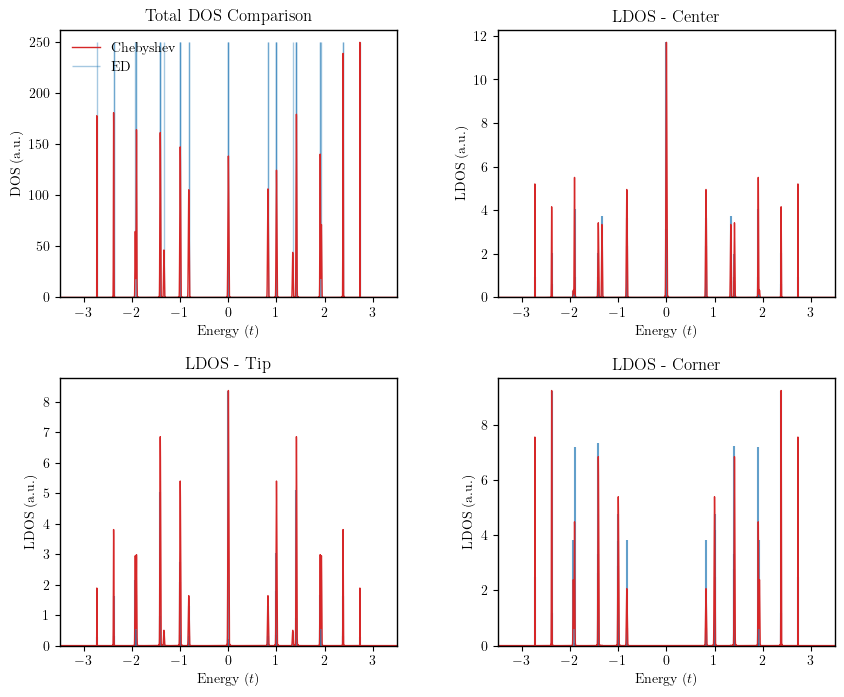

In [ ]:
def main_plot_Triangulene_Chebyshev():
    # 1. Adjust the figure size to fit both plots side-by-side
    fig = plt.figure(figsize=(10, 8))

    # 2. Create the gridspec
    gs_main = gridspec.GridSpec(2, 2, figure=fig, wspace=0.3, hspace=0.3)

    # 3. Create the subplots
    ax1 = fig.add_subplot(gs_main[0, 0])
    ax2 = fig.add_subplot(gs_main[0, 1])
    ax3 = fig.add_subplot(gs_main[1, 0])
    ax4 = fig.add_subplot(gs_main[1, 1])

    """ 4. Model Setup and Exact Diagonalization """
    # Parameters
    num_randomvectors = 20
    num_moments = 1000

    lattice, _, _ = get_triangulene_graphene(name="4-triangulene", onsite=(0,0), center=(0,0), t=1.0, rotation_angle=0, mode2N=False)
    model = pb.Model(lattice, pb.primitive(1))
    H_dense = model.hamiltonian.toarray()
    num_sites = H_dense.shape[0]

    # --- ED CALCULATION ---
    evals, evecs = np.linalg.eigh(H_dense)

    # --- SITE INDICES ---
    x, y, z = model.system.positions
    idx_center = np.argmin(x**2 + y**2)
    idx_tip = np.argmax(y)
    idx_corner = np.argmax(x)

    # --- SPECTRAL RESCALING ---
    H_rescaled, E_max, E_min, shift, scale = rescale_hamiltonian(H_dense)
    energies_axis = np.linspace(-4, 4, 5000)

    """ ============== Total Density Of States ============== """
    # KPM
    mu = calculate_chebyshev_moments_RandomVector(H_rescaled, num_moments, num_randomvectors)
    mu_g = get_kernel(mu, name="jackson")
    dos_KPM = get_DOS_Chebyshev(mu_g, energies_axis, shift, scale)
    dos_KPM = dos_KPM * num_sites # Scale to match total state count

    # Plot (Chebyshev: Red line, ED: Blue vertical lines)
    ax1.plot(energies_axis, dos_KPM, color="tab:red", lw=1, label="Chebyshev", zorder=2)
    ax1.vlines(evals, 0, np.max(dos_KPM), color="tab:blue", lw=1, alpha=0.4, label="ED", zorder=1)
    ax1.set_title("Total DOS Comparison")
    ax1.set_xlabel(r"Energy ($t$)")
    ax1.set_ylabel("DOS (a.u.)")
    ax1.legend(frameon=False)

    """ ============== Local Density Of States - Center ============== """
    # KPM
    idx_center = 30
    mu_c = calculate_chebyshev_moments_Local(H_rescaled, num_moments, idx_center)
    ldos_c_KPM = get_DOS_Chebyshev(get_kernel(mu_c, "jackson"), energies_axis, shift, scale)

    # ED weights
    weights_c = np.abs(evecs[idx_center, :])**2

    # Plot
    ax2.plot(energies_axis, ldos_c_KPM, color="tab:red", lw=1, label="Chebyshev", zorder=2)
    ax2.vlines(evals, 0, weights_c * (np.max(ldos_c_KPM) / np.max(weights_c)),
           color="tab:blue", lw=1.5, alpha=0.7, label="ED (scaled)", zorder=1)
    ax2.set_title("LDOS - Center")
    ax2.set_xlabel(r"Energy ($t$)")
    ax2.set_ylabel("LDOS (a.u.)")

    """ ============== Local Density Of States - Tip ============== """
    # KPM
    idx_tip = 31
    mu_t = calculate_chebyshev_moments_Local(H_rescaled, num_moments, idx_tip)
    ldos_t_KPM = get_DOS_Chebyshev(get_kernel(mu_t, "jackson"), energies_axis, shift, scale)

    # ED weights
    weights_t = np.abs(evecs[idx_tip, :])**2

    # Plot
    ax3.plot(energies_axis, ldos_t_KPM, color="tab:red", lw=1, label="Chebyshev", zorder=2)
    ax3.vlines(evals, 0, weights_t * (np.max(ldos_t_KPM) / np.max(weights_t)),
           color="tab:blue", lw=1.5, alpha=0.7, label="ED (scaled)", zorder=1)
    ax3.set_title("LDOS - Tip")
    ax3.set_xlabel(r"Energy ($t$)")
    ax3.set_ylabel("LDOS (a.u.)")

    """ ============== Local Density Of States - Corner ============== """
    # KPM
    idx_corner = 3
    mu_cor = calculate_chebyshev_moments_Local(H_rescaled, num_moments, idx_corner)
    ldos_cor_KPM = get_DOS_Chebyshev(get_kernel(mu_cor, "jackson"), energies_axis, shift, scale)

    # ED weights
    weights_cor = np.abs(evecs[idx_corner, :])**2

    # Plot
    ax4.plot(energies_axis, ldos_cor_KPM, color="tab:red", lw=1, label="Chebyshev", zorder=2)
    ax4.vlines(evals, 0, weights_cor * (np.max(ldos_cor_KPM) / np.max(weights_cor)),
           color="tab:blue", lw=1.5, alpha=0.7, label="ED (scaled)", zorder=1)
    ax4.set_title("LDOS - Corner")
    ax4.set_xlabel(r"Energy ($t$)")
    ax4.set_ylabel("LDOS (a.u.)")

    # 5. Closing the boxes (Box Style)
    for ax in [ax1, ax2, ax3, ax4]:
        for spine in ax.spines.values():
            spine.set_visible(True)
            spine.set_color('black')
            spine.set_linewidth(1.0)
        ax.set_frame_on(True)
        ax.set_xlim(-3.5, 3.5) # Focus on the active energy range
        ax.set_ylim(bottom=0)

    # 6. Finalization
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main_plot_Triangulene_Chebyshev()

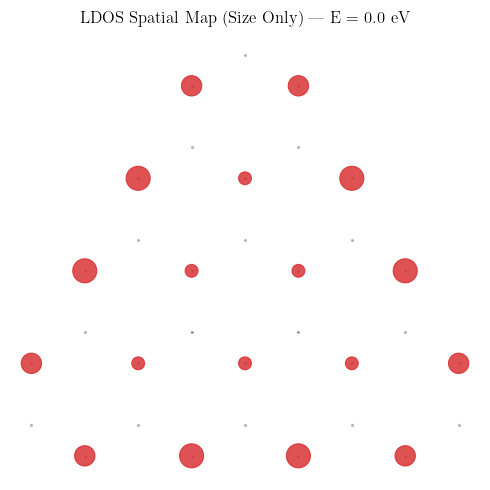

In [ ]:
def plot_spatial_ldos_minimal(energy=0.0, scale_factor=100):
    # 1. Configurar o Modelo
    lattice, A_pos, B_pos = get_triangulene_graphene(name="4-triangulene", t=1.0)
    model = pb.Model(lattice, pb.primitive(1))
    H_dense = model.hamiltonian.toarray()
    num_sites = H_dense.shape[0]

    num_moments = 1000

    H_rescaled, E_max, E_min, shift, scale = rescale_hamiltonian(H_dense)
    energies_axis = np.linspace(energy, energy, 1)

    positions = np.concatenate((A_pos, B_pos), axis=0)
    ldos = np.zeros(len(positions))
    for i, pos in enumerate(positions, 0):
        index = i
        mu = calculate_chebyshev_moments_Local(H_rescaled, num_moments, index)
        ldos[i] = get_DOS_Chebyshev(get_kernel(mu, "jackson"), energies_axis, shift, scale)

    ldos_max = ldos.max()
    ldos_min = ldos.min()

    # 4. PLOTAGEM MINIMALISTA
    plt.figure(figsize=(5, 5))

    # Desenhar os centros dos átomos (pontos minúsculos para referência)
    x = positions[:,0]
    y = positions[:,1]
    plt.scatter(x, y, c='black', s=2, alpha=0.2)

    # Bubble Plot: Apenas tamanho, cor fixa
    # s=ldos_values * scale_factor controla o tamanho
    plt.scatter(
        x, y,
        s=(ldos -ldos_min) * 300* scale_factor/(ldos_max - ldos_min),
        c="tab:red",           # Cinza escuro uniforme
        #edgecolors='black',
        linewidth=0.8,
        alpha=0.8
    )

    plt.title(f"LDOS Spatial Map (Size Only) | E = {energy} eV")
    plt.axis('equal')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_spatial_ldos_minimal(energy=0.0, scale_factor=1)

In [ ]:
# Use the specific import to fix your error
from scipy.integrate import quad, trapezoid, simpson

def plot_charge_density_bubble_fixed(Fermi_energy=0.0, scale_factor=1):
    # 1. Configurar o Modelo
    lattice, A_pos, B_pos = get_triangulene_graphene(name="4-triangulene", t=1.0)
    model = pb.Model(lattice, pb.primitive(1))
    H_dense = model.hamiltonian.toarray()
    num_sites = H_dense.shape[0]

    num_moments = 1000

    H_rescaled, E_max, E_min, shift, scale = rescale_hamiltonian(H_dense)
    energies_axis = np.linspace(-4.0, 4.0, 200000)
    E_min = -4.0
    mask = (energies_axis >= E_min) & (energies_axis <= Fermi_energy)

    positions = np.concatenate((A_pos, B_pos), axis=0)
    charge = np.zeros(len(positions))

    for i, pos in enumerate(positions, 0):
        index = i
        mu = calculate_chebyshev_moments_Local(H_rescaled, num_moments, index)
        ldos = get_DOS_Chebyshev(get_kernel(mu, "jackson"), energies_axis, shift, scale)
        charge[i] = trapezoid(y=ldos[mask], x=energies_axis[mask])

    charge_max = charge.max()
    charge_min = charge.min()

    # 4. PLOTAGEM MINIMALISTA
    plt.figure(figsize=(5, 5))

    # Desenhar os centros dos átomos (pontos minúsculos para referência)
    x = positions[:,0]
    y = positions[:,1]
    plt.scatter(x, y, c='black', s=2, alpha=0.2)

    # Bubble Plot: Apenas tamanho, cor fixa
    # s=ldos_values * scale_factor controla o tamanho
    plt.scatter(
        x, y,
        s=(charge -charge_min) * 300* scale_factor/(charge_max - charge_min),
        c="tab:red",           # Cinza escuro uniforme
        #edgecolors='black',
        linewidth=0.8,
        alpha=0.8
    )

    plt.title(f"Densidade de Carga \nTrianguleno [4]")
    plt.axis('equal')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Se as bolas estiverem muito grandes, diminui o 800 para 400
plot_charge_density_bubble_fixed(Fermi_energy=0.0, scale_factor=1)

KeyboardInterrupt: 